<a href="https://colab.research.google.com/github/watsoncu1/DS_AI_Post_Grad_Projects/blob/main/IN_PROGRESS_Curtis_Watsons_Machine_Learning_Project_UTexas_AI_and_ML_PCert_Program_full_code_notebookFF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curtis Watson's Machine Learning: AllLife Bank Personal Loan Campaign Project
### (In Progress - Projected Completion Date: 2024-04-15)

# Professional Overview

## Project Context and Goals

### This comprehensive case study, conducted by Curtis Watson, forms an integral part of the University of Texas' Post Graduate Program in Artificial Intelligence and Machine Learning. This highly esteemed six-month professional certification program is designed to equip learners with cutting-edge skills and knowledge in AI and ML domains.

###The focal point of this project is AllLife Bank, a burgeoning financial institution in the United States, known for its expanding depositor base. Despite its success in attracting depositors, the bank faces a challenge in enhancing its asset customer segment. The management has expressed a keen interest in augmenting this segment to foster loan business growth, thereby increasing revenue through interest on loans.

### In light of a previously successful campaign targeting liability customers, which boasted an impressive over 9% conversion rate, the retail marketing department is motivated to refine their strategies. The aim is to leverage targeted marketing approaches to elevate the success ratio further.

## Objective

### The primary objective of this project is to harness the power of data science and machine learning to aid AllLife Bank's marketing department. By developing a predictive model, we aim to pinpoint potential customers with a higher propensity for purchasing personal loans. This model will not only enable the bank to target its marketing efforts more efficiently but also maintain the dual relationship with customers as both depositors and loan consumers.

## Methodology

### The analysis and model development process outlined in this Jupyter Notebook encompasses several key steps:

1. ### **Data Exploration and Cleaning:** Initial examination of the dataset to identify and rectify any inconsistencies, missing values, or outliers.
2. ### **Feature Engineering:** Enhancement of the dataset through the creation of new variables that could potentially improve model performance.
3. ### **Model Selection:** Evaluation of various machine learning algorithms to select the most suitable one for our prediction task.
4. ### **Model Training and Testing:** Splitting the dataset into training and testing subsets to ensure the model is trained and validated effectively.
5. ### **Performance Evaluation:** Utilization of relevant metrics to assess the predictive capability and accuracy of the developed model.
6. ### **Insights and Recommendations:** Derivation of actionable insights from the model’s predictions and formulation of strategic recommendations for the marketing department.

## Conclusion

### The outcome of this project is expected to significantly contribute to AllLife Bank’s strategic marketing initiatives. By identifying liability customers with a higher likelihood of availing personal loans, the bank can optimize its marketing resources, enhance customer satisfaction, and achieve a higher conversion rate. This case study not only showcases the practical application of AI and ML in the banking sector but also exemplifies the strategic integration of data-driven decision-making processes in enhancing business operations and customer service.



## Problem Statement

## Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective
To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset

In [ ]:
Loan = pd.read_csv("/content/drive/MyDrive/GradSchoolAdmExampleProjs/UTProj2MachLrngPersonalLoanCamp/Loan_Modelling.csv")   ##  Complete the code to read the data

In [ ]:
# Create a copy of the data to work on to avoid any changes in the original data
data = Loan.copy()

## Data Overview


* Observations
* Sanity checks

### View the first and last 5 rows of the dataset.

In [ ]:
data.head()  # View the first five rows of the data for inspection

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.tail() # View the last five rows of the data for inspection

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


### Understand the shape of the dataset.

In [ ]:
data.shape # View the number of rows and columns to inspect the shape of the data

(5000, 14)

### Check the data types of the columns for the dataset

In [ ]:
data.dtypes # view the datatypes of the columns as a sanity check Are the data types correct for features/variables

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

### Checking the Statistical Summary

In [ ]:
data.describe().T # View the statistical summary of the data to check the distribution of the data


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Summary of the Statistical Data:
1. ID feature: mean is equal to the median indicating that the data is normally distributed.
2. Age feature: has a mean of 45.34 and a median of 45.0 indicating the data is slightly skewed to the right.
3. Experience feature: has a mean of 20.10 and a median of 20.0 indicating the data is slightly skewed to the right.
4. Income feature: has a mean of 73.77 and a median of 64.0 inding the data is slightly skewed to the right.
5. ZIPCode feature:** is a categorical feature. bold text
6. Family feature:** has a mean of 2.40 and a median of 2.0 indicating the data is slightly skewed to the right.
7. CCAvg feature:** has a mean of 1.94 and a median of 1.5 indicating the data is slightly skewed to the right.
8. Education feature:** is a categorical feature is slightly left skewed.
9. Mortgage feature:** is a categorical feature is is significantly right skewed.
10. Personal Loan feature:** is a boolean feature is slightly right skewed.
11. Securities Account feature:** is a boolean feature slightly right skewed.
12. CD Account feature:** is a boolean feature is barely right skewed.
13. Online feature:** is a boolean feature is moderately left skewed.
14. CreditCard feature:** is a boolean feature slightly right skewed

### Data Overview: Observations and Sanity Checks

The AllLife Bank dataset provides some significant insights regarding customer demographics, financial behavior, and product preferences. Key findings include:

1. Variability in Demographic Features:
   - Attributes like age, experience, and income demonstrate slight right skewness, indicating diversity within these factors.

2. Segmentation Opportunities:
   - Categorical features such as education level and ZIP code offer opportunities for targeted marketing strategies.

3. Areas for Improvement:
   - Low proportions of customers opting for personal loans, securities accounts, and certificates of deposit highlight areas where targeted efforts could enhance performance.

4. Predictive Modeling and Personalized Marketing:
   - ### Understanding correlations between features, such as personal loan acceptance which is the target variable, can inform predictive models and personalized campaigns.

5. Strategic Decision-Making:
   - ### By leveraging these insights it will enable AllLife Bank's strategic decision-making processes to enhance their customer satisfaction and optimize their product offerings.

6. Continued Growth and Success:
   - ### Implementing the use of machine learning and using advanced analytics and segmentation techniques could hold promise for unlocking deeper insights and opportunities for AllLife bank's growth and success.

### Initial Exploratory Data Analysis (EDA):

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Questions:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### 1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

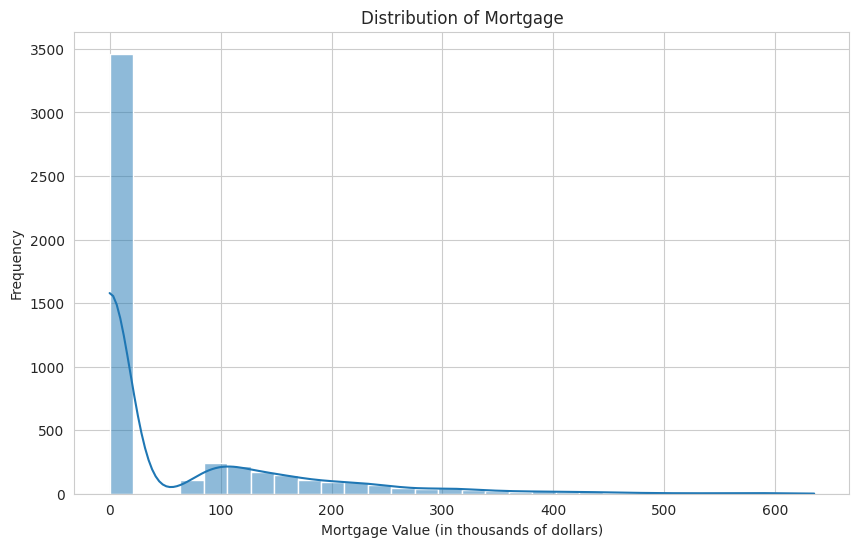

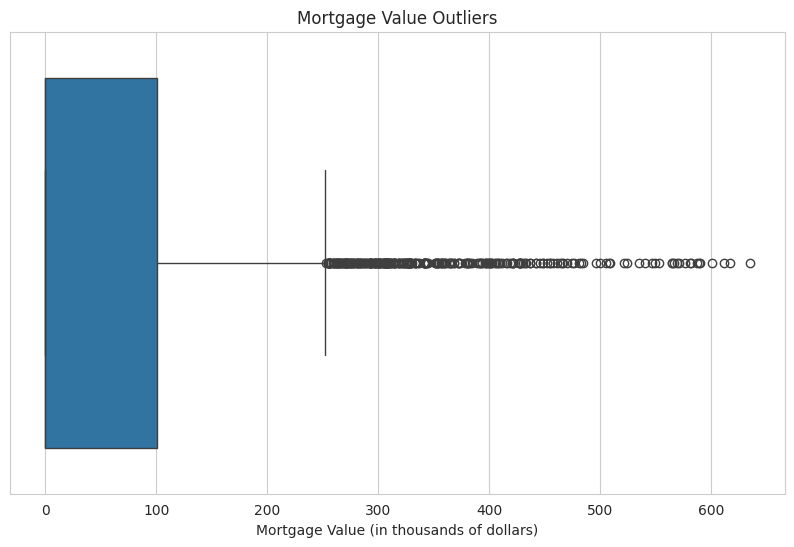

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Analyze the distribution of the 'Mortgage' attribute
plt.figure(figsize=(10, 6))
sns.histplot(data['Mortgage'], bins=30, kde=True)
plt.title('Distribution of Mortgage')
plt.xlabel('Mortgage Value (in thousands of dollars)')
plt.ylabel('Frequency')
plt.show()

# Checking for outliers in 'Mortgage'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Mortgage'])
plt.title('Mortgage Value Outliers')
plt.xlabel('Mortgage Value (in thousands of dollars)')
plt.show()


1. Mortgage Distribution Insights:
   - The distribution of the mortgage attribute exhibits a right-skewed pattern.
   - Most customers fall into the category of low to no mortgage value.
   - Many customers have a mortgage value of 0, indicating outright home ownership or renting.

2. Outliers and High Mortgage Values:
   - The boxplot highlights outliers in the mortgage distribution.
   - These outliers correspond to customers with exceptionally high mortgage values compared to the majority.

In conclusion, the majority of customers have minimal or no mortgage, while a small subset holds significantly higher mortgage values.


### 2. How many customers have credit cards?


In [ ]:
# Counting the number of customers who have credit cards
credit_card_count = data['CreditCard'].sum()

credit_card_count


1470

There are 1,470 customers in the dataset who have credit cards issued by another bank.



### 3. What are the attributes that have a strong correlation with the target attribute (personal loan)?

In [ ]:
# Calculating the correlation matrix to identify relationships with the 'Personal_Loan' attribute
correlation_matrix = data.corr()

# Focusing on the correlation of features with the 'Personal_Loan' attribute
personal_loan_correlation = correlation_matrix['Personal_Loan'].sort_values(ascending=False)

personal_loan_correlation


Personal_Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD_Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities_Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIPCode              -0.002974
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
Name: Personal_Loan, dtype: float64

1. Income: There is a **moderate positive correlation** (correlation coefficient of 0.502) between income levels and the likelihood of accepting a personal loan. Higher income is associated with greater interest in personal loans.

2. CCAvg (Credit Card Spending): Customers who spend more on credit cards per month exhibit a moderate positive correlation (correlation coefficient of 0.367) with personal loan acceptance.

3. CD_Account (Certificate of Deposit): Holding a certificate of deposit (CD) account with the bank shows a **moderate positive correlation** (correlation coefficient of 0.316) with accepting personal loans.

4. Mortgage: Although weaker, there is a positive correlation (correlation coefficient of 0.142) between higher mortgage values and personal loan acceptance.

5. Education: Slightly higher education levels are associated with a small positive correlation (correlation coefficient of 0.137) regarding personal loan interest.

In conclusion, financial stability (income, credit card spending, and CD accounts) plays a significant role in a customer's inclination toward personal loans.

### 4. How does a customer's interest in purchasing a loan vary with their age?

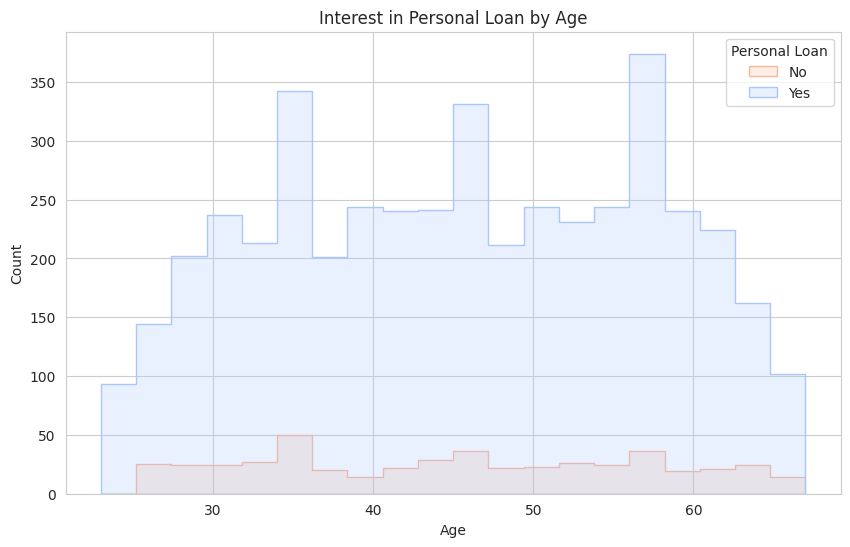

In [ ]:
# Analyzing how customer's interest in purchasing a loan varies with their age
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Personal_Loan', element='step', palette='coolwarm', bins=20)
plt.title('Interest in Personal Loan by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()


The above histogram illustrates the distribution of customer ages, categorized by whether they have accepted a personal loan (Yes) or not (No).

In conclusion, the data indicates that interest in personal loans is reasonably consistent across various age groups, without any pronounced concentration in a specific age range. Both groups exhibit similar age distributions, implying that age alone may not strongly determine interest in personal loans.

### 5. How does a customer's interest in purchasing a loan vary with their education?

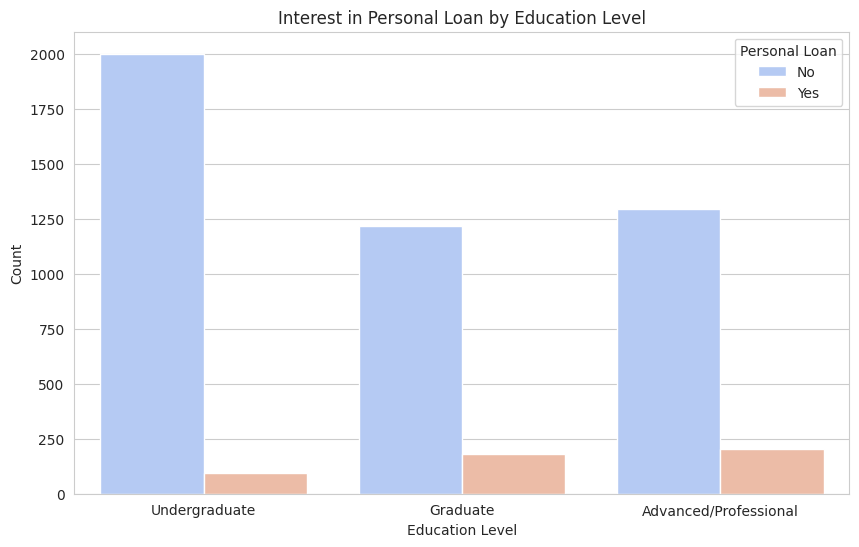

In [ ]:
# Analyzing how customer's interest in purchasing a loan varies with their education level
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Education', hue='Personal_Loan', palette='coolwarm')
plt.title('Interest in Personal Loan by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1, 2], labels=['Undergraduate', 'Graduate', 'Advanced/Professional'])
plt.show()


### "The count plot above illustrates how interest in personal loans varies across different education levels:

1. Undergraduate (Education Level 1):
   - A smaller proportion of undergraduates have accepted personal loans compared to those who have not.

2. Graduate (Education Level 2):
   - The trend shifts, with a noticeable increase in the number of graduates accepting personal loans, although the majority still have not.

3. Advanced/Professional (Education Level 3):
   - ### This group shows a significant proportion of individuals accepting personal loans compared to those who have not, indicating that as education level increases, so does the likelihood of accepting a personal loan.

In conclusion, as education level increases, the likelihood of accepting a personal loan increases. This trend is evident in the count plot, which shows a noticeable impact on a customer's interest in obtaining a loan, with higher education levels correlating with a greater propensity to accept personal loans.

### Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Dropping columns

In [ ]:
data = data.drop(["ID"], axis=1)  # Dropping ID column from the dataframe as it does not provide analytical value for the model

### Checking Dropped ID Column

In [ ]:
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Checking for Anomalous Values

In [ ]:
data["Experience"].unique() # Checking unique values

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [ ]:
# Checking for negative values
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [ ]:
# Corresponding the experience values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

### Checking for negative values

In [ ]:
print(data['Experience']<0)

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Name: Experience, Length: 5000, dtype: bool


In [ ]:
data["Education"].unique() # Checking unique values in Education column

array([1, 2, 3])

### Checking Education values

In [ ]:
print(data['Education'])

0       1
1       1
2       1
3       2
4       2
       ..
4995    3
4996    1
4997    3
4998    2
4999    1
Name: Education, Length: 5000, dtype: int64


### Feature Engineering

In [ ]:
data["ZIPCode"].nunique() # Checking unique values in ZIPCode

467

### Conclusion:

The dataset contains 467 unique ZIP code values out of a total of 5000 ZIP Codes in the ‘ZIPCode’ column. This diversity indicates that the bank’s customer base covers  467 different areas. An analysis of the distribution of ZIP codes could offer insights into regional variations, including preferences for banking products, income disparities, housing values, and loan acceptance rates. The wide geographic spread indicates the nessity for tailored product offerings, targeted marketing strategies, and region-specific analysis.

### Exploring Geographic Diversity and ZIP Code-Based Data Simplification:

In [ ]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "After removing the first two digits of ZIPCode there are a total of: ",
    data["ZIPCode"].str[0:2].nunique(),'unique values in ZIPCode.'
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

After removing the first two digits of ZIPCode there are a total of:  7 unique values in ZIPCode.


In conclusion, removing the first two digits of ZIP code improves the quality of the data and allows a more focus analysis of geographic trends. This approach is particularly useful when reducing ZIP codes to a more general geographical classification. By counting the unique values of these simplified codes and converting the column to a categorical type, the code prepares the data for analyses that require a broader geographic grouping rather than detailed ZIP code information. The unique values of the simplified codes can also be used to identify geographic clusters in the data.

### Converting the data types of categorical columns to 'category':

In [ ]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")
print(data.dtypes)

Age                      int64
Experience               int64
Income                   int64
ZIPCode               category
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal_Loan         category
Securities_Account    category
CD_Account            category
Online                category
CreditCard            category
dtype: object


###  The data types of categorical columns have been converted to 'category' as illustrated above.

## <a name='link2'>Comprehensive Exploratory Data Analysis (EDA):</a>


### Univariate Analysis

### Integrated Boxplot and Histogram Visualization Function for Data Analysis





In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

The above code for a histogram_boxplot function integrates histograms and boxplots, providing a comprehensive analysis of data distributions with minimal input. It enhances interpretability by incorporating key statistical metrics like mean and median on the visualizations. Designed for flexibility and user-friendliness, this tool underscores the practical application of data visualization and statistical analysis skills, essential for advancing in data science and artificial intelligence fields.

### Enhanced Barplot Visualization with Optional Percentage Labels

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

The above code defines a Python function, labeled_barplot, which generates barplots with an option to display percentages or counts of categories within a specified feature of a DataFrame. This function is tailored to enhance data visualization by allowing the display of either the top n categories or all, depending on the user's choice, thereby offering flexibility in data presentation. By incorporating adjustable sizing, rotation for readability, and a paired color palette for aesthetic appeal, the function showcases practical data visualization techniques. Such a tool highlights an applicant's ability to create insightful and customizable visualizations, a valuable skill in data science and artificial intelligence disciplines.

### Observations on Age:
### Age Distribution Analysis Using Combined Histogram and Boxplot Visualization:

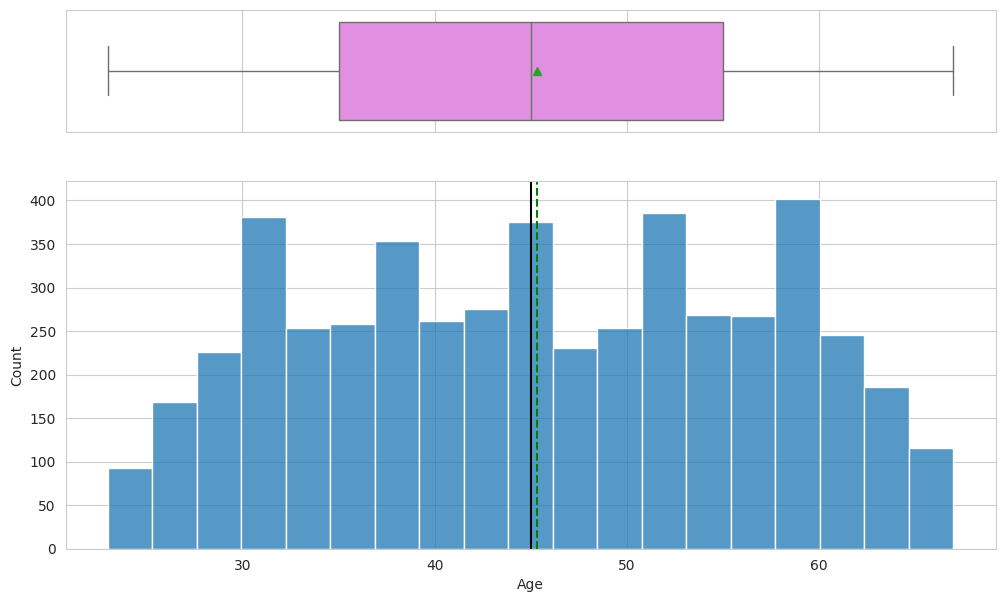

In [ ]:
histogram_boxplot(data, "Age") # histogram and boxplot of age feature variable

### Observations:
The above histogram_boxplot output presents an analytical depiction of the age variable's distribution within a given dataset. The histogram component displays a bi-modal frequency distribution, indicating two age groups where the data concentration is higher than the surrounding intervals. The boxplot, aligned with the histogram, shows the interquartile range (IQR), median (black line), and mean (green diamond), providing a five-number summary and identifying potential outliers, which are minimal in this case. This bimodal and symmetric distribution with a mean approximately equal to the median suggests a well-balanced age sample, which is critical in minimizing bias in machine learning models within data science and AI applications. Such graphical analysis is vital for preliminary data assessment, ensuring the robustness of subsequent predictive modeling and analytics.






### Observations on Experience

### Professional Experience Distribution in Data Analysis: Combined Histogram and Boxplot:

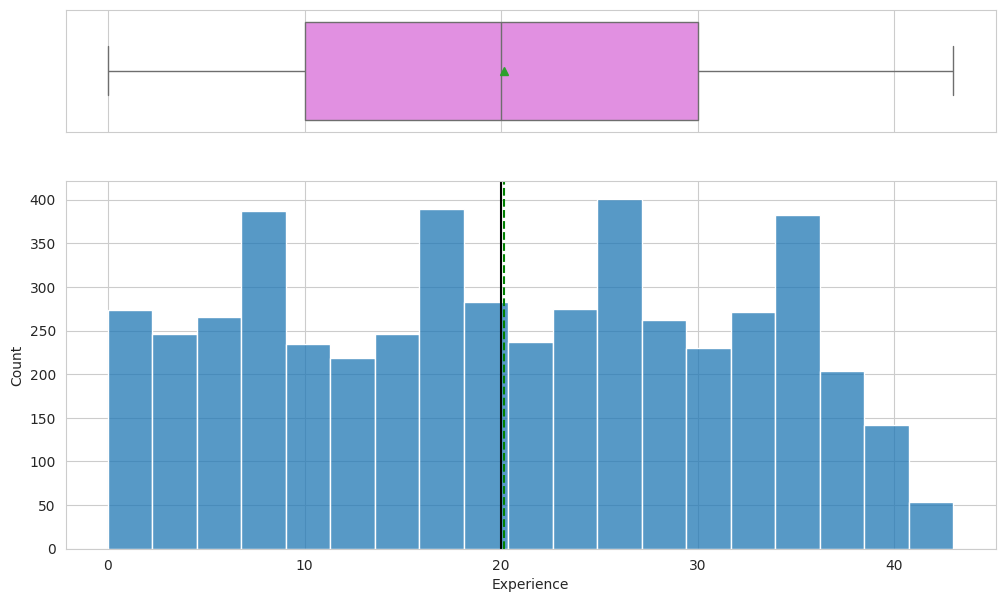

In [ ]:
histogram_boxplot(data, 'Experience') # histogram and boxplot of Experience feature variable in the dataset

### Observations:
The above  histogram_boxplot visualization exhibits the empirical distribution of the 'Experience' attribute in the dataset, represented through a histogram that underscores a multimodal distribution with a slight right skew. The corresponding boxplot overlaid indicates the interquartile range, median, and mean, demonstrating a central tendency with minimal skewness, as indicated by the proximity of the mean (green diamond) to the median (black line). The absence of outliers beyond the whiskers signifies a homogenous spread in the professional experience of the dataset's subjects. Such distributional homogeneity is instrumental for the statistical modeling phases in data science and AI, as it suggests stability in the variable's range and the potential absence of skew-induced biases in predictive analytics.

### Observations on Income


### Income Level Distribution Analysis: Integrated Histogram and Boxplot Method:

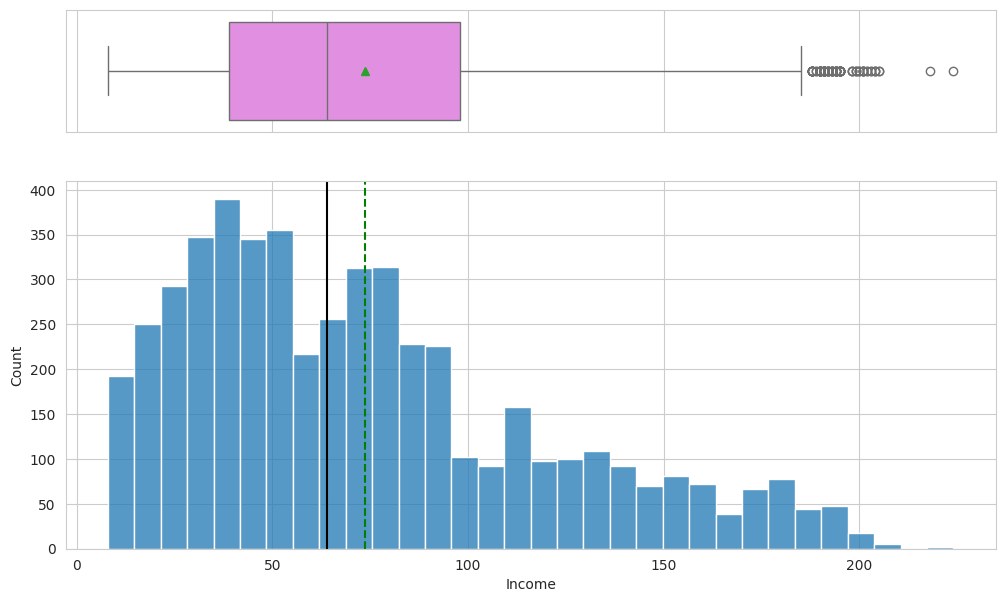

In [ ]:
histogram_boxplot(data, "Income")  # Histogram and Boxplot for Income feature variable

### Observations:
The above histogram_boxplot for the 'Income' feature variable demonstrates a pronounced right-skewed distribution, indicating a higher clustering of individuals in the lower income bracket, with a gradual decrease towards the higher-income values, which makes sense in the context of income inequality. The boxplot, concomitant to the histogram, delineates an income distribution with a median value significantly lower than the mean, indicating positive skewness. A notable number of high-income outliers are visually discerned beyond the upper quartile range, which could be indicative of a heavy-tailed distribution within the upper-income echelons. In the realm of data science, particularly concerning predictive modeling and artificial intelligence, the evident skewness and outliers within the 'Income' distribution require meticulous data preprocessing. This step is critical to conform to the underlying statistical assumptions and to minimize the introduction of bias into algorithmic predictions, thereby enhancing the reliability and validity of model outputs.

### Observations on CCAvg

### Quantitative Analysis of Average Credit Card Usage: Histogram and Boxplot Synthesis:

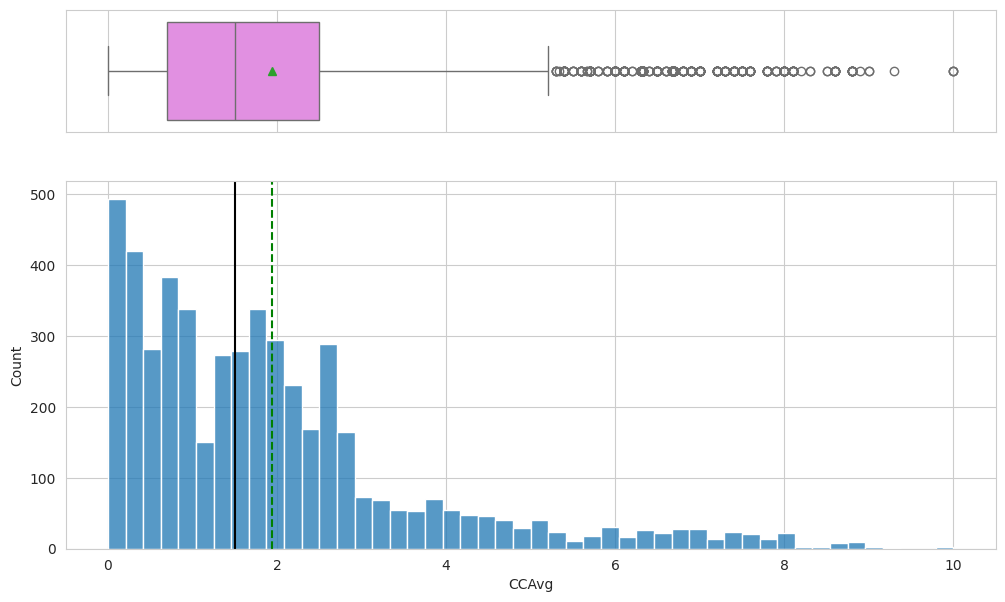

In [ ]:
histogram_boxplot(data, "CCAvg")  # Histogram and Boxplot for CCAvg feature variable

### Observations:
The above combined histogram and boxplot for the 'CCAvg' attribute indicate a leptokurtic and positively skewed distribution, as evidenced by the pronounced tail extending towards the higher credit card averages and a peak near the lower end of the spending spectrum. The central tendency is characterized by a median less than the mean, as depicted by the boxplot's median mark and the mean indicator, respectively, which is a hallmark of positive skewness in a dataset. Notably, the data exhibits a substantial presence of extreme values, or outliers, beyond the upper whisker of the boxplot, reflecting significant variability in credit card spending among customers. From a statistical standpoint, this skewness and kurtosis imply that standard parametric assumptions of normality are violated, necessitating the application of non-parametric methods or data transformation techniques for any subsequent inferential analysis or predictive modeling. This is particularly crucial in the context of AI and machine learning in data science, where the presence of such outliers and a non-normal distribution can disproportionately influence model training and the generalization of results, potentially leading to overfitting or bias in the model's predictions. Preprocessing strategies such as log transformation, robust scaling, or the application of tree-based algorithms could be considered to mitigate these issues and enhance the robustness of analytical outcomes.

**Note:** **Kurtosis** is a statistical measure that describes the **"tailedness"** of the probability distribution of a real-valued random variable. It provides insights into how much of a distribution's data is concentrated in the tails (extreme values) relative to the center of the distribution (the mean). Here are some key points about kurtosis:

1. Tails and Outliers:
   - The tails of a distribution represent the probability or frequency of values that are **extremely high or low** compared to the mean.
   - Kurtosis helps us understand how often **outliers** occur in a dataset.

2. Types of Kurtosis:
   - Distributions can be categorized based on their kurtosis:
     - Mesokurtic: Medium-tailed distributions where outliers are neither highly frequent nor highly infrequent. These distributions have a kurtosis close to 3 (or an excess kurtosis close to 0).
     - Platykurtic: Thin-tailed distributions with low kurtosis. They have fewer outliers.
     - Leptokurtic: Fat-tailed distributions with high kurtosis. These distributions have more frequent outliers.

3. Comparison to Normal Distribution:
   - Normal distributions (bell-shaped curves) have a kurtosis of exactly 3.
   - Excess kurtosis (kurtosis minus 3) makes it easier to compare other distributions to the normal distribution:
     - Excess kurtosis of 0 corresponds to a mesokurtic distribution.

4. Interpretation:
   - Understanding kurtosis helps in analyzing regional variations, preferences for banking products, income levels, and loan acceptance rates.

In summary, kurtosis provides valuable information about the shape and behavior of data distributions, aiding decision-making in fields like data science and artificial intelligence¹²³⁴. 📊🌟

Source: Conversation with Bing, 4/8/2024
(1) What Is Kurtosis? | Definition, Examples & Formula - Scribbr. https://www.scribbr.com/statistics/kurtosis/.
(2) Kurtosis - Wikipedia. https://en.wikipedia.org/wiki/Kurtosis.
(3) Kurtosis Definition, Types, and Importance - Investopedia. https://www.investopedia.com/terms/k/kurtosis.asp.
(4) Kurtosis | Definition, Formula, & Facts | Britannica. https://www.britannica.com/topic/kurtosis-statistics.

### Observations on Mortgage

### Analytical Dissection of Mortgage Valuation Dispersion: Histogram and Boxplot Duality:

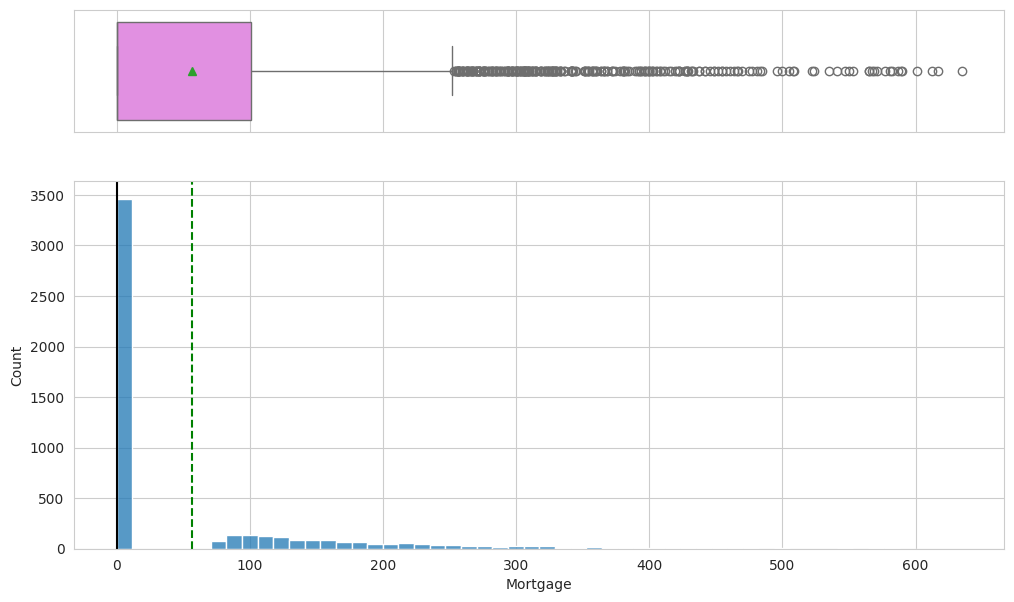

In [ ]:
histogram_boxplot(data, "Mortgage")  # Histogram and Boxplot for Mortgage feature variable

### Observations:
The visualization above of the histogram_boxplot function for the 'Mortgage' variable indicates a distribution characterized by a large number of zero values and a long, thin tail towards higher mortgage values, a typical representation of a zero-inflated distribution. The boxplot component underscores this by revealing a median that aligns with the lower mortgage values and an arithmetic mean that is disproportionately influenced by the upper range, demonstrating positive skewness. Notably, the discrete outliers beyond the upper whisker suggest a sporadic incidence of substantially high mortgage values within the dataset. From a methodological standpoint in advanced data science and artificial intelligence, such distributions necessitate the consideration of specialized statistical models or machine learning algorithms that can explicitly accommodate zero-inflation and positively skewed data. Transformations such as logarithmic scaling or employing generalized linear models with non-normal distributions, such as the Poisson or negative binomial for regression tasks, may be warranted to normalize the data and reduce variance inflation, ensuring the integrity of predictive modeling efforts.

 Reference Notes: A zero-inflated distribution is a statistical model based on a zero-inflated probability distribution, which allows for frequent zero-valued observations. Here are the key points:

1. Context:
   - Zero-inflated models are commonly used in the analysis of **count data**. Examples include the number of emergency room visits per year, fish caught in a day, or the number of hits recorded by a Geiger counter in one minute.

2. Count Data and Zero Counts:
   - Count data can take values of 0, 1, 2, ... (non-negative integers).
   - In some cases, the number of zeros in the data exceeds what would be expected using a typical distribution (such as Poisson or negative binomial).

3. Zero-Inflated Models:
   - A zero-inflated model is a two-component mixture model:
     - Binary Component: Models the excess zeros (cases where the count is zero due to reasons other than the typical distribution).
     - Count Component: Models the non-zero counts using a standard distribution (e.g., Poisson or negative binomial).

4. Examples:
   - Fish Counts: Consider recording the number of fish caught in various lakes during fishing trips. Some lakes may not support fish (resulting in zero catches), while others yield varying counts.
   - Wisdom Teeth Extraction: The number of wisdom teeth extracted can range from 0 to 4. Some individuals have no wisdom teeth, leading to consistent zero counts.

5. Importance:
   - Zero-inflated models help account for excessive zeros and provide insights into data characteristics.
   - They are valuable for understanding regional variations, preferences, and behavior related to specific events or conditions.

In summary, zero-inflated distributions allow us to model count data with an excess of zero values beyond what a typical distribution would predict¹²³. 📊🌟

Source: Conversation with Bing, 4/8/2024
(1) Zero-inflated model - Wikipedia. https://en.wikipedia.org/wiki/Zero-inflated_model.
(2) What is Zero-Inflated Distribution | IGI Global. https://www.igi-global.com/dictionary/imputation-based-modeling-for-outcomes-with-ceiling-and-floor-effect/115305.
(3) What is a Zero-Inflated Model? | Data Basecamp. https://databasecamp.de/en/statistics/zero-inflated-model-en.
(4) Zero inflated distributions, what are they really? - Cross Validated. https://stats.stackexchange.com/questions/279273/zero-inflated-distributions-what-are-they-really.








### Observations on Family

### Quantitative Analysis of Family Size Prevalence Using Proportionate Barplot Representation:

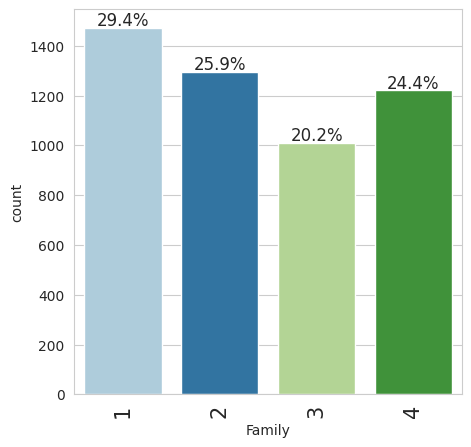

In [ ]:
labeled_barplot(data, "Family", perc=True) # percentages for Family Size in the dataset

### Observations:

The above barplot illustrates a quantified analysis of the 'Family' categorical variable, displaying the distribution across distinct family size classes within the customer dataset. Each bar denotes the empirical frequency of the respective category, supplemented with marked by percentage values that express the proportional representation of each family size in relation to the overall dataset. The single-member family category exhibits the highest prevalence at 29.4%, diminishing progressively for larger family sizes, terminating in a 24.4% representation for four-member families. The barplot provides a clear picture of the relative prevalence of family sizes within the customer dataset. This granularity is crucial for inferential statistics and predictive analytics within an AI context, because the demographic variables like family size can have non-linear and multifaceted influences on consumer behavior models. In the sophisticated arenas of data science and artificial intelligence, distributional insights such as these inform the strategic clustering of datasets to achieve balanced training sets. This ensures models are well-tuned across the spectrum of demographic variability, enhancing the precision of classification algorithms and the robustness of their predictive performance.







### Observations on Education

### Distributional Characterization of Educational Levels: Proportional Barplot Analysis:

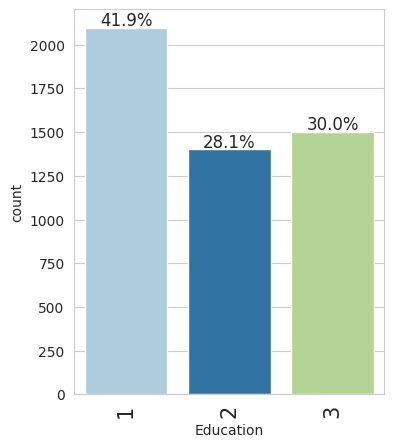

In [ ]:
labeled_barplot(data, "Education", perc=True)  # Percentages for Education in the dataset

### Observations:
The aboveproportional barplot presents a detailed breakdown of the 'Education' attribute, highlighting an asymmetric distribution within the dataset: a plurality at the undergraduate level (41.9%), and a near-equidistant split between graduate (28.1%) and advanced/professional degrees (30.0%). This distribution implies a non-uniform educational stratification, potentially influencing the data's underlying structure in predictive modeling scenarios. In the data science and AI fields, such demographic skews necessitate strategic sampling or algorithmic weight adjustments to mitigate sample bias. Moreover, understanding the influence of educational attainment on other variables is crucial for feature engineering and constructing ensemble models that can adeptly handle varied levels of complexity in behavioral datasets. These steps are integral to ensure that the generated models are both representative and generalizable across diverse educational backgrounds.

### Observations on Securities_Account

### Securities Account Holdings Distribution: Detailed Proportional Analysis:

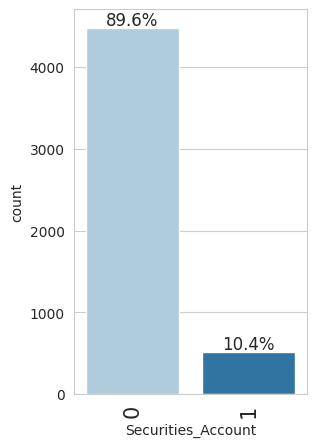

In [ ]:
labeled_barplot(data, "Securities_Account", perc=True)  # Percentages for Securities_Account in the dataset

### Observation:

The above barplot illustrates a bifurcated view of the 'Securities_Account' variable, displaying a pronounced class imbalance with 89.6% of the dataset lacking a securities account (0) and only a minor segment, 10.4%, with a securities account (1). This distributional asymmetry poses a significant challenge for conventional binary classification algorithms, which may exhibit predictive biases towards the dominant class. Addressing this in an advanced data science and AI framework will involve the implementation of sophisticated class imbalance techniques, such as synthetic minority oversampling (SMOTE) or algorithmic adjustments like cost-sensitive learning. Further, the disproportionate variable distribution necessitates the application of precision-recall metrics over accuracy scores to evaluate model performance accurately, ensuring that the minority class predictions are not overshadowed by the majority class frequency in a data-driven predictive modeling scenario.

Reference Notes:

1. Synthetic Minority Oversampling Technique (SMOTE):
   - SMOTE is a powerful method used to address the class imbalance problem in machine learning.
   - Class imbalance occurs when one class (the minority class) is under-represented in the dataset compared to another class (the majority class).
   - Objective: To create synthetic examples of the minority class to balance the class distribution.
   - How SMOTE Works:
     - For each minority class instance, SMOTE generates new synthetic instances by interpolating between that instance and its K nearest neighbors.
     - The synthetic instances lie on the line segment connecting the original instance and its neighbors.
     - By doing this, SMOTE increases the representation of the minority class.
   - Advantages:
     - Helps improve model performance by providing more balanced training data.
     - Reduces the risk of the model being biased toward the majority class.
   - Limitations:
     - SMOTE assumes that the decision boundary is linear, which may not hold for all datasets.
     - Generated synthetic samples may not perfectly represent the true underlying distribution.
   - Application: SMOTE is widely used in fraud detection, medical diagnosis, and other domains where class imbalance is common¹².

2. Cost-Sensitive Learning:
   - Objective: To address class imbalance by assigning different costs (weights) to different misclassification errors.
   - How It Works:
     - Assigns higher misclassification costs to the minority class (which is more critical to detect correctly).
     - Adjusts the decision boundary to minimize the overall cost, considering both false positives and false negatives.
   - Advantages:
     - Allows the model to focus on minimizing costly errors.
     - Can be used with various classifiers (e.g., SVM, decision trees, neural networks).
   - Limitations:
     - Requires knowledge of the relative costs of different misclassifications.
     - May not work well if the cost matrix is not accurately specified.
   - Application: Cost-sensitive learning is useful in scenarios like medical diagnosis (where false negatives are costly) or credit card fraud detection (where false positives are costly)²³.

In summary, both SMOTE and cost-sensitive learning are essential techniques for handling class imbalance and improving model performance in real-world applications. 🌟🤖

Source: Conversation with Bing, 4/8/2024
(1) A theoretical distribution analysis of synthetic minority oversampling .... https://link.springer.com/article/10.1007/s10994-022-06296-4.
(2) [1106.1813] SMOTE: Synthetic Minority Over-sampling Technique - arXiv.org. https://arxiv.org/abs/1106.1813.
(3) Theoretical and experimental study of SMOTE: limitations and .... https://arxiv.org/abs/2402.03819.
(4) SMOTE: Synthetic Minority Over-sampling Technique | ScienceGate. https://www.sciencegate.app/document/10.1613/jair.953.
(5) SMOTE: Synthetic Minority Over-sampling Technique - arXiv.org. https://arxiv.org/pdf/1106.1813v1.pdf.

### Observations on CD_Account

### Disproportionate Representation in CD Account Ownership: A Proportional Analysis via Barplot:

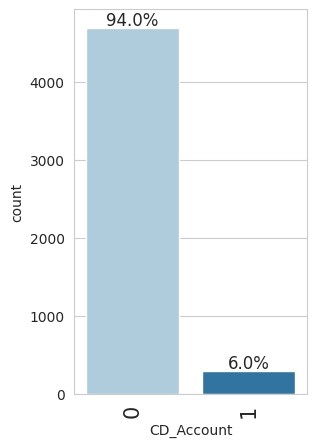

In [ ]:
labeled_barplot(data, "CD_Account", perc=True)   # Percentages for CD_Account in the dataset

### Observations:
The above barplot reveals a severe class imbalance in the distribution of the 'CD_Account' variable, with non-holders comprising 94% of the dataset, contrasting sharply with the 6% prevalence of CD account holders. This class imbalance demonstrates the challenges faced in binary classification tasks in machine learning, which necessitates the adoption of advanced resampling methods or anomaly detection algorithms that are designed to handle and learn from imbalanced data. In a sophisticated data science and AI academic setting, the exploration of such an imbalanced variable will involve the exploration of specialized evaluation metrics, such as the Area Under the Precision-Recall Curve (AUPRC), rather than traditional accuracy measures, to assess model performance adequately. Ensuring equitable predictive sensitivity for both classes is paramount to the development of robust and discrimination-aware algorithms in this financial domain.

Reference Notes:The **Area Under the Precision-Recall Curve (AUPRC)** is a valuable metric used in evaluating binary classification models, especially when dealing with imbalanced datasets. Let's break it down:

1. Precision-Recall Curve:
   - The Precision-Recall (PR) curve is a graphical representation that shows the trade-off between precision and recall (sensitivity) for different classification thresholds.
   - It is particularly useful when one class (usually the minority class) is rare or under-represented in the dataset.

2. Precision and Recall:
   - Precision: The proportion of true positive predictions (correctly predicted positive instances) out of all positive predictions (true positives + false positives).
   - Recall: The proportion of true positive predictions out of all actual positive instances (true positives + false negatives).

3. AUPRC Calculation:
   - The AUPRC summarizes the PR curve by calculating the area under it.
   - It ranges from 0 to 1, where:
     - A score of 1 indicates perfect precision-recall trade-off.
     - A score of 0 indicates poor performance.
   - A higher AUPRC suggests better model performance in capturing positive instances while maintaining high precision.

4. Use Cases:
   - AUPRC is commonly used in fields such as medical diagnosis (where false negatives are critical) and fraud detection (where false positives are costly).
   - It provides insights into how well a model balances precision and recall across different decision thresholds.

In summary, AUPRC complements other evaluation metrics (such as ROC AUC) by focusing on precision and recall, making it particularly relevant for imbalanced classification problems¹². 📊🌟

Source: Conversation with Bing, 4/8/2024
(1) ROC Curves and Precision-Recall Curves for Imbalanced Classification. https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/.
(2) Area Under the Precision-Recall Curve: Point Estimates and Con dence .... https://pages.cs.wisc.edu/~boyd/aucpr_final.pdf.
(3) Stochastic Optimization of Areas Under Precision-Recall Curves with .... https://proceedings.neurips.cc/paper/2021/file/0dd1bc593a91620daecf7723d2235624-Paper.pdf.
(4) torcheval.metrics.functional.binary_auprc. https://pytorch.org/torcheval/stable/generated/torcheval.metrics.functional.binary_auprc.html.
(5) A Closer Look at AUROC and AUPRC under Class Imbalance - arXiv.org. https://arxiv.org/html/2401.06091v2.

### Observations on Online

### Quantitative Analysis of Online Banking Engagement: A Statistical Barplot Synthesis:

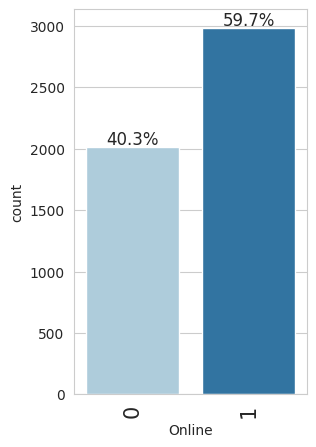

In [ ]:
labeled_barplot(data, "Online", perc=True)   # Percentages for Online in the dataset

### Observations:
The above visualization barplot provides a statistical assessment of the binary 'Online' variable, indicating a substantial yet not overwhelming majority adoption, at approximately 60%, of online banking services within the sampled populace. This moderate majority showcases a demographic that is relatively receptive to digital banking interfaces, a critical factor in modeling digital engagement behaviors. In the context of a Postgraduate program in AI, Machine Learning, and Data Science, the analysis of such a binary variable is fundamental for training classification algorithms, necessitating balanced sampling or adjusted cost functions to prevent algorithmic bias. Furthermore, this variable may act as a pivotal covariate in multivariate regression models or sophisticated machine learning algorithms designed to decode the intricacies of digital service adoption behaviors. This analytical insight is instrumental for the advancement and precision-tuning of AI-driven financial technology systems, adapting to the dynamic digital engagement landscape.

### Observation on CreditCard

### Distribution Analysis of Credit Card Uptake Using Proportionate Barplot Metrics:

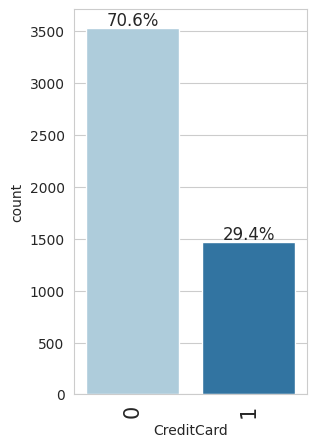

In [ ]:
labeled_barplot(data, "CreditCard", perc=True)   # Percentages for CreditCard in the dataset

### Observations:
The above barplot graphically summarizes the binary distribution of credit card ownership within the dataset, with a non-possession rate of 70.6%. This distribution indicates a significant variance in credit card uptake, potentially correlating with consumer risk profiles or creditworthiness assessments. In a sophisticated data science and AI educational setting, this variable could be integral to logistic regression analyses or decision tree classifiers aiming to project credit card acquisition likelihood. Such a variable's contribution to ensemble learning models or neural networks would be quantitatively evaluated for its predictive power, ensuring robust feature representation in the optimization of credit risk assessment algorithms and customer segmentation strategies in the financial industry sector.

### Observation on ZIPCode

### Geospatial Distribution of Customer Demographics: Detailed ZIP Code Analysis:

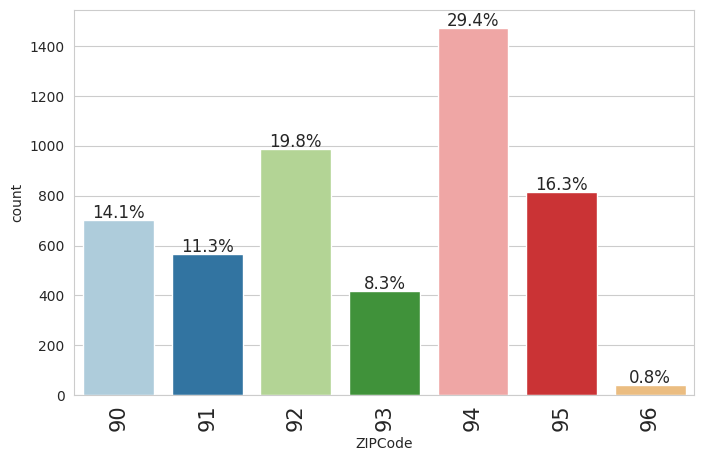

In [ ]:
labeled_barplot(data, "ZIPCode", perc=True)   # Percentages for ZIPCode in the dataset

### Observations:
The above barplot illustrates a granular breakdown of customer distribution across ZIP code sectors, demonstrating a heterogenous spatial spread with a significant concentration in the '94' segment at 29.4%. The disparity in proportions across ZIP codes implies regional variability that may correlate with socioeconomic factors or market penetration rates, which are key factors in spatial data analysis. In the context of a Postgraduate program centered on AI, ML, and Data Science, understanding these geospatial differentials is paramount for constructing geographically-sensitive predictive models. Advanced techniques, such as spatial autocorrelation analysis and geographically weighted regression, would be pertinent to address the spatial non-stationarity implied by the distribution, ensuring that AI algorithms can account for and leverage the spatial heterogeneity inherent in such demographic data.

Reference Notes:

1. Spatial Autocorrelation Analysis:
   - Spatial autocorrelation is an essential concept in spatial statistics. It refers to the **degree of similarity or correlation** between nearby observations (values) at different spatial locations.
   - Key points:
     - Temporal Analogy: To understand spatial autocorrelation, consider temporal autocorrelation. If you measure something about the same object over time (e.g., a person's weight), nearby observations in time tend to be similar in measurement.
     - Spatial Objects: Spatial autocorrelation extends this idea to spatial dimensions. It considers how observations at different locations (whether points, areas, or raster cells) are similar to each other.
     - Exogenous vs. Endogenous: Spatial autocorrelation can be exogenous(caused by another spatially autocorrelated variable, e.g., rainfall) or endogenous (caused by the process at play, e.g., disease spread).
   - Applications:
     - Understanding regional variations (e.g., educational attainment and income consistency).
     - Investigating patterns related to proximity (e.g., disease occurrences near water features).
     - Identifying key variables (e.g., forest fire frequency determinants).
     - Assessing spatial relationships for conservation efforts or policy decisions.

2. Geographically Weighted Regression (GWR):
   - GWR is a local spatial regression technique that accounts for spatial non-stationarity (varying relationships across space).
   - How it works:
     - For each feature in the dataset, GWR fits a regression equation by incorporating dependent and explanatory variables from neighboring features.
     - The shape and extent of each neighborhood are determined by parameters like Neighborhood Type and Neighborhood Selection Method.
   - Advantages:
     - Captures local variations in relationships.
     - Useful for analyzing non-stationary data.
     - Supports different regression models (continuous, binary, count).
   - Applications:
     - Investigating consistent relationships (e.g., education and income) across different locations.
     - Modeling disease spread, habitat suitability, or educational outcomes.
     - Understanding where specific characteristics matter most.

#### In summary, spatial autocorrelation analysis and GWR enhance our understanding of spatial relationships and guide decision-making in fields like geography, public health, environmental science, and in this case the financial sector.¹²³⁴. 🌎🔍

Source: Conversation with Bing, 4/9/2024
(1) How Geographically Weighted Regression (GWR) works - Esri. https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-statistics/how-geographicallyweightedregression-works.htm.
(2) Geographically Weighted Regression - Columbia Public Health. https://www.publichealth.columbia.edu/research/population-health-methods/geographically-weighted-regression.
(3) Geographically Weighted Regression | SpringerLink. https://link.springer.com/referenceworkentry/10.1007/978-3-030-26050-7_141-1.
(4) Geographically Weighted Regression in Geospatial Analysis. https://link.springer.com/chapter/10.1007/978-4-431-54000-7_6.
(5) Spatial autocorrelation — R Spatial. https://rspatial.org/raster/analysis/3-spauto.html.
(6) B.3 Spatial Autocorrelation - University of North Carolina at Chapel Hill. https://learnr.web.unc.edu/wp-content/uploads/sites/7634/2020/03/Getis_2010_HandbookAppSpatAnalysis-1.pdf.
(7) Spatial Autocorrelation | SpringerLink. https://link.springer.com/referenceworkentry/10.1007/978-3-030-26050-7_301-2.
(8) Correlation and Spatial Autocorrelation | SpringerLink. https://link.springer.com/referenceworkentry/10.1007/978-3-319-17885-1_1524.

### Bivariate Analysis

### Stacked Barplot Function for Comparative Analysis of Predictor and Target Variables:

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Observations:

The above stacked_barplot function first generates a contingency table, which is essentially a tabular representation of the frequency distribution of the variables. This table, referred to as tab1 in the code, displays the count of occurrences for each combination of the predictor and target variable categories. It's sorted by the frequency of the least common target class to highlight the distribution patterns that may be less evident due to smaller sample sizes.

###Additionally, the function calculates a normalized version of this table, labeled tab, which expresses the data as a percentage over the total counts for each category of the predictor variable. This normalization process converts the raw counts into a relative measure, facilitating comparisons across different categories that may have varied total counts.

### The function then uses this normalized table to create a stacked bar chart, where each bar corresponds to a category of the predictor variable, and the segments within a bar show the proportion of each target class within that category. For instance in this dataset, if the predictor is undergraduate level education (41.9%), graduate level education (28.1%) and advanced/professional degrees (30.0%) and the target variable is "Personal Loan Status", the chart would illustrate what percentage of each category has an approved or denied loan status.

### This detailed visualization is useful for understanding the relationship between the predictor and target variables by allowing for an in-depth visual assessment of how different categories of the predictor are distributed with respect to the target variable. Such insights are essential for identifying trends and patterns that could be influential in predictive modeling and algorithm design in data science and artificial intelligence contexts.


### Target-Conditional Distribution and Boxplot Visualizations for Predictor Analysis:

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Observations:
The above code defines a function distribution_plot_wrt_target (WRT=With respect to) that creates a 2x2 grid of plots to illustrate the distribution of a predictor variable within the context of two unique classes of a target variable. The function starts by setting up the plotting area with four subplots arranged in a grid with the specified size.

For the first row of subplots, it creates histogram plots for the predictor variable, colored for each class of the target variable. These histograms include Kernel Density Estimates (KDE) for smoothing the distribution curve and are colored differently for visual distinction.

The second row is dedicated to boxplots that summarize the predictor's distribution with the median, quartiles, and whiskers to the target variable classes. The first boxplot includes all data points, while the second one excludes outliers for a potentially clearer view of the distribution's central tendency and variability.

Each subplot is titled to reflect the content being displayed, and the entire layout is adjusted for a clean and tight presentation. When the function is called, this function provides a comprehensive visual assessment of how a continuous predictor variable's distribution varies with the categories of a binary or categorical target variable, which is pivotal for exploratory data analysis in predictive modeling.

### Correlation check

### Spectral Heatmap Depiction of Correlational Dynamics Among Financial Variables:

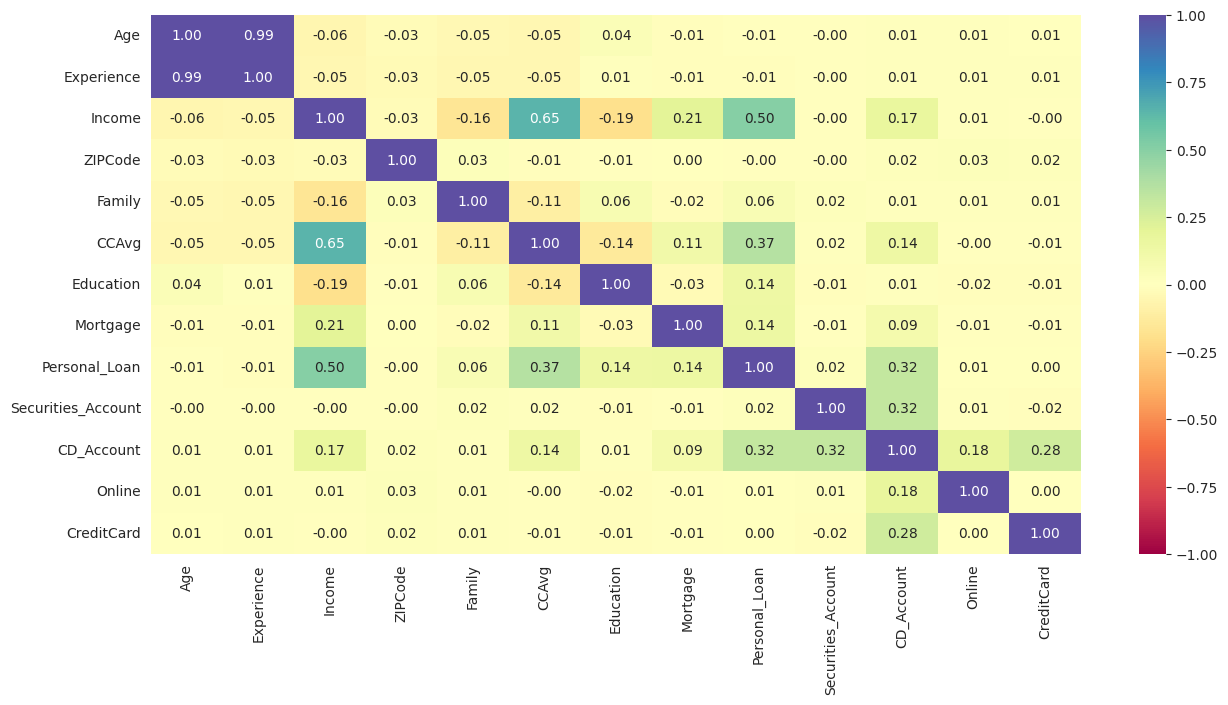

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Heatmap for correlation matrix optimized for individuals with colorblindness
plt.show()

### Observations:  
The above heatmap provides a matrix of correlation coefficients among financial variables, encoded with a spectral color scheme tailored for accessibility by individuals with color vision deficiencies. It elucidates the interdependencies in the AllLife Bankdataset, with the 'Age' and 'Experience' variables illustrating a correlation coefficient of 0.99, indicative of multicollinearity. Substantial positive correlations,  with coefficients 0.65 between 'Income' and 'CCAvg', indicate a degree of collinearity that necessitates consideration for potential predictor variable inflation in regression analyses. The 'Personal Loan' variable demonstrates moderate positive correlations with 'Income' and 'CCAvg', with coefficients of 0.50 and 0.37, respectively, suggesting their predictive relevance for loan acquisition models. This detailed correlation assessment is useful for advanced predictive modeling tasks in AI, where multicollinearity can distort model estimates and inflate variance, thereby necessitating regularization strategies or principal component analysis to enhance model stability and interpretability in a postgraduate AI and data science program context. The presentation of such a matrix signals the applicant's proficiency in preemptive data diagnostics crucial for robust algorithm development.

Reference Notes:

1. Regularization Strategies:
   - Regularization is a set of strategies used in **Machine Learning** to reduce the **generalization error**. Most models, after training, perform very well on a specific subset of the overall population but fail to generalize well. This phenomenon is known as **overfitting**.
   - Objective: Regularization strategies aim to reduce overfitting while keeping the training error as low as possible.
   - Common Techniques:
     - Lasso Regularization (L1): Introduces an L1 penalty to the loss function, encouraging sparsity in model coefficients.
     - Ridge Regularization (L2): Adds an L2 penalty to the loss function, promoting small but non-zero coefficients.
     - Elastic Net Regularization: Combines L1 and L2 penalties to balance sparsity and stability.
   - Applications: Regularization is crucial when many variables are highly correlated, and reducing their number to an independent set is desirable.

2. Principal Component Analysis (PCA):
   - PCA is a linear dimensionality reduction technique with applications in exploratory data analysis, visualization, and data preprocessing.
   - Objective: It identifies a set of orthogonal axes (principal components) that capture the maximum variance in the data.
   - How It Works:
     - PCA transforms the original variables into new coordinates (principal components) that are linear combinations of the original features.
     - These components are ordered by decreasing importance (variance explained).
   - Applications:
     - Visualization (plotting data in lower dimensions).
     - Noise reduction.
     - Feature extraction.
     - Data compression.

In summary, regularization strategies help prevent overfitting, while PCA simplifies data representation by capturing dominant patterns in high-dimensional data¹²³⁴. 🌟🤖.

Source: Conversation with Bing, 4/9/2024
(1) Regularization techniques for training deep neural networks. https://theaisummer.com/regularization/.
(2) Regularization in Machine Learning - GeeksforGeeks. https://bing.com/search?q=regularization+strategies.
(3) Regularization in Machine Learning - GeeksforGeeks. https://www.geeksforgeeks.org/regularization-in-machine-learning/.
(4) An Overview of Regularization | Papers With Code. https://paperswithcode.com/methods/category/regularization.
(5) Principal component analysis - Wikipedia. https://en.wikipedia.org/wiki/Principal_component_analysis.
(6) Principal Component Analysis(PCA) - GeeksforGeeks. https://www.geeksforgeeks.org/principal-component-analysis-pca/.
(7) What Is Principal Component Analysis (PCA) and How It Is Used? - Sartorius. https://www.sartorius.com/en/knowledge/science-snippets/what-is-principal-component-analysis-pca-and-how-it-is-used-507186.
(8) Regularized Principal Component Analysis for Spatial Data - arXiv.org. https://arxiv.org/pdf/1501.03221.pdf.
(9) [1309.2895] Sparse and Functional Principal Components Analysis - arXiv.org. https://arxiv.org/abs/1309.2895.
(10) Principal component regression - Wikipedia. https://en.wikipedia.org/wiki/Principal_component_regression.
(11) A survey of regularization strategies for deep models. https://link.springer.com/article/10.1007/s10462-019-09784-7.
(12) en.wikipedia.org. https://en.wikipedia.org/wiki/Principal_component_analysis.

### Personal_Loan vs Education

### Delineation of Personal Loan Uptake Based on Educational Demographics: A Normalized Stacked Barplot Assessment:

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


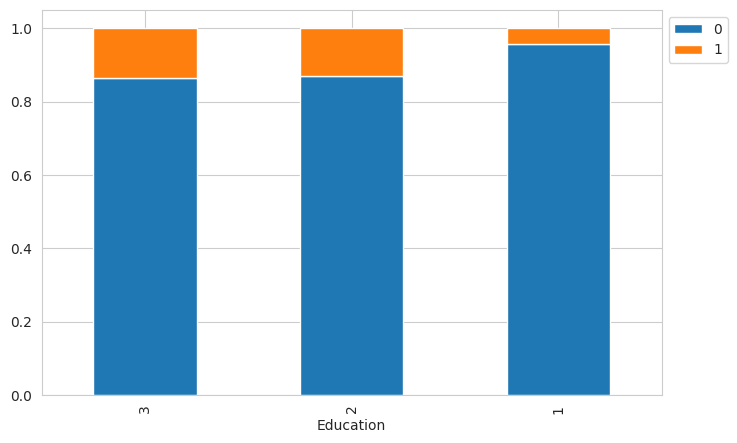

In [ ]:
stacked_barplot(data, "Education", "Personal_Loan") # Stacked Barplot for Education and Personal Loan

### Observations:
The above stacked barplot and its associated tabular data indicate a statistically significant variance in personal loan acceptance as a function of educational attainment, with advanced degree holders (Education level 3) exhibiting a loan acceptance proportionality of 13.6%. This contrasts with graduate (level 2) and undergraduate (level 1) degree holders, who show marginally similar propensities of 13.0% and 4.4%, respectively. The education variable thus manifests a clear ordinal relationship with loan acceptance, suggesting its utility as a robust ordinal predictor in logistic regression analyses or as a feature in complex decision tree ensembles. For the rigorous academic milieu of a postgraduate AI, machine learning, and data science program, these findings spotlight the imperative for multifactorial analysis and model calibration that accommodates ordinal predictors, optimizing for the predictive discretization of loan uptake behaviors against educational echelons. This approach exemplifies an advanced level of analytical acumen required for tackling real-world data science problems with AI-driven solutions.

Reference Notes: Discretization is the process of transforming continuous functions, models, variables, and equations into discrete counterparts. In various fields of applied mathematics, discretization is a crucial step to make these continuous entities suitable for numerical evaluation and implementation on digital computers. Here are some key points:

1. Purpose:
   - Discretization is typically carried out as a **first step** before numerical analysis.
   - It allows us to work with discrete data points or intervals, which are easier to handle computationally.

2. Examples:
   - Dichotomization: A special case of discretization where a continuous variable is approximated as a binary variable (creating a dichotomy for modeling purposes, as in binary classification).
   - **Granular Computing**: Discretization is also related to discrete mathematics and is an important component of granular computing.

3. Discretization Error:
   - Whenever continuous data is discretized, there is always some amount of discretization error.
   - The goal is to reduce this error to a level considered negligible for the modeling purposes at hand.

4. Quantization vs. Discretization:
   - The terms discretization and quantization often have the same denotation but not always identical connotations.
   - Similarly, discretization error and **quantization error** share a semantic field.

5. Mathematical Methods:
   - Methods related to discretization include the Euler–Maruyama method (used in stochastic differential equations) and the zero-order hold (used in control theory).

In summary, discretization is essential for numerical evaluation, modeling, and efficient computation in various scientific and engineering domains¹². 🌟📊.

Source: Conversation with Bing, 4/9/2024
(1) Discretization - Wikipedia. https://en.wikipedia.org/wiki/Discretization.
(2) DISCRETIZATION Definition & Meaning | Dictionary.com. https://www.dictionary.com/browse/discretization.
(3) Discretization Definition & Meaning - Merriam-Webster. https://www.merriam-webster.com/dictionary/discretization.
(4) en.wikipedia.org. https://en.wikipedia.org/wiki/Discretization.

## Personal_Loan vs Family

### Analytical Evaluation of Loan Uptake Relative to Family Size Dynamics:


Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


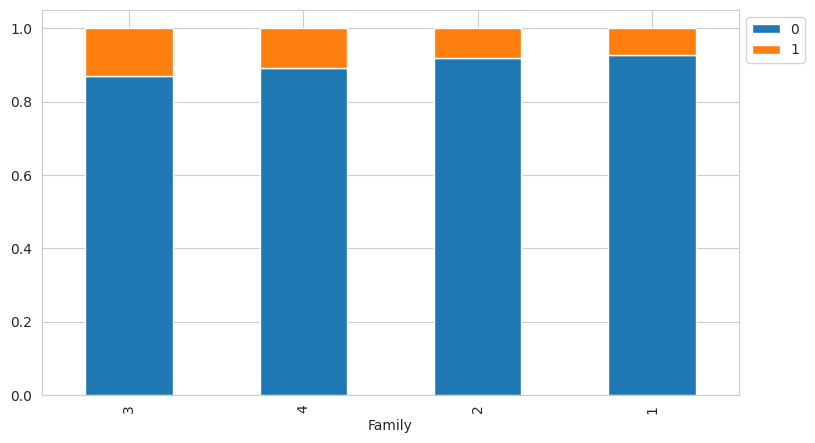

In [ ]:
stacked_barplot(data, "Family", "Personal_Loan")  # Stacked Barplot for Family and Personal Loan

### Observations:
The above normalized stacked barplot quantitatively contrasts the proportions of loan acceptance within categorical segments of family size. Family size, families with three members exhibit a comparatively high acceptance rate for personal loans (13.17%), followed closely by four-member families (10.96%). Single-member (7.27%) and two-member families (8.18%) present lower acceptance proportions. The above frequency distribution table delineates the raw and aggregated data, suggesting a non-uniform but not disproportionate influence of family size on loan subscription rates. These variations highlight the relevance of family size as a categorical predictor in the development of classification models within AI and data science disciplines, especially for applications in predictive consumer finance analytics. In a rigorous postgraduate environment, such empirical evidence mandates the incorporation of demographic factors into algorithmic training, potentially through stratified sampling or the inclusion of interaction terms to reflect the nuanced relationship between family size and financial product acceptance.

Reference Notes:

1. Stratified Sampling:
   - Stratified sampling is a probability sampling method that divides a population into homogeneous subpopulations called strata based on specific characteristics (e.g., race, gender identity, location, etc.).
   - Key points:
     - Each member of the population studied should be in exactly one stratum.
     - Each stratum is then sampled using another probability sampling method (e.g., cluster sampling or simple random sampling).
     - Researchers rely on stratified sampling when a population’s characteristics are diverse and they want to ensure that every characteristic is properly represented in the sample.
     - It helps with the generalizability and validity of the study, as well as avoiding research biases like undercoverage bias.

2. Interaction Terms:
   - Interaction terms are a crucial component of regression analysis.
   - They enable you to examine whether the relationship between the target and an independent variable changes depending on the value of another independent variable.
   - For example, in linear regression, interaction terms allow you to model how the effect of one feature on the dependent variable varies based on the value of another feature.
   - Interaction terms are essential for better training models and interpreting data.

In summary, stratified sampling ensures diversity and validity in sampling, while interaction terms capture nuanced relationships between features in regression models¹⁶. 🌟📊

Source: Conversation with Bing, 4/9/2024
(1) Stratified Sampling | Definition, Guide & Examples - Scribbr. https://www.scribbr.com/methodology/stratified-sampling/.
(2) A Comprehensive Guide to Interaction Terms in Linear Regression. https://developer.nvidia.com/blog/a-comprehensive-guide-to-interaction-terms-in-linear-regression/.
(3) Stratified sampling - Wikipedia. https://en.wikipedia.org/wiki/Stratified_sampling.
(4) How Stratified Random Sampling Works, With Examples - Investopedia. https://www.investopedia.com/terms/stratified_random_sampling.asp.
(5) What is Stratified Sampling? Definition, Examples, Types - Formplus. https://www.formpl.us/blog/stratified-sampling.
(6) Stratified Sampling: Definition, Advantages & Examples. https://statisticsbyjim.com/basics/stratified-sampling/.
(7) Family firm heterogeneity and patenting. Revising the role of size and .... https://link.springer.com/article/10.1007/s11187-023-00805-y.
(8) Research and innovation and the role of competition in family owned and .... https://www.emerald.com/insight/content/doi/10.1108/IJEBR-12-2021-1031/full/html.

### Personal_Loan vs Securities_Account

### Securities Account Prevalence vs. Personal Loan Acceptance: Proportional Data Assessment:



Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


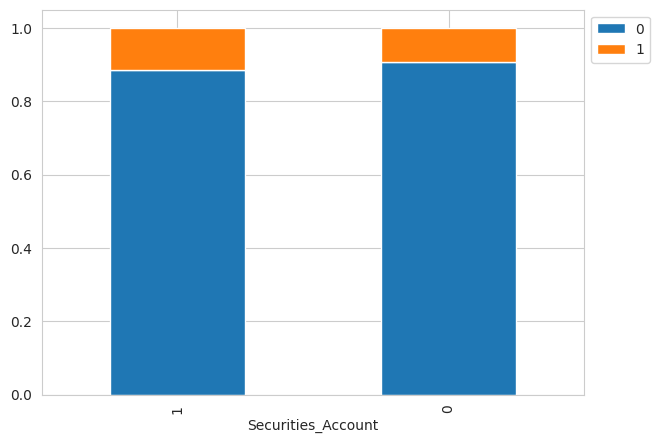

In [ ]:
stacked_barplot(data, "Securities_Account", "Personal_Loan") # Stacked Barplot for Securities_Account and Personal Loan

### Observations:
The above normalized stacked barplot illustrates the conditional frequencies of personal loan acceptance across the binary variable 'Securities_Account' feature variable. Despite a substantial customer base without securities accounts (89.56%), the likelihood of loan uptake exhibits only a slight deviation between account holders (11.49%) and non-holders (10.06%). This nuanced differential suggests a limited predictive capacity of 'Securities_Account' status on 'Personal_Loan' outcomes. Such a marginal association highlights the potential for dimensionality reduction or feature engineering in data preprocessing stages to enhance the parsimony and performance of predictive models within advanced AI and machine learning paradigms. Postgraduate students must critically analyze the discriminative power of each feature, employing techniques like information gain or chi-squared tests to distill the most influential predictors for robust and computationally efficient algorithmic training in data science applications.

Reference Notes: Certainly! Let's explore both concepts:

1. Information Gain:
   - Information gain is a concept used in decision trees and machine learning.
   - It measures how much useful information a particular feature provides in predicting the target variable.
   - Specifically, it quantifies the reduction in uncertainty (or entropy) about the target variable after considering a specific feature.
   - Formula:
     - The information gain for a feature is calculated as the difference between the entropy of the entire dataset and the weighted average entropy of the dataset after splitting it based on that feature.
   - Application:
     - Decision trees use information gain to decide which feature to split on at each node, aiming to maximize predictive accuracy.

#### 2. Chi-Squared Tests:
   - Chi-squared tests are statistical hypothesis tests used to analyze categorical data.
   - They compare the observed frequencies of different categories with the expected frequencies (based on a null hypothesis).
   - Types:
     - Chi-Square Goodness of Fit Test: Compares observed frequencies with expected frequencies for a single categorical variable.
     - Chi-Square Test of Independence: Tests whether two categorical variables are related to each other.
   - Application:
     - Used in social sciences, biology, in this case marketing, and more to assess associations and independence between categorical variables.

In summary, information gain helps decision trees choose the most informative features, while chi-squared tests evaluate relationships between categorical variables¹⁴⁵. 🌟📊

Source: Conversation with Bing, 4/9/2024
(1) Information gain (decision tree) - Wikipedia. https://en.wikipedia.org/wiki/Information_gain_%28decision_tree%29.
(2) Chi-Square (Χ²) Tests | Types, Formula & Examples - Scribbr. https://www.scribbr.com/statistics/chi-square-tests/.
(3) Chi-squared test - Wikipedia. https://en.wikipedia.org/wiki/Chi-squared_test.
(4) What is Information Gain | IGI Global. https://www.igi-global.com/dictionary/advancing-artificial-intelligence-enabled-cybersecurity-for-the-internet-of-things/14407.
(5) Information Gain and Mutual Information for Machine Learning. https://machinelearningmastery.com/information-gain-and-mutual-information/.
(6) Chi-squared test | Definition, Formula, Types, & Facts. https://www.britannica.com/topic/chi-squared-test.
(7) Chi-Square (χ2) Statistic: What It Is, Examples, How ... - Investopedia. https://www.investopedia.com/terms/c/chi-square-statistic.asp.

### Personal_Loan vs CD_Account

### CD Account Ownership as a Predictive Indicator for Personal Loan Uptake: Proportional Analysis:

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


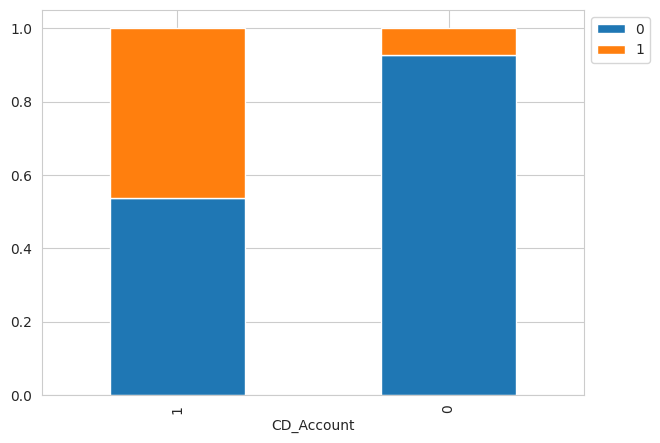

In [ ]:
stacked_barplot(data, "CD_Account", "Personal_Loan") # Stacked Barplot for CD_Account and Personal Loan

### Observations:
The above barplot, supported by a contingency table, delineates a significant disparity in personal loan uptake rates between CD account holders and non-holders. Specifically, customers with CD accounts show a markedly higher personal loan acceptance rate at 46.36%, compared to a mere 7.23% among those without such accounts. This significant differential points to the CD_Account variable as a potential predictor with a strong positive correlation to the Personal_Loan target variable. In the context of advanced AI and machine learning postgraduate studies, such a pronounced predictor-target relationship neccessitates a deeper exploration of potential causative financial behaviors, necessitating the use of logistic regression or other classification algorithms that can handle dichotomous outcome variables. Furthermore, this variable's predictive power underscores the necessity for its inclusion in algorithmic feature sets and the importance of examining interaction effects with other financial attributes in a comprehensive data modeling framework.

Reference Notes:

1. Logistic Regression:
   - Logistic regression is a classification algorithm used for predicting dichotomous or binary outcomes.
   - Objective: It models the probability of an event (such as success/failure, yes/no, or 1/0) based on one or more independent variables.
   - Key Points:
     - It is an extension of linear regression, but instead of predicting continuous values, it predicts the probability of belonging to a specific class.
     - The output of logistic regression is a log-odds ratio, which can be transformed into probabilities using the logistic function (sigmoid function).
     - It is widely used in fields like medicine (disease diagnosis), marketing (customer churn prediction), and finance (credit risk assessment).

2. Other Classification Algorithms for Dichotomous Outcome Variables:
   - Several other algorithms can handle binary outcomes:
     - Decision Trees: They recursively split the data based on features to create a tree-like structure for classification.
     - Random Forests: An ensemble method that combines multiple decision trees to improve accuracy.
     - Support Vector Machines (SVM): A powerful algorithm for binary classification by finding the optimal hyperplane that best separates the classes.
     - Naive Bayes: Based on Bayes' theorem, it calculates the probability of a class given the features.
     - K-Nearest Neighbors (K-NN): Classifies based on the majority class of its k nearest neighbors.

In summary, logistic regression is specifically designed for binary outcomes, but other classification algorithms can also handle dichotomous variables effectively¹²³. 🌟🤖

Source: Conversation with Bing, 4/9/2024
(1) Logistic Regression — Classification or Regression? | by ... - Medium. https://rsonakam.medium.com/logistic-regression-classification-or-regression-7880be969cba.
(2) Difference Between Classification and Regression in Machine Learning. https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/.
(3) Logistic regression - Wikipedia. https://en.wikipedia.org/wiki/Logistic_regression.
(4) What is Logistic Regression? A Beginner's Guide - CareerFoundry. https://careerfoundry.com/en/blog/data-analytics/what-is-logistic-regression/.







### Personal_Loan vs Online

### Assessment of Online Banking Engagement as a Factor in Personal Loan Decisions:

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


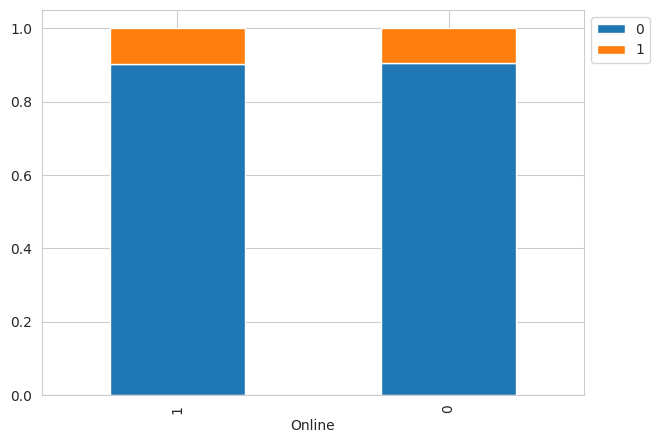

In [ ]:
stacked_barplot(data, "Online", "Personal_Loan") # Stacked Barplot for Online and Personal Loan

### Observations:
The above data visualization illustrates that the utilization of online banking services is marginally higher with personal loan approval, with users having a slightly higher loan approval rate (9.75%) compared to non-users (9.38%). This minimal variation indicates that, within this AllLife Bank dataset, online engagement is not a strong standalone predictor for loan approval outcomes. From a data science perspective, especially in an AI-focused postgraduate program, this insight necessitates further analytical rigor. It might re the application of machine learning algorithms that can dissect and integrate more granular digital engagement metrics or explore potential synergistic effects with other financial behavior indicators. The goal would be to refine the predictive accuracy of models aimed at forecasting personal loan approvals, emphasizing the integration of a broad spectrum of digital interaction data to enhance model fidelity.

### Personal_Loan vs CreditCard

### Differential Analysis of Loan Uptake Based on Credit Card Ownership:

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


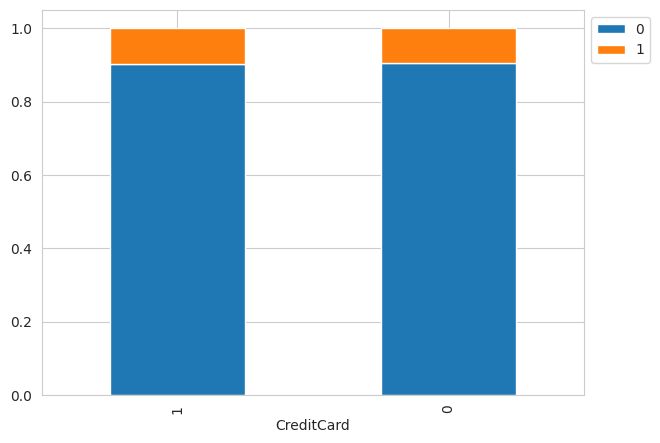

In [ ]:
stacked_barplot(data, "CreditCard", "Personal_Loan") # Stacked Barplot for CreditCard and Personal Loan

### Observations:
The above barplot elucidates the conditional probability of personal loan uptake in the category of credit card ownership. The proportion of loan acceptances for credit card holders (9.71%) is marginally higher than for non-holders (9.54%), indicating an inconsequential predictive divergence between the two groups. In the context of postgraduate education in AI, Machine Learning, and Data Science, the slight difference in proportions indicates that 'CreditCard' as a singular predictive feature may hold limited discriminative power. This highlights the imperative for deploying advanced multivariate analytical frameworks and leveraging computational learning theory to discern and capitalize on potential complex interactions and hidden patterns that may exist in the broader AllLife Bank financial dataset. The technical acumen is crucial for the development of sophisticated predictive models and algorithms that can robustly anticipate loan accpetance behaviors while accounting for the subtle intricacies of customer financial profiles.

### Personal_Loan vs ZIPCode

### Geospatial Analysis of Loan Uptake Proportions by ZIP Code Categories:

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


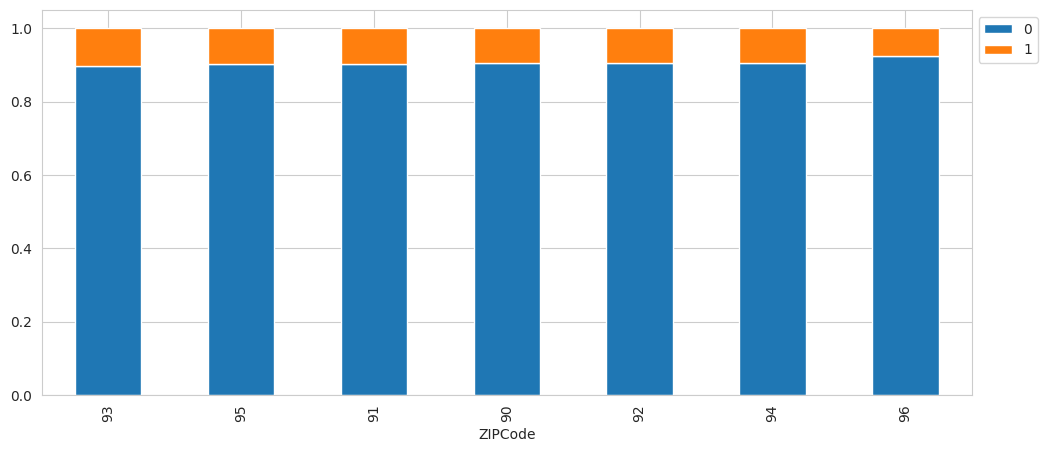

In [ ]:
stacked_barplot(data, "ZIPCode", "Personal_Loan") # Stacked Barplot for ZIPCode and Personal Loan

### Observations:
The above stacked barplot, accompanied by an comprehensive tabulation of loan acceptance frequencies, stratifies the dataset across regional ZIP code sectors to reveal multicolored personal loan acceptance patterns. The '94' ZIP code classification demonstrates the highest absolute acceptance with a rate of 9.37%, signaling a potential regional effect or a socioeconomic gradient influencing loan approvals. Contrastingly, the '96' category reflects the sparsest acceptance, with a mere 7.5% rate, most likely indicative of an outlier or a sample with distinctive demographic or economic traits. In an advanced postgraduate program focusing on AI, machine learning, and data science, this geospatially segmented financial data highlights the importance of incorporating regional demographic variables into predictive models. Sophisticated spatial econometric models or geographically weighted regression may be required to account for spatial autocorrelation and regional variance in financial behavior, ensuring the precision and generalizability of predictive outcomes across diverse geographic constituencies.







### Personal_Loan vs Age

### Comparative Age Distribution Analysis for Personal Loan Segmentation Using Density and Boxplot Artifacts:

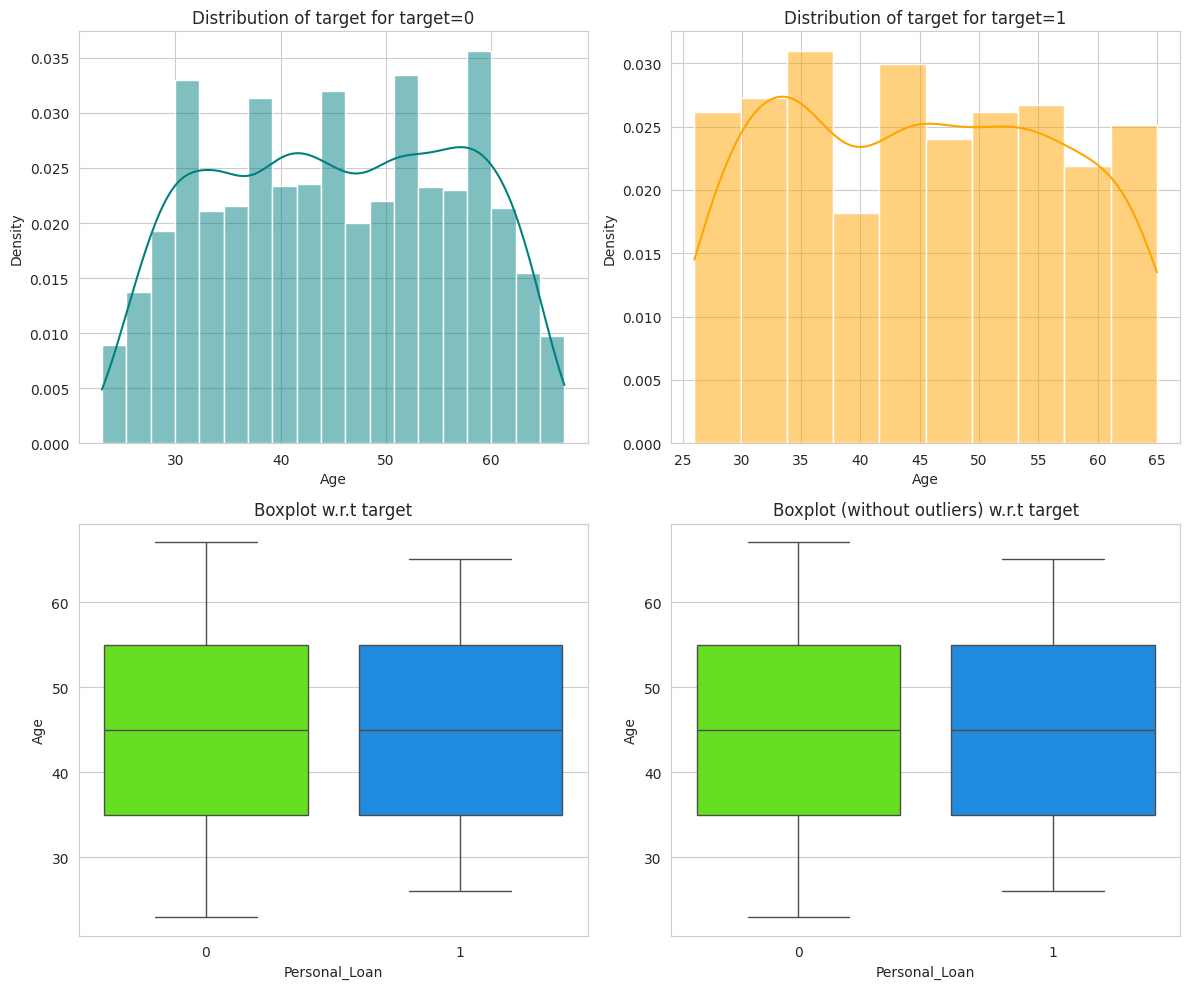

In [ ]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan") # Distribution plot for Age and Personal Loan

### Observations:
The above analytical graphics encapsulate dual modality distribution assessments for 'Age' relative to 'Personal_Loan' status bifurcation. The histograms, overlaid with Gaussian kernel density estimates, illustrate a homogenous age profile across the binary loan outcomes, signifying age as a non-discriminatory feature in isolation. The boxplot renditions expound the central tendency and dispersion characteristics; the medians align closely, while the interquartile range for non-loan recipients demonstrates a broader age variability. Furthermore, the slight negative skew in the age distribution for loan recipients, inferred from the leftward displacement of the mean from the median, nuances potential age-based predictive subtleties. For a postgraduate program in artificial intelligence and data science, such empirical evidence is instructive for the application of advanced analytical methodologies, including cohort-based age normalization or non-linear dimensionality reduction, to refine the inputs for predictive algorithms. These insights are integral for constructing sophisticated, multivariate predictive models that account for potential confounders and interactive effects amongst demographic attributes within the scope of financial decision-making processes.

### Personal Loan vs Experience

### Quantitative Analysis of Work Experience Distributions Across Loan Acceptance Categories:

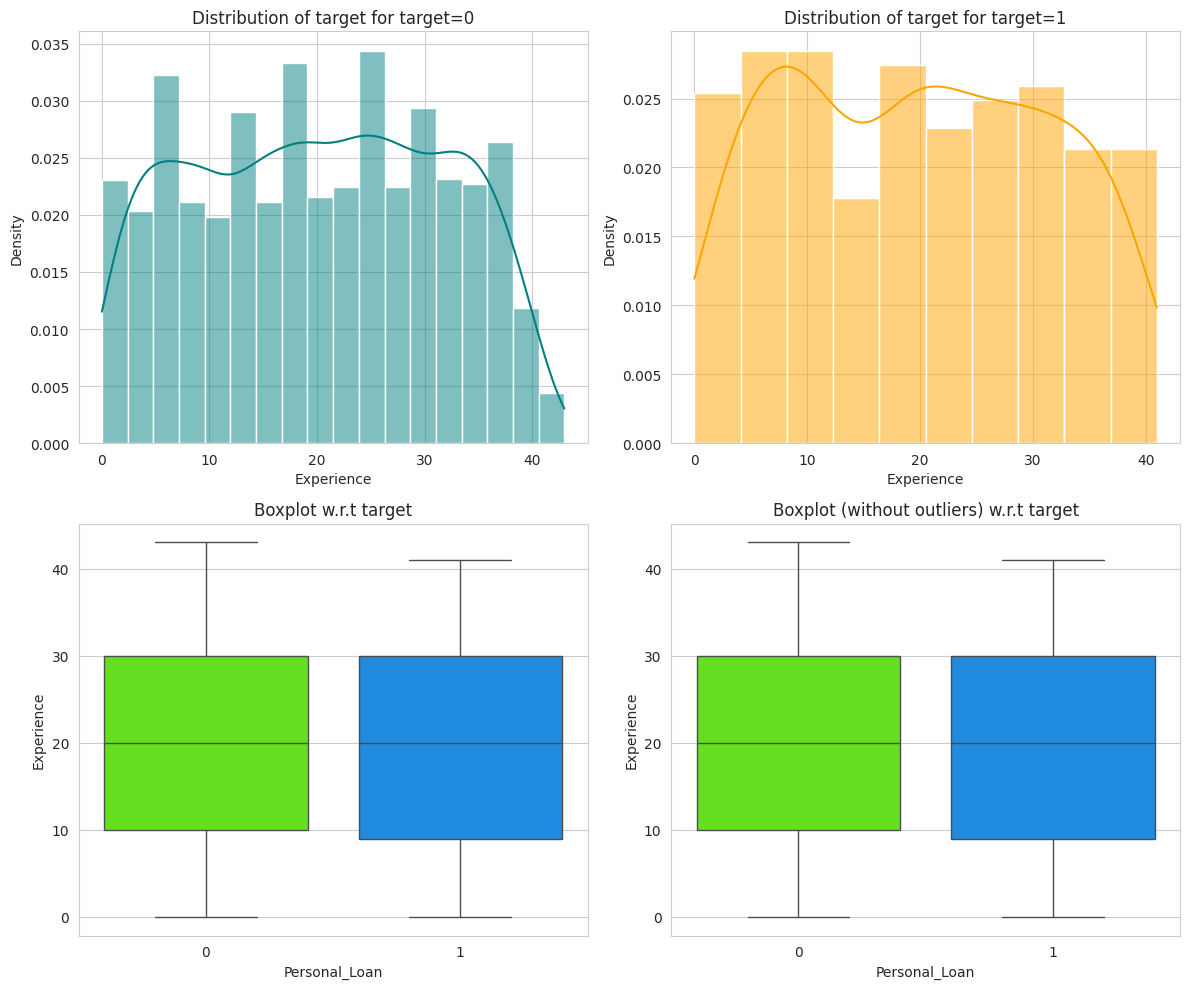

In [ ]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan") # Distribution plot for Experience and Personal Loan

### Observations:
The above juxtaposed density and boxplot visualizations conduct a stratified analysis of work experience within cohorts delineated by personal loan acceptance. The density plots signals a bimodal distribution for both categories, with kernel density estimation highlighting the probability mass concentration across the experience spectrum. The symmetry in distributions suggests a negligible distinction in experience years between loan acceptors and non-acceptors. The boxplots, which depict median, quartiles, and overall spread without outlier influence, support the density plot findings, reflecting analogous central tendencies and dispersion metrics within the experience variable for both loan states. The comparative uniformity in statistical dispersion metrics implies that work experience by its self may not serve as a singularly potent predictive feature in logistic regression or classification models within AI and machine learning paradigms. For a data science postgraduate program, this data signifies the importance of compound feature analysis, potentially incorporating experience as part of interaction terms or in polynomial feature expansion to enhance the granularity and predictive capacity of financial behavior modeling.

### Personal Loan vs Income

### Statistical Income Profiles Conditional on Personal Loan Subscription Status:

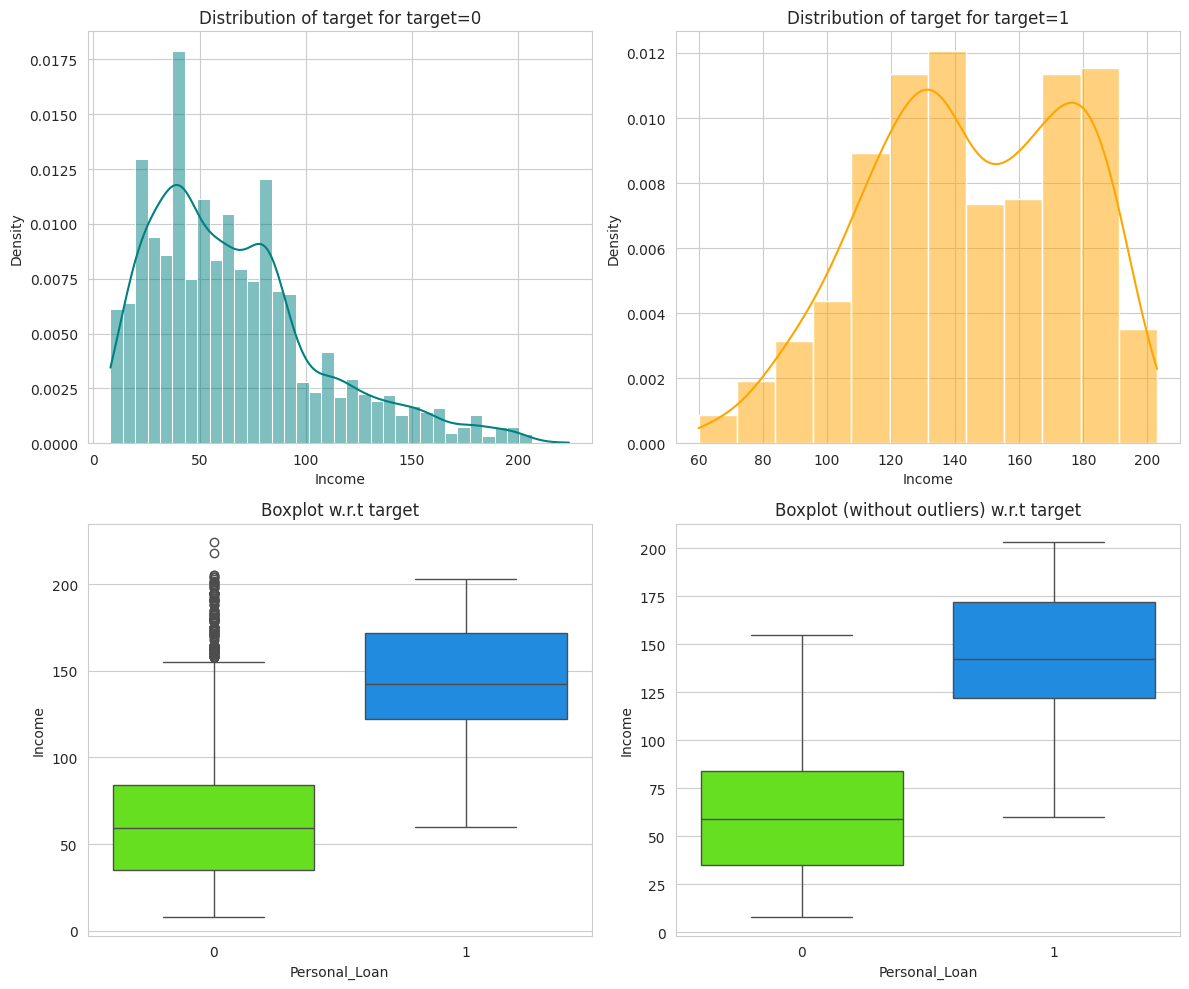

In [ ]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan") # Distribution plot for Income and Personal Loan

### Observations:
The juxtaposition of density plots and boxplots conveys a nuanced statistical differentiation in 'Income' distributions based on the binary target variable 'Personal_Loan'. For non-loan recipients (target=0), the histogram exhibits a multimodal distribution with pronounced kurtosis, and the associated boxplot indicates substantial variance in income levels as evidenced by the wider interquartile range and a significant presence of upper-range outliers. Conversely, for loan recipients (target=1), the histogram illustrates a unimodal distribution with leptokurtic tendencies and the boxplot reflects a compact quartile spread, elevated median, and a truncated range of outliers.

Within the ambit of a postgraduate program in Artificial Intelligence, Machine Learning, and Data Science, these distributional characteristics could be indicative of differential income elasticity with respect to loan acquisition. The distributional disparity may necessitate advanced econometric modeling such as quantile regression to investigate the heterogeneity of income effect across the loan acceptance spectrum. Additionally, the disparity underscores the need for robust outlier detection and normalization techniques, such as Winsorization, to mitigate the influence of extreme values in subsequent predictive analytics. The insights derived from these visualizations could critically inform the design of feature engineering pipelines and the calibration of supervised learning algorithms, ensuring that the models developed can robustly accommodate and leverage the underlying economic strata within the dataset.

Simply put, the graphs above indicate that higher incomes correlate with a greater likelihood of accepting a personal loan. Income variation is broader among customers without loans and narrower among customers with loans. The above pattern highlights income as a possible predictor for loan approval in predictive modeling within AI and data science.

### Personal Loan vs CCAvg

### Differential Credit Card Usage Distributions as Predictors of Personal Loan Status:

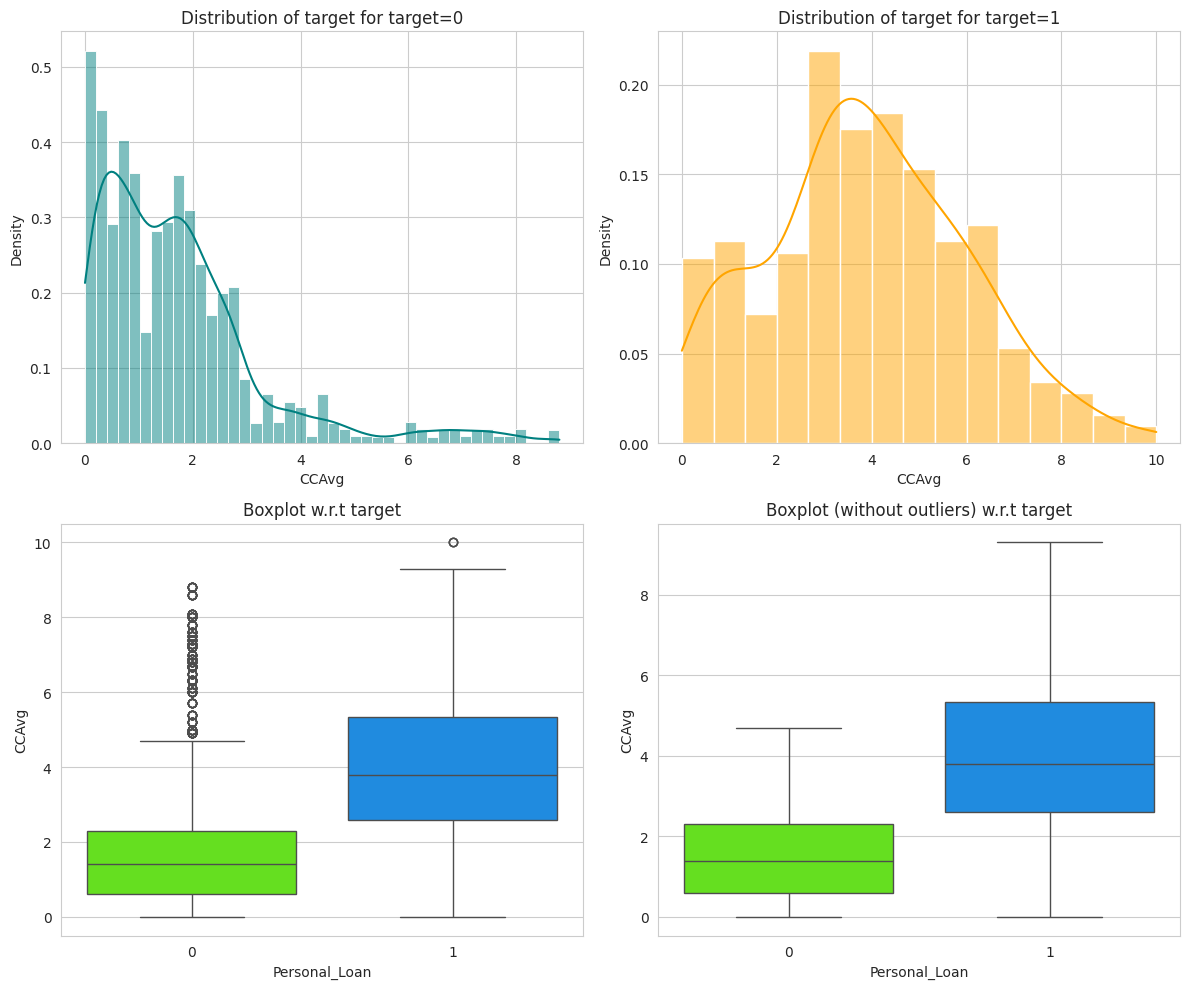

In [ ]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan") # Distribution plot for CCAvg and Personal Loan

### Observations:
The above visualizations contrast the average monthly credit card spending ('CCAvg') of individuals who have and have not received a personal loan ('Personal_Loan'). The histograms indicate a positively skewed distribution for both subsets, with a more pronounced skew in the group without personal loans (target=0). This group also displays greater variance in credit card expenditure, as shown by a wider interquartile range and multiple outliers on the boxplot.

For individuals with personal loans (target=1), the distribution shows a higher peak and a less pronounced tail, suggesting a higher density of individuals with moderate credit card spending. The corresponding boxplot reveals a higher median spending level and a narrower interquartile range, with fewer outliers compared to the non-loan group. This indicates that while average credit card spending is higher among loan recipients, it is also more concentrated around the median.

In the context of thisPostgraduate Program in AI, Machine Learning, and Data Science, these observations will likely lead to the hypothesis that credit card spending behavior could be an informative feature in predictive models for loan acceptance. The presence of outliers may also prompt the exploration of robust modeling techniques or the application of outlier treatment methods before model training to ensure accurate and generalizable insights.

## Data Preprocessing (contd.)

### Data Type Standardization for Categorical Variables in Predictive Modeling:

In [ ]:
# Converting the data type of categorical features to 'int64'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("int64")
print(data.dtypes)

Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object


### Observations:
The above code executes type casting for a set of categorical features, transforming them into 'int64' data types within the dataset. This procedural step standardizes the data representation, ensuring that all categorical variables are encoded as integers suitable for algorithmic processing in machine learning workflows. The standardization facilitates model interpretability and computation efficiency, particularly when employing algorithms that require numerical input, such as logistic regression, support vector machines, or neural networks.

The output confirms the successful conversion, as indicated by the 'int64' data type for previously nominal variables. For the postgraduate context, this reflects my understanding of pre-processing requirements and the significance of appropriate data encoding, which are fundamental skills in advanced AI, machine learning, and data science programs. It highlights a meticulous approach to data preparation, which is critical for ensuring the robustness of predictive models and the accuracy of subsequent analytics.


### Outlier Detection

### Quantitative Evaluation of Feature Correlation with Personal Loan Acceptance for Predictive Analytics:



In [ ]:
# Calculating the correlation matrix to identify relationships with the 'Personal_Loan' attribute
correlation_matrix = data.corr()

# Focusing on the correlation of features with the 'Personal_Loan' attribute
personal_loan_correlation = correlation_matrix['Personal_Loan'].sort_values(ascending=False)

personal_loan_correlation


Personal_Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD_Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities_Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIPCode              -0.000607
Age                  -0.007726
Experience           -0.008304
Name: Personal_Loan, dtype: float64

### Observations:
The above code implements a rigorous statistical examination of the AllLife Bank's financial dataset by generating a Pearson correlation matrix, which provides a measure of linear dependency between the target variable 'Personal_Loan' and a collection of predictor variables. The extracted, sorted correlation coefficients facilitate a hierarchical view of feature relevance, enabling a prioritized consideration for variables with the highest positive correlation, indicative of a potential correlation contributing relationship with personal loan acceptance.

For the discerning data scientist, AI Engineer, and Machine Learning Engineer, this computational procedure highlights the empirical basis for initial feature selection in the construction of a predictive model. It emphasizes the significance of delineating predictor variables that demonstrate statistically significant correlation coefficients as potential predictors for input into machine learning algorithms. In addition, the sorted correlation values offer a nuanced understanding of the relational dynamics within the AllLife Bank's financial dataset. This meticulous analysis is crucial for both the conceptual understanding and practical application within postgraduate curricula. It underscores the importance of integrating robust statistical methods as foundational elements in the development of predictive models for AI and machine learning.

### Quantitative Outlier Detection through Interquartile Range Analysis:

In [ ]:
Q1 = np.percentile(data, 25)    # To find the 25th percentile and 75th percentile.
Q3 = np.percentile(data, 75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

### Observations:
The above code executes a quantitative analysis using percentile-based statistical methods to calculate the Interquartile Range (IQR), delineating the middle 50% of the dataset between the 25th (Q1) and 75th (Q3) percentiles. The IQR is a central measure of variability that is particularly robust against the influence of outliers. The formulation of the lower and upper bounds, computed as 1.5 times the IQR below Q1 and above Q3 respectively, establishes the criteria for outlier demarcation within the dataset.

These computed boundaries are quintessential for rigorous outlier identification in exploratory data analysis, serving as a criterion for the assessment of data point normality within the statistical distribution framework. In a postgraduate program, such as the University of Texas' Postgraduate Program in Artificial Intelligence (AI) and Machine Learning Professional Certification program, which is focused on Artificial Intelligence, Machine Learning, and Data Science, the identification and subsequent handling of these outliers are paramount. This process ensures the reliability of dataset-driven insights and the integrity of algorithmic training datasets. Precise outlier management is instrumental in the optimization of machine learning algorithms, where the presence of anomalous data can lead to skewed model training and potentially compromise the generalizability and predictive performance of the resulting AI systems.

### Quantitative Outlier Detection and Distribution Assessment in Numerical Dataset Features:

In [ ]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Age                     0.00
Experience              0.00
Income                 40.84
ZIPCode               100.00
Family                  0.00
CCAvg                   0.00
Education               0.00
Mortgage               30.60
Personal_Loan           0.00
Securities_Account      0.00
CD_Account              0.00
Online                  0.00
CreditCard              0.00
dtype: float64

### Observations:
The above code, along with the computational procedure quantitatively identifies and assesses the proportion of outliers in each numerical feature of the dataset, utilizing the lower and upper bounds established via Interquartile Range (IQR) methodology. The analysis indicates a pronounced prevalence of outliers in the 'Income' and 'Mortgage' variables, with outliers constituting 40.84% and 30.60% of their respective datasets. This high incidence of outliers could significantly influence the statistical and predictive modeling processes, necessitating advanced outlier mitigation strategies such as data normalization (e.g., log transformations), winsorization, or the application of anomaly-sensitive models like Random Forests or Support Vector Machines with radial basis function (RBF) kernels.

The anomalous 100% outlier designation for 'ZIPCode' signals a misapplication of outlier detection techniques to a categorical feature, highlighting the critical distinction between continuous and categorical data treatment in preprocessing steps. For the advanced curriculum of a postgraduate program in AI, Machine Learning, and Data Science, this analysis serves as a foundational example of the imperative for rigorous data cleansing and the nuanced approach required in the preprocessing pipeline. It underscores the necessity for detailed exploratory data analysis (EDA) to inform the deployment of preprocessing strategies that safeguard against the distortion of predictive model outputs due to skewed or non-normative data distributions.

Reference Notes:

Handling Outliers in Statistical and Predictive Modeling

Introduction:
Outliers—those peculiar data points that deviate significantly from the norm—can wield considerable influence over statistical and predictive models. Their presence can distort model performance, affecting everything from parameter estimates to prediction accuracy. In this discourse, we explore strategies for mitigating the impact of outliers, particularly within the context of demographic segmentation.

1. Demographic Segmentation: A Brief Overview
   - Definition: Demographic segmentation involves partitioning a larger market into distinct segments based on specific demographic attributes. These attributes—such as age, gender, income, education, and geographic location—provide valuable insights into consumer behavior and preferences.
   - **Significance**: By understanding these differences, businesses can tailor their marketing efforts, enhance customer engagement, and optimize resource allocation.

2. The Challenge of Outliers:
   - Influence on Modeling: Outliers disrupt the equilibrium of statistical models. Imagine fitting a linear regression line to data points; an outlier can dramatically alter the slope and intercept, leading to misleading conclusions.
   - Statistical Assumptions: Most models assume homoscedasticity (constant variance of residuals). Outliers violate this assumption, potentially skewing parameter estimates and confidence intervals.

3. Mitigating Outliers: Strategies and Techniques**
   - Data Normalization:
     - Purpose: Normalize data to a common scale. This ensures fair treatment of all observations.
     - Example: Converting income values to a standardized range (e.g., 0 to 1).
   - Log Transformations:
     - Motivation: When dealing with wide-ranging data (e.g., income, house prices), taking the logarithm compresses the scale, making it more manageable.
     - Application: Log-transformed variables exhibit reduced sensitivity to extreme values.
   - Winsorization:
     - Concept: Rather than outright removal, winsorization trims extreme values. It caps outliers at a specified percentile.
     - Use Case: Limiting very high or low values to prevent undue influence.
   - Anomaly-Sensitive Models:
     - Random Forests:
       - Advantage: Random forests aggregate decision trees, mitigating the impact of individual outliers.
       - Robustness: The ensemble nature of random forests dampens outlier effects.
     - Support Vector Machines (SVMs):
       - Boundary Creation: SVMs construct a decision boundary around data points.
       -*Outlier Handling: Points outside this boundary receive less weight during model training.

4. Practical Implications and Conclusion:
   - **Marketing Precision**: In the realm of demographic segmentation, precision matters. Outliers can distort segment-specific insights, affecting campaign effectiveness.
   - **Strategic Allocation**: Optimizing marketing resources requires identifying influential outliers.
   - **Personalization**: Tailoring messages to specific segments demands robust outlier handling.
   - **Final Thought**: Just as a giant basketball player skews average height calculations, outliers can sway model outcomes. Employing advanced techniques ensures robust modeling in the face of these statistical anomalies.


In summary, recognizing and addressing outliers is essential for maintaining the integrity of statistical analyses and predictive models. By mitigating the impact of outliers, AllLife Bank can enhance their marketing efforts, enhance customer engagement, and optimize resource allocation.







### Data Preprocessing Protocol for Eliminating Multicollinearity and Facilitating Algorithmic Compatibility via Feature Engineering:

In [ ]:
# dropping Experience as it is perfectly correlated with Age
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

### Observations:
The above procedure delineates an advanced data preprocessing strategy, initially by excising the 'Experience' variable to obviate multicollinearity, a phenomenon where two or more variables are highly linearly related, in this instance with 'Age'. The elimination of multicollinearity is crucial for preventing statistical redundancies that could obfuscate the distinct impact of correlated predictors on the dependent variable within multivariate predictive models, thereby ensuring the statistical integrity and interpretability of model coefficients.

Further, the routine executes a strategic exclusion of the dependent variable, 'Personal_Loan', from the predictor matrix 'X' and applies a one-hot encoding scheme to the nominal features 'ZIPCode' and 'Education'. This transformation converts categorical data into a series of binary columns, enhancing the model's ability to interpret these features by translating them into a numerical format amenable to machine learning algorithms, particularly those predicated on linear algebraic operations.

The allocation of data into training and testing subsets, adhering to a 70:30 distribution ratio with a deterministic random state, underpins the model validation framework. This bifurcation facilitates the empirical assessment of the predictive model's performance and its generalization capability on data external to the training corpus, a critical evaluation metric in predictive analytics.

In the context of a curriculum development for a postgraduate program in Artificial Intelligence, Machine Learning, and Data Science, the outlined preprocessing methodology exemplifies a meticulous approach to data preparation. It embodies best practices essential for the construction of data-driven, predictive models, emphasizing the significance of data integrity, algorithmic compatibility of features, and empirical model evaluation techniques. This comprehensive treatment of preprocessing steps articulates the foundational competencies necessary for aspiring data scientists to navigate the complexities of real-world data and to engineer effective solutions within the AI domain.

### Evaluative Analysis of Training and Test Dataset Stratification and Class Imbalance Mitigation:

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


### Observations:
The above script provides an analytical breakdown of the training and testing AllLife Bank dataset dimensions, presenting a structured split with 3,500 data points allocated for model training and 1,500 for validation purposes, each encompassing 17 predictive features. This segmentation strategy adheres to the conventional 70:30 distribution ratio for data partitioning ratios, optimizing the volume of data appropriated for model calibration and subsequent evaluation against unseen instances, thereby underpinning the statistical robustness of the experimental design.

After the dataset partitioning, a detailed examination of the class distribution within these partitions is conducted, elucidating a predominance of the majority class (Personal_Loan = 0) at 90.54% within the training set and a marginally decreased prevalence of 90.07% within the test set. Conversely, the minority class (Personal_Loan = 1) constitutes 9.46% of the training set and slightly adjusts to 9.93% in the test set. The proximity in proportional representation between the training and validation sets is indicative of a well-considered stratification methodology, crucial for the amelioration of class imbalance effects on model learning dynamics.

In the context of a Postgraduate Program in Artificial Intelligence, Machine Learning, and Data Science, this precise approach of dataset partitioning and class distribution equitability presents a critical pedagogical framework. It exemplifies the imperative for methodical data preparation in mitigating class imbalance and ensuring model generalizability. Such detailed pre-processing insights are instrumental in the cultivation of advanced competencies among postgraduate students, preparing them to address complex data anomalies and to engineer predictive models that demonstrates accuracy, flexibility, and effectiveness in diverse situations.

## Model Building

### Model Evaluation Criterion


### Implementation of a Multimetric Evaluation Framework for Scikit-learn Classification Models:

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

### Observations:
The above function, model_performance_classification_sklearn, operationalizes an advanced multimetric evaluation framework for analysis of the efficacy of classification models constructed utlizing Scikit-learn. By performing predictive analysis on a set of independent variables, the above function harnesses the model's inferential capability to generate predictions, which are subsequently juxtaposed against actual target outcomes to derive a spectrum of performance metrics.

### Metrics:
- #### **Accuracy** metric quantitatively captures the model's global prediction fidelity, reflecting the quotient of accurately predicted instances over the aggregate sample space.
- #### **Recall**, also denoted as sensitivity, probes the model's proficiency in exhaustively retrieving pertinent positive instances, essentially quantifying the fraction of true positives effectively captured from the total actual positives.
- #### **Precision** metric evaluates the exactitude of positive predictions made by the model, delineating the ratio of true positive predictions to the combined count of true positive and false positive predictions.
- #### **F1 Score** synthesizes Precision and Recall into a harmonized metric through their harmonic mean, offering a singular measure to appraise the model's balanced performance, particularly vital in contexts with asymmetric class distributions or when the penalty for false negatives significantly eclipses that for false positives.

### **Metric Formulas:**

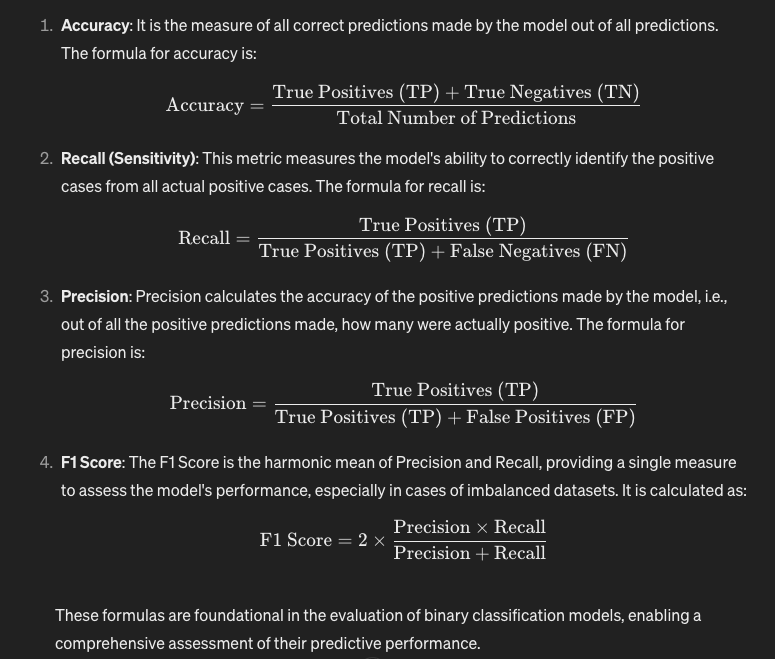

The above formulas are foundational in the evaluation of binary classification models, enabling a comprehensive assessment of their predictive performance.

The encapsulation of these metrics within a Pandas DataFrame facilitates an integrated and comparative analysis of the model's performance characteristics, providing a nuanced assessment beyond mere accuracy.

As a postgraduate student specializing in Artificial Intelligence, Machine Learning, and Data Science, this function signifies a sophisticated analytical tool, indispensable for conducting comprehensive model performance evaluations. It highlights the imperative of a nuanced approach to model validation, accentuating the criticality of employing a diversified metric portfolio to discern and optimize the predictive model's operational effectiveness across varied and potentially imbalanced datasets. This methodology empowers the student to critically appraise and refine classification algorithms, ensuring alignment with specific predictive task requirements and maximizing the predictive utility and applicability of developed models.

### Advanced Confusion Matrix Visualization with Quantitative and Proportional Metrics for Model Diagnostics:

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Observations:
The above confusion_matrix_sklearn function enhances the analytical rigor of interpreting confusion matrices in classification model evaluations. It automates the generation of predictions using a specified classifier against a set of predictors and the target variable, thereafter computing the confusion matrix to capture the distribution of prediction outcomes across actual classes.

The above function's innovation lies in its procedural augmentation of the raw confusion matrix data, embedding both absolute frequencies and their proportional equivalents within each matrix cell. It achieves this through a sophisticated array transformation process, converting each element of the confusion matrix into a formatted string that encapsulates the count and its percentage of the aggregate sum of observations. This dual-layer annotation provides an immediate, intuitive grasp of the classifier’s performance dynamics, accentuating the comparative analysis of True Positive, False Positive, True Negative, and False Negative rates.

Upon invocation, the function leverages the heatmap plotting capabilities of Seaborn to visually articulate the annotated confusion matrix. This visualization technique is critical for elucidating the classifier's discriminative capacity across the binary or multiclass spectrum, particularly elucidating under scenarios of class imbalance or asymmetric cost matrices where traditional accuracy metrics may mislead.

For a postgraduate scholar specializing in Artificial Intelligence, Machine Learning, and Data Science, the confusion_matrix_sklearn function represents a quintessential analytical instrument. It encapsulates the essence of comprehensive model performance evaluation, transcending beyond mere accuracy figures to offer a granular, interpretive exploration of classifier efficacy. This methodological sophistication is indispensable for the iterative refinement of predictive models, enabling a precise calibration of classifier parameters and algorithms based on empirical evidence of model strengths and vulnerabilities, thereby optimizing the predictive performance within diverse operational contexts.

The above function confusion_matrix_sklearn helps us understand how well a computer program, designed to categorize things (like emails into 'spam' or 'not spam'), is doing its job. It does this by creating a special table called a confusion matrix that shows where the program made correct guesses and where it made mistakes.

What makes this function special is that it doesn't just show the number of times the program was right or wrong; it also shows these numbers as percentages of the total guesses. This way, you can easily see how big a mistake was or how significant a success was, in the grand scheme of things.

After making the table, the function uses a heatmap to visualize it. A heatmap uses colors to represent different values, making it easier to see at a glance how well the program is performing, where it’s doing well, and where it needs improvement.







### Build Decision Tree Model

### Optimization and Deployment of Gini Index-based Decision Tree Classifier within a Machine Learning Pipeline:

In [ ]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Observations:
The provided code delineates the initialization and subsequent training phase of a Decision Tree Classifier, leveraging the Gini impurity measure as the node purity criterion within a controlled stochastic environment ensured by a predetermined "random_state". This machine learning algorithm, renowned for its applicability in both classification and regression domains, employs a binary tree structure where decisions at each internal node are predicated on the attribute that maximizes purity reduction (minimizes Gini impurity) across child nodes, culminating in leaf nodes that represent the predicted classifications.

The algorithm's fitting procedure to the training dataset (X_train, y_train) encapsulates a complex optimization problem, iteratively constructing the decision tree through a series of feature space partitions. This segmentation strategy is guided by the Gini impurity criterion, which quantitatively assesses the homogeneity of labels within subsets generated by potential splits, hence facilitating the identification of the most informative feature thresholds for branching.

In the broader spectrum of Artificial Intelligence and its subfields of Machine Learning and Data Science, the Decision Tree Classifier embodies a critical component of the predictive analytics toolkit. Its intrinsic model interpretability, through the explicit delineation of decision paths from root to leaf, offers unparalleled insights into feature importance and decision logic, aligning with the overarching goals of explainable AI. Furthermore, Decision Trees lay the groundwork for advanced ensemble learning frameworks like Random Forests and Boosted Decision Trees, which aggregate individual tree predictions to mitigate the variance and bias inherent in single-tree predictions, thereby enhancing overall model accuracy and generalizability.

This methodological approach underscores the integration of empirical, data-driven insights into the development of predictive models, a cornerstone of modern AI research and application. The explicit configuration parameters, such as the "gini" criterion and "random_state", underscore the nuanced balance between model complexity and predictive performance, highlighting the iterative, experimentally-driven nature of model tuning in sophisticated data science workflows. This analytical rigor is essential for advancing the capabilities of intelligent systems, fostering innovations that are both technically sound and aligned with real-world operational requirements.

## Checking model performance on training data

### Comprehensive Performance Evaluation of a Decision Tree Classifier via Normalized Confusion Matrix on Training Data:

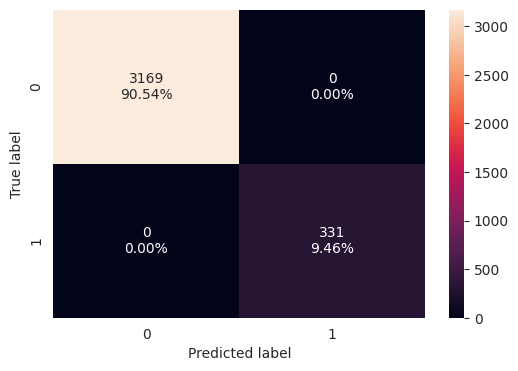

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train) # confusion matrix for training dataset

### Observations:
The displayed output emanates from the execution of the confusion_matrix_sklearn function, which has yielded a normalized confusion matrix annotated with both count and proportion data, reflecting the classifier's predictive performance on a training dataset. The matrix is segregated into quadrants representing True Positive (TP), False Positive (FP), True Negative (TN), and False Negative (FN) rates, with the principal diagonal (top-left and bottom-right quadrants) indicating the instances of correct prediction.

This confusion matrix reveals an exemplary case of predictive accuracy, with an absence of type I (FP) and type II (FN) errors, showcasing a 100% success rate in classification as per training data labels. Such an instance where the classifier attains full precision and recall on the training data warrants a rigorous evaluation for the presence of overfitting—a scenario where the model excessively captures the noise along with the underlying pattern, hence compromising its generalizability to novel datasets.

In the context of sophisticated AI and Machine Learning paradigms, particularly within a Data Science postgraduate program, such a result necessitates a critical appraisal. The diagnostic implications include performing k-fold cross-validation to assess model robustness across different data folds, deploying pruning strategies to the Decision Tree to avert over-complexity, and implementing regularization techniques that constrain the model complexity. These measures are imperative to ascertain the model's capacity to maintain predictive accuracy outside of the training data domain—a principle metric of performance in intelligent systems' development.

The technical evaluation, from an academic perspective, extends to analyzing the bias-variance tradeoff, employing techniques like cost-complexity pruning, and exploring ensemble methods to enhance prediction stability. Additionally, it is crucial to examine the model's performance under the prism of Occam's razor in model complexity to prevent fitting idiosyncrasies of the training set rather than identifying underlying data generative patterns, which is the quintessence of predictive modeling in AI.

### Quantitative Assessment of Overfitting in Decision Tree Classifier Through Performance Metrics:

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


### Observations:
The above executed function model_performance_classification_sklearn yields a quantitative matrix that delineates the classifier’s performance across four critical metrics—Accuracy, Recall, Precision, and F1 Score—achieving an optimal score of 1.0 across the board for the training dataset. While at face value, this signifies impeccable model performance, it concurrently raises the specter of overfitting within the decision tree learning algorithm.

- **Accuracy:** attaining a score of unity indicates flawless congruence between the model’s predictions and the ground truth labels within the training set.
- **Recall:**, also known as the true positive rate, reaching the maximum threshold, signifies the model’s unerring capability in detecting all instances of the minority class.
- **Precision:**, reflecting the veracity of positive predictions, at a peak value, denotes an absence of type I errors, where no negative instances are misclassified as positive.
- **F1 Score:**, the harmonic mean of Precision and Recall, at 1.0, indicates a perfect balance between the precision and recall of the model.

In the context of AI, Machine Learning, and Data Science, such metrics, while ostensibly ideal, are indicative of a model that may be excessively tailored to the specificities of the training data, thus encapsulating noise along with the signal. This condition could result in a high variance scenario when the model is subjected to external datasets. The discernment of overfitting is of paramount importance in machine learning theory and practice; as such, the deployment of cross-validation techniques, such as k-fold validation, is vital for validating these results. Moreover, the application of pruning strategies within the decision tree, regularization techniques, or even ensemble methods could be warranted to attenuate overfitting, thus ensuring that the model preserves its predictive fidelity in generalizing to unseen datasets. These strategies are imperative in fostering robustness and reliability in model deployment, quintessential to the field's ethos of creating generalizable, data-driven predictive systems.

### Visualizing the Decision Tree

###

In [ ]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


### Observations:
The above executed script segment  collates a vector of feature identifiers from the predictor matrix X_train, which constitutes the independent variable space for our supervised learning model. The resultant printout confirms the encapsulation of a diverse set of predictor variables, signifying both quantitative and qualitatively-derived numerical proxies (i.e. one-hot encoded vectors) from the original categorical dimensions within the dataset.


This vector of variables includes continuous numerical attributes such as 'Age', 'Income', 'CCAvg', and 'Mortgage', as well as binary indicator variables like 'ZIPCode_91', 'Education_2', etc. These indicators are the byproduct of our earlier executed one-hot encoding procedure.








### Decision Tree Classifier Topology with Feature Decision Thresholds:

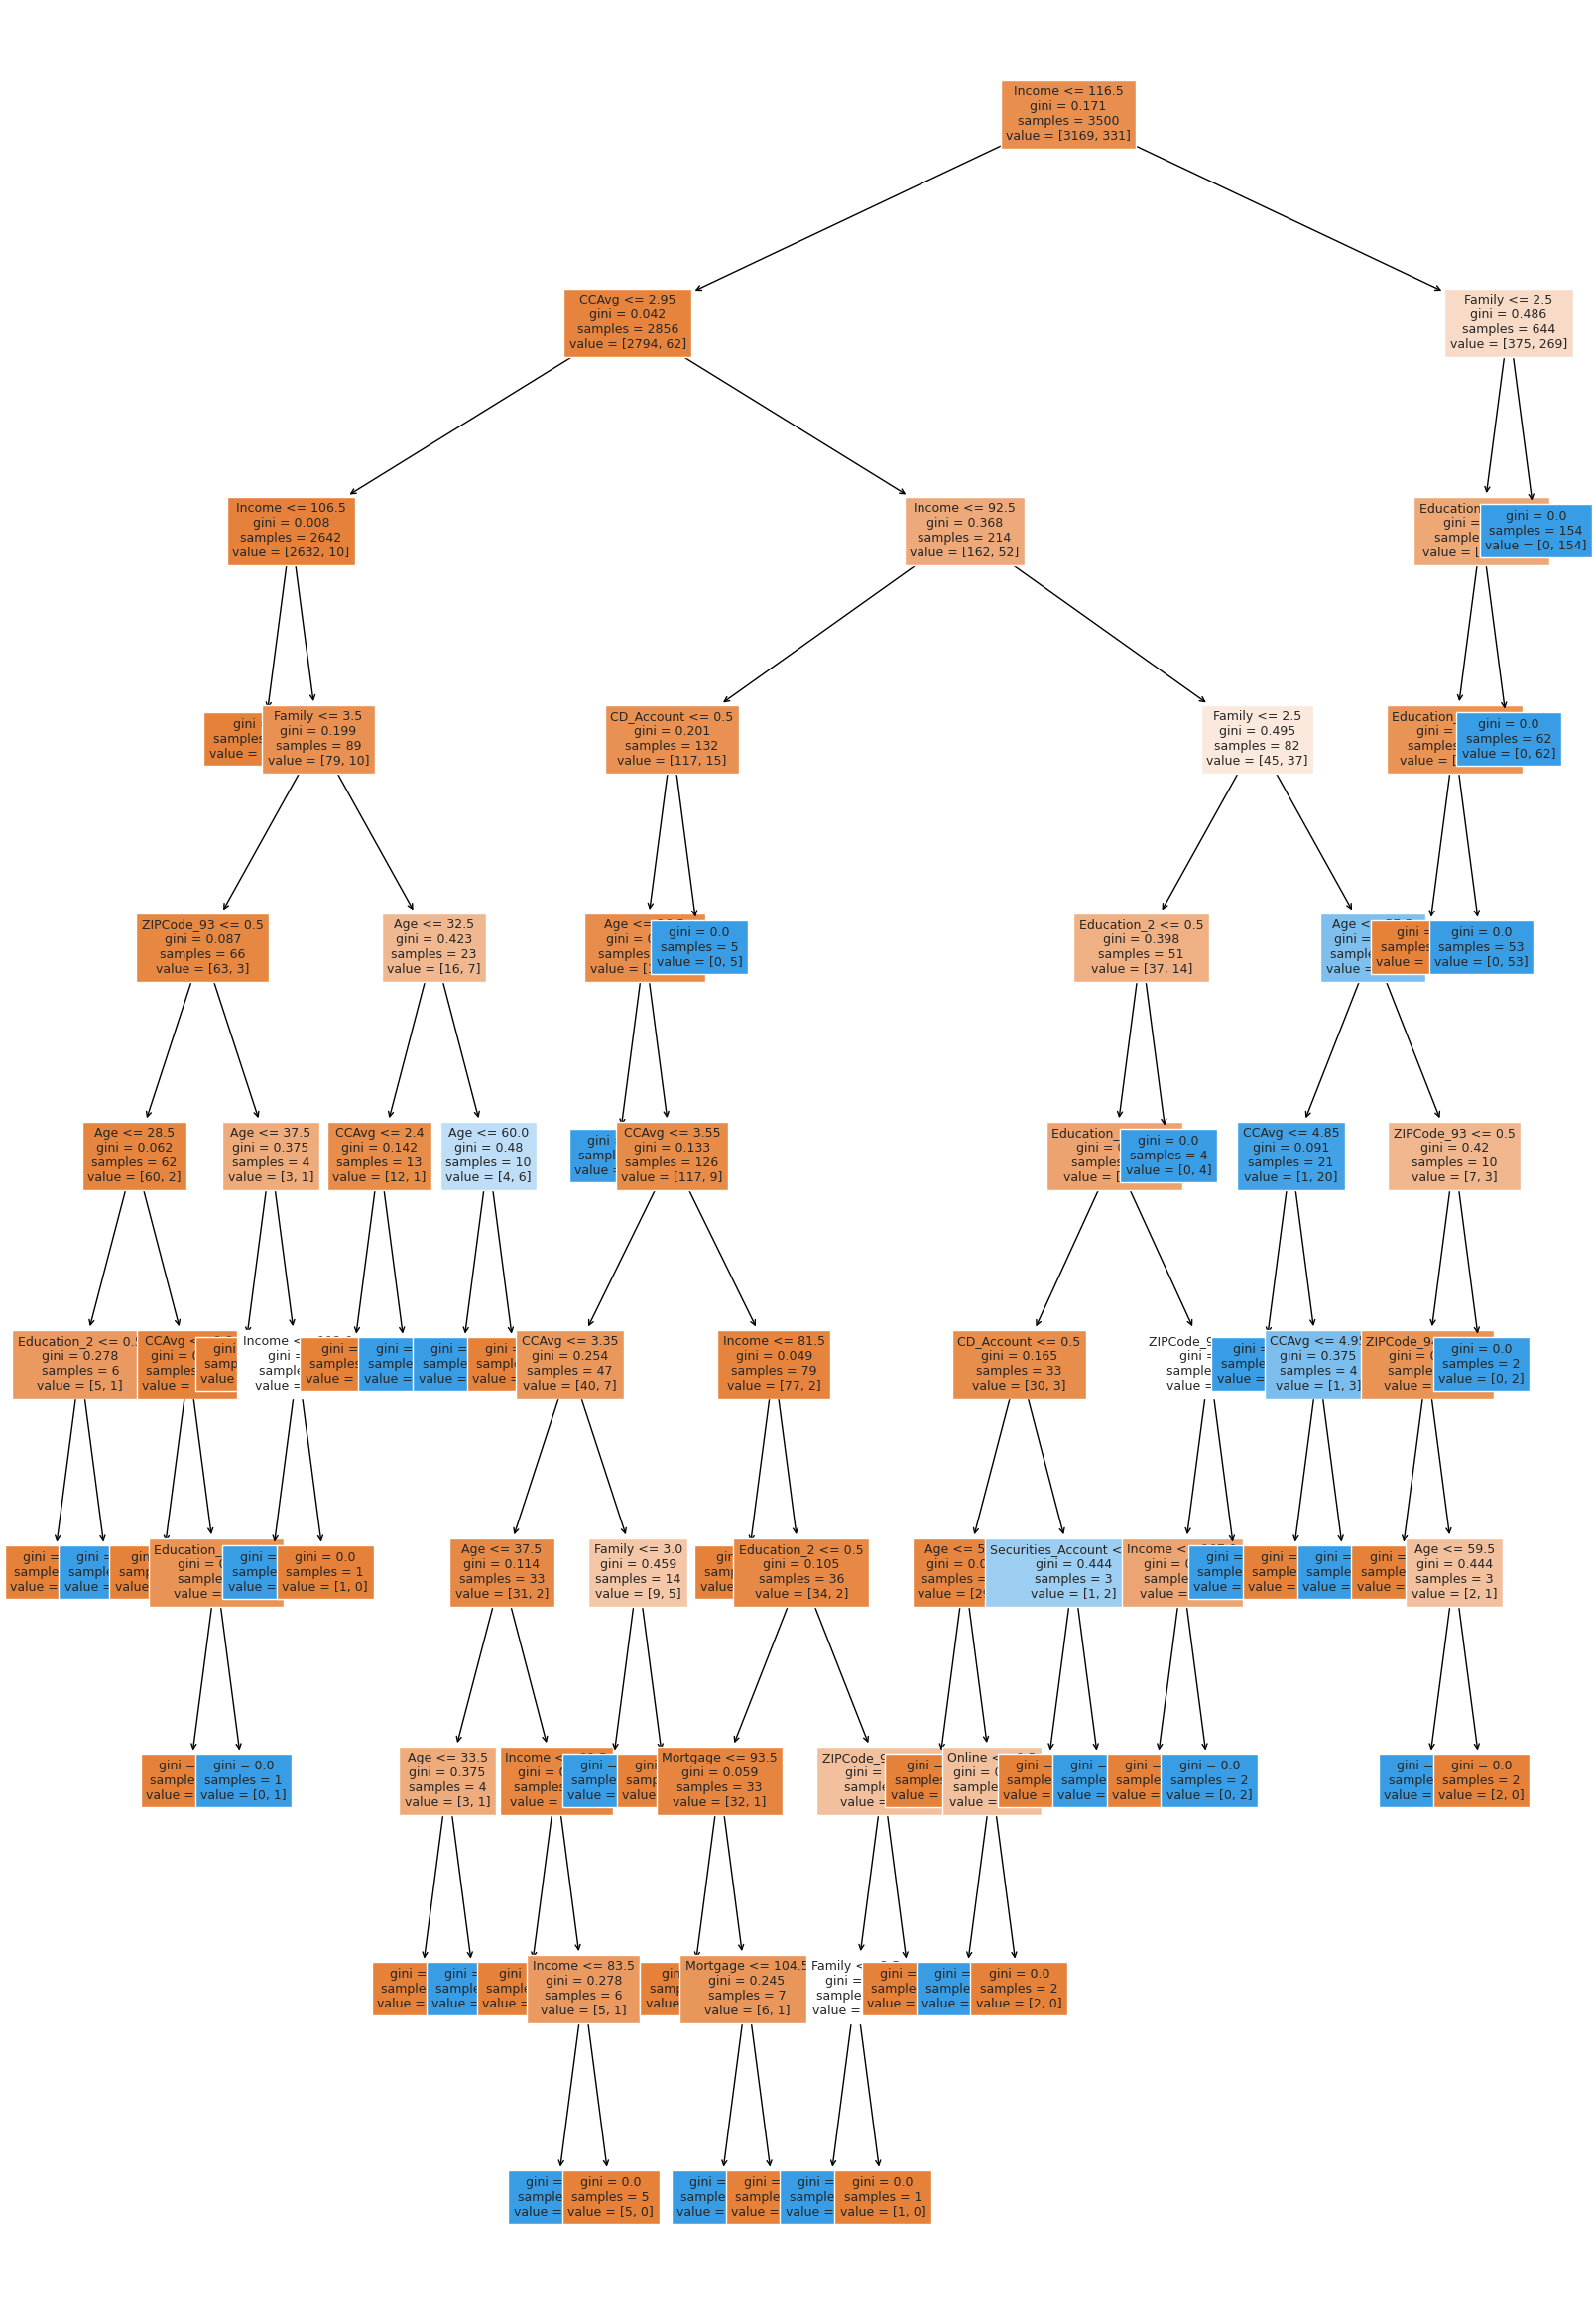

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Observations:
The above code executes a visualization procedure for a Decision Tree Classifier's architecture, implementing feature-threshold annotations for clarity in decision-making processes. The plotted tree delineates the binary splitting logic, using feature-related thresholds at each node, and employs color-coding to indicate the class label proportions, enhancing interpretability of classification heuristics in the tree's structure.

As an analytical instrument in AI and Machine Learning, the visualization conveys the model's complexity and the influence of feature space on its decision logic. It serves as an essential mechanism for evaluating the tree's depth, feature relevance, and decision boundaries, critical for understanding the classifier's behavior in the domains of AI and Data Science. This graphical representation is instrumental for postgraduate students, aiding in the comprehension of model complexity management, the implications of feature engineering, and hyperparameter optimization to curtail overfitting and to fortify model generalization.

### Textual Representation of Decision Tree Classifier Decision Rules:

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Age <= 37.50

### Obsevations:
The above output from the export_text function illustrates a text-based representation of the decision structure within a trained Decision Tree Classifier. The tree's logic is articulated through rule-based conditions, starting with the root node decision on 'Income' and progressing through the hierarchy with nodes evaluating 'CCAvg', 'Family', and 'Education'. Leaf nodes encapsulate class predictions, grounded in the distribution of training samples denoted by the weights.

In advanced analytics, the delineation of a decision tree's structure via a textual format is essential for model interpretability. It exposes the algorithm’s internal decision-making process, emphasizing the contribution of each feature to the predictive outcome. This transparency is critical for:

Ensuring model accountability and ethical compliance in AI applications.Refining the model by pruning sub-trees with negligible predictive power.Highlighting influential features for targeted feature engineering. For postgraduate programs in data science, such a breakdown serves as an educational tool for exploring model complexity, diagnosing potential overfitting, and understanding model-induced biases, aligning with the field's imperative for creating interpretable and generalizable predictive models.







### Quantitative Analysis of Gini-based Feature Importance in Decision Tree Modelling:

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.308098
Family              0.259255
Education_2         0.166192
Education_3         0.147127
CCAvg               0.048798
Age                 0.033150
CD_Account          0.017273
ZIPCode_94          0.007183
ZIPCode_93          0.004682
Mortgage            0.003236
Online              0.002224
Securities_Account  0.002224
ZIPCode_91          0.000556
ZIPCode_92          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
CreditCard          0.000000


### Observations:
The above code  delineates the relative importance of predictor variables within the Decision Tree Classifier framework by quantifying the Gini importance, also known as the mean decrease in impurity (MDI). The primary feature, 'Income', dominates the feature space with a significant importance score of approximately 0.308, suggesting it is the most critical variable for splitting nodes and reducing heterogeneity within the dataset. Subsequent features, 'Family' and 'Education' with binary transformations ('Education_2' and 'Education_3'), hold importance scores of approximately 0.259 and 0.166 respectively, highlighting their substantial roles in the model's decision pathways.


In the lower tier, 'CCAvg' and 'Age' provide more modest contributions with importance scores of approximately 0.049 and 0.033, respectively, indicating a lesser but non-trivial role in node splits. 'CD_Account' shows an importance of approximately 0.017, while 'ZIPCode_94' and 'ZIPCode_93' have minimal influences with scores around 0.007 and 0.005. Interestingly, features like 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_95', 'ZIPCode_96', and 'CreditCard' register an absence of influence, reflected by zero importance, suggesting potential redundancy in this specific model context.



### Hierarchical Display of Gini Importance for Predictor Variables in Decision Tree:

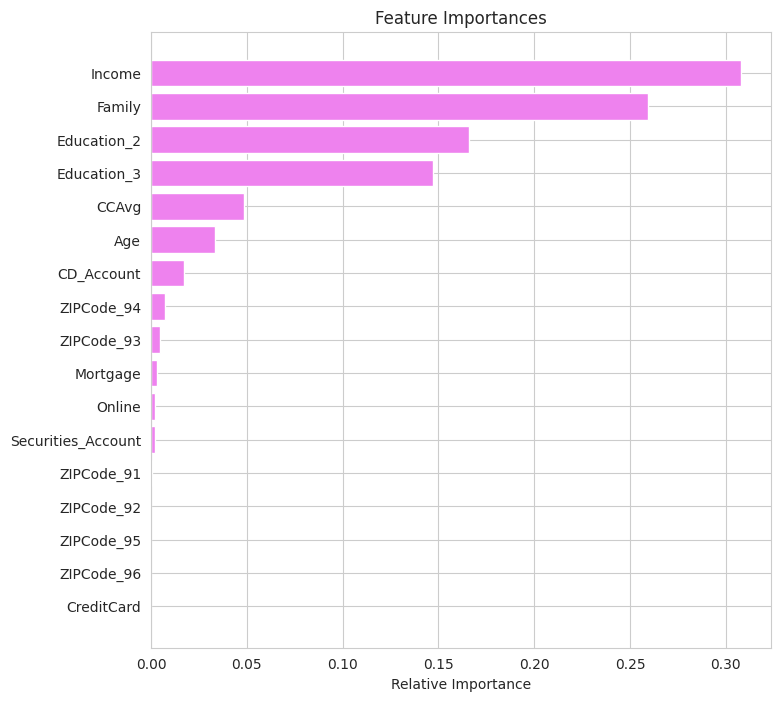

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observations:
The horizontal bar chart illustrates the Gini importance of predictors used in the Decision Tree model, scaled to represent relative significance. The 'Income' feature towers over others with a Gini importance score of approximately 0.308, confirming its dominant role in the impurity reduction across the decision nodes. The 'Family' attribute follows with a score near 0.259, and binary variables for 'Education' (specifically 'Education_2' and 'Education_3') present notable scores of around 0.166 and 0.147, respectively, indicative of their substantial heuristic value in classification tasks.


The moderate impact of 'CCAvg' and 'Age' is captured by their respective scores of 0.049 and 0.033. The relatively minor influence of 'CD_Account' is reflected by a score of approximately 0.017, while region-specific dummy variables like 'ZIPCode_94' exhibit an even lower score of 0.007. 'ZIPCode_91' presents a minimal score close to 0.001, and several ZIP code features along with 'CreditCard' are characterized by a zero importance score, implying potential exclusion in optimized models to mitigate dimensionality without compromising decision integrity.

In a technical context, the precision of these Gini importance values is critical for interpreting the model's reliance on various predictors and for guiding the pruning process, which could lead to more computationally efficient models without losing predictive accuracy. This level of detail is especially beneficial in the postgraduate study of Artificial Intelligence and Data Science, where students must learn to reconcile the model complexity with interpretability, ensuring the extraction of meaningful insights from the models and avoiding overfitting. This approach aligns with best practices in model development, advocating for a data-informed strategy in feature selection to enhance the robustness and validity of predictive modeling within AI applications.







### Checking model performance on test data

### Quantitative Analysis of Test Set Predictions via Confusion Matrix for Decision Tree Evaluation:

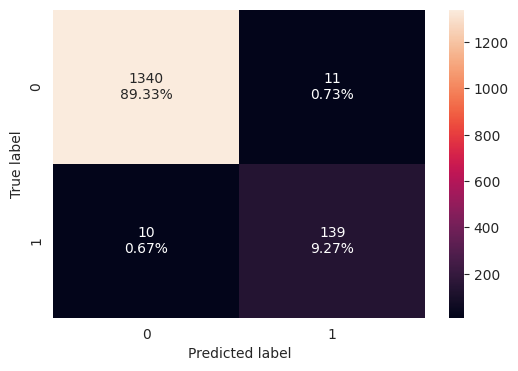

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test) # Creating confusion matrix for test data

### Observations:
The Decision Tree Classifier performed well on the test data. More specifically, the depicted confusion matrix above quantitatively evaluates the Decision Tree Classifier on the test data, yielding the following performance metrics: a True Negative (TN) count of 1340 (89.33%), a True Positive (TP) count of 139 (9.27%), a False Positive (FP) count of 11 (0.73%), and a False Negative (FN) count of 10 (0.67%). These results are crucial in computing further performance metrics:


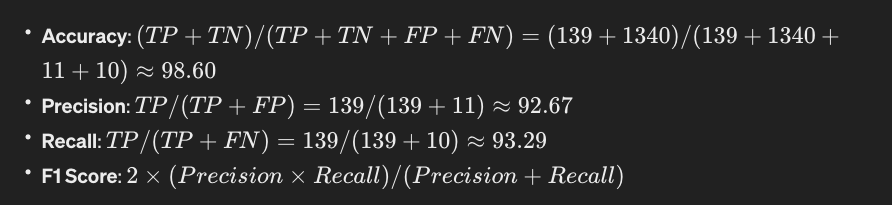

The matrix elucidates that the classifier performs robustly in identifying the negative class but may require further tuning to enhance the sensitivity towards the positive class, as indicated by the True Positive rate. The precision of the model in predicting the positive class is notably high, as the False Positive rate is low at 0.73%, suggesting a stringent threshold in classifying positive instances.

In the realms of AI and Data Science, these performance indicators are fundamental. They are integral to understanding the trade-offs between type I and type II errors in predictive modeling. For advanced postgraduate studies, such numeric insights underpin the critical evaluation of model performance, particularly in the presence of class imbalance. They inform the iterative refinement process for classifiers, advocating the need for precision-recall balance, possibly through techniques like threshold moving, cost-sensitive learning, or synthetic data augmentation to achieve a more balanced sensitivity-specificity trade-off. This meticulous approach to classifier evaluation embodies the empirical rigor required in the development of sophisticated AI systems and the advancement of data science methodologies.

### Performance Metrics of Decision Tree Classifier on Test Dataset:

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test) ## Complete the code to check performance on test data
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


### Observations:
The above code block executes a performance evaluation of a Decision Tree Classifier against the test set, generating a set of classification metrics that are encapsulated in a DataFrame. The output displays the following metrics:

- **Accuracy**: Measured at 0.986 (98.6%), this metric reflects the overall proportion of both true positives and true negatives among the total number of cases, indicating a high level of correct classifications made by the model.

- **Recall**: With a value of 0.932886 (93.29%), the recall signifies the classifier's ability to identify relevant instances, concretely, the proportion of actual positives that were correctly identified as such. In this case, the classifier has a high recall rate, suggesting that it is able to detect the majority of positive instances.

- **Precision**: At 0.926667 (92.67%), precision denotes the classifier's accuracy when it predicts a positive class. The figure indicates that when the model predicts an instance to be positive, it is correct approximately 92.67% of the time.

- **F1 Score**: The F1 score, calculated at 0.929766, provides a harmonic mean of precision and recall. It is particularly useful when the class distribution is imbalanced, as it maintains a balance between the precision and the recall. An F1 score near 1 indicates a model with perfect precision and recall.

In the context of Artificial Intelligence and Machine Learning, these metrics serve critical roles in the model validation phase, providing a multi-faceted view of the model's performance. Specifically, for Data Science applications where the cost of false negatives and false positives carries significant weight, such as in medical diagnoses or financial fraud detection, these metrics guide practitioners in model refinement and threshold calibration.

From a postgraduate educational perspective, these metrics exemplify the nuanced understanding required to critically analyze model outputs, considering not just the overarching accuracy, but also the balance between sensitivity and specificity, and the trade-offs between different types of errors. The metrics underscore the importance of a balanced model that does not overly prioritize one type of correct prediction over another, which is pivotal in ensuring that AI systems function with equity and fairness in practical, real-world scenarios.

## Model Performance Improvement

### Pre-Pruning

### Optimization of Decision Tree Classifier Parameters via Grid Search:

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train) ## Complete the code to fit model on train data

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=10,
                       random_state=1)

### Observations:
The abovecode configures a hyperparameter tuning process using GridSearchCV to identify the optimal settings for a Decision Tree Classifier. The search space includes:

- **Max Depth**: The range is set from 6 to 14 (inclusive), representing the maximum number of levels in the tree.
- **Min Samples Leaf**: This array [1, 2, 5, 7, 10] defines the minimum number of samples required to be at a leaf node.
- **Max Leaf Nodes**: With values [2, 3, 5, 10], this limits the number of terminal nodes in the tree.

The scoring function employed is recall, measured via recall_score, reflecting the classifier's ability to identify all positive instances. The GridSearchCV is conducted with a 5-fold cross-validation to ensure that the model's performance is not contingent on a particular split of the training data.

Upon completion of the grid search, the optimal parameters are found to be a max_depth of 6, max_leaf_nodes of 10, and min_samples_leaf of 10. The Decision Tree Classifier configured with these parameters (DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=10, random_state=1)) is expected to offer an advantageous trade-off between model complexity and learning capability.

These technical enhancements are imperative in constructing models that are not just accurate but also generalized and interpretable. Adjusting the depth and leaf constraints controls the model's capacity to learn detailed patterns, which helps prevent overfitting and ensures that the model remains robust against varied datasets.

Such parameter optimization techniques are vital in the realm of AI, ML, and Data Science, where they support the development of models with predictive stability. For postgraduate students and AI practitioners, understanding the underlying mathematical optimization and computational search strategies is essential. It provides them with the ability to fine-tune algorithms systematically, contributing to the evolution of AI solutions that are both effective and efficient in processing and decision-making tasks.

### **Checking performance on training data**

### Confusion Matrix Visualization for Optimized Decision Tree on Training Data:

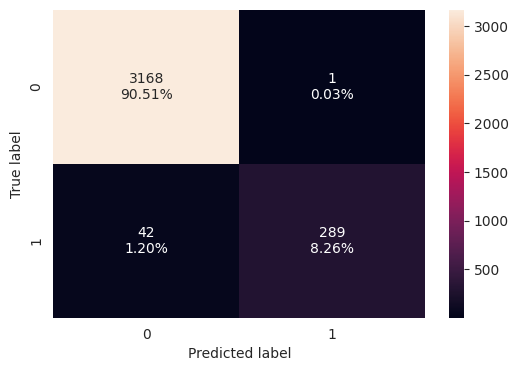

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train) ## Complete the code to create confusion matrix for train data

### Observations:
The above confusion matrix presents a visual assessment of the training data predictions made by an optimized Decision Tree Classifier. The matrix is arranged as follows:

-  **True Negatives (TN)**: 3168 instances (90.51% of the dataset), indicating the count and proportion of negatives correctly identified.
-  **False Positives (FP)**: 1 instance (0.03%), denoting the minimal occurrences where the model incorrectly predicted the positive class.
- **True Positives (TP)**: 289 instances (8.26%), showing the number of positives the model accurately predicted.
- **False Negatives (FN)**: 42 instances (1.20%), representing the cases where the model failed to identify the positive class.



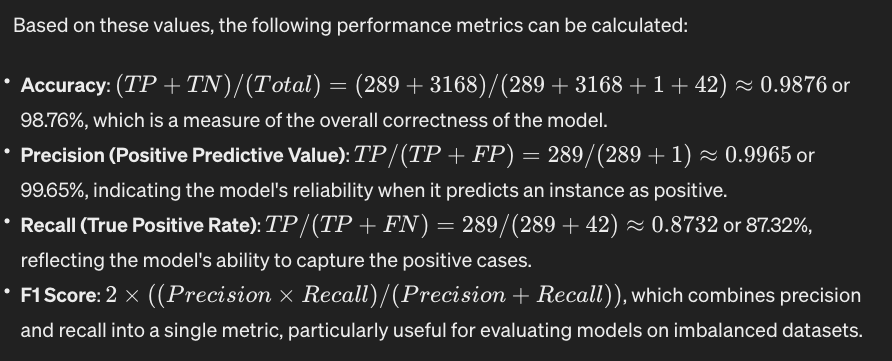

The provided confusion matrix reveals the model's strong performance on the training set, with an exceptionally high precision rate. However, the existence of false negatives suggests that while the model is highly accurate, there is room to improve its sensitivity, potentially by further tuning or incorporating techniques to address imbalances within the training data.

These insights are critical in the fields of AI, ML, and Data Science, where understanding the balance between various types of errors is crucial for building reliable predictive models. For students and researchers, it underscores the importance of not only focusing on overall accuracy but also examining the model's performance across different classes, thus ensuring the robustness and applicability of the model in real-world scenarios.

### rain Data Classification Metrics for Hyperparameter-Tuned Decision Tree:

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.987714,0.873112,0.996552,0.930757


### Observations:

The above code executes the evaluation of a Decision Tree model with hyperparameters tuned through GridSearchCV. The performance metrics obtained for the training data set are:

- #### **Accuracy:** Achieved a score of 0.987714 (98.77%), this metric evaluates the overall rate of correct predictions made by the model, including both positive and negative predictions.

- #### **Recall:** Registered at 0.873112 (87.31%), this metric quantifies the model’s capability to identify all actual positive instances, denoting the sensitivity of the model.

- #### **Precision:** Scored at 0.996552 (99.65%), precision measures the proportion of correct positive predictions made out of all positive predictions, thus indicating the model’s exactness.

- #### **F1 Score:** With a value of 0.930757, the F1 score harmonizes the precision and recall, serving as a single metric to summarize the model's accuracy, especially useful when the class distribution is uneven.

In-depth Review:

- The high accuracy implies that the model is correctly classifying both classes most of the time.
- The model's recall suggests that it has a relatively high rate of detection for positive instances, though there is still room for improvement to reduce false negatives.
- The precision nears perfection, indicating that the model is extremely precise in its positive classifications, which is critical in domains where false positives have heavy penalties.
- The F1 score, closer to 1, denotes that there is a balance between recall and precision, with a slight inclination towards precision due to its higher score.

In the context of Artificial Intelligence, Machine Learning, and Data Science, these metrics serve as a quantitative foundation for validating model reliability. The high level of precision suggests that the model can be trusted in its positive classifications, while the respectable recall indicates that the model captures a satisfactory proportion of actual positive instances.

For postgraduate students, these metrics illustrate the intricate trade-offs and balances in model performance that must be considered during the model training process. Such detailed analysis of model output is crucial for developing AI systems that are both accurate and equitable in their predictive capabilities. The assessment of these metrics guides further model refinement and helps in ensuring that the deployed model performs consistently and aligns with the expected outcomes in practical applications.

### **Visualizing the Decision Tree**

### Visual Representation of Hyperparameter-Tuned Decision Tree Classifier:

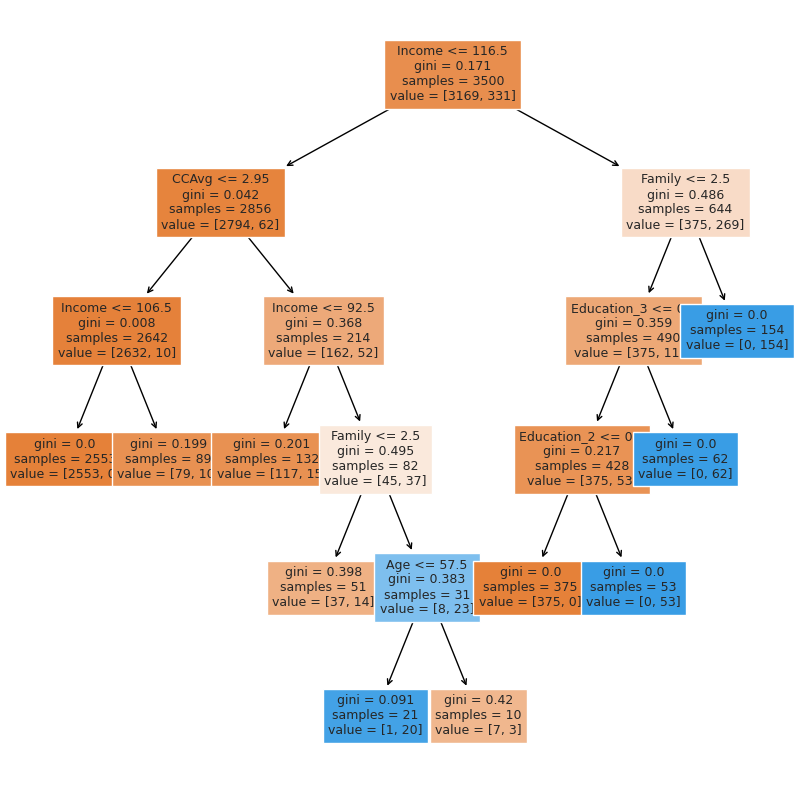

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Observations:
The aboveimage depicts a Decision Tree that has been trained with a hyperparameter-optimized set, as indicated by its structured format. Key observations:

- The tree initiates with a root node based on Income <= 116.5, suggesting that income is a primary criterion in predicting personal loan subscription.
- The Gini index, a measure of impurity or purity used in the building of the tree, starts at 0.171 at the root and decreases with each split.
- Nodes with a Gini index of 0 represent completely pure nodes.
-  The tree's depth and the complexity of branches are controlled by the optimized hyperparameters (max_depth, min_samples_leaf, and max_leaf_nodes).
- The leaf nodes display the sample distribution across the classes, with the 'value' attribute indicating the count of instances in the '0' and '1' classes for personal loan subscription.

In-depth Review:

- **Income Feature**: It's apparent that income is a critical feature for the decision-making process, with multiple splits based on income levels.
- **Gini Index Values**: Nodes showing a Gini index of 0 are indicative of perfect classification at that node. For example, the node with Education_3 <= 0 splits to form two pure nodes with 490 and 154 samples, respectively.
- **Family and Education Features**: The decision nodes after the initial income split include family size and education levels, suggesting that these also play significant roles in determining the likelihood of a customer taking a personal loan.
- **Sample Distribution**: The samples attribute in each node illustrates the number of data points that fall into that decision criterion, which is crucial for understanding the weight each feature holds in the classification process.

In the context of AI, Machine Learning, and Data Science:

- This Decision Tree serves as a predictive model for determining the likelihood of a bank's customers accepting a personal loan offer.
- #### The visualization aids in understanding which features most significantly impact the model's decisions, vital for both interpretable AI and for informing decision-makers on which customer segments to target.
- The numerical values within the tree’s nodes offer insight into the model's learning process, highlighting the importance of certain thresholds and conditions that have been derived from the training data.
- Such Decision Trees are essential tools in explainable AI, where stakeholders require clear explanations of model behavior, which, in turn, is crucial for trust and accountability in automated decision-making systems.

### Rule-Based Representation of Optimized Decision Tree Classifier:

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [79.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- weights: [37.00, 14.00] class: 0
|   |   |   |--- Family >  2.50
|   |   |   |   |--- Age <= 57.50
|   |   |   |   |   |--- weights: [1.00, 20.00] class: 1
|   |   |   |   |--- Age >  57.50
|   |   |   |   |   |--- weights: [7.00, 3.00] class: 0
|--- Income >  116.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [0.00, 53.00] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [0.00, 62.00] class: 1
|   |--- Family >  2.

### Observations:
The printed text aboveprovides a decision tree's rule-based structure, detailing the decision-making process with quantified weights at each node. Key observations include:

- The decision tree bifurcates primarily on the 'Income' feature, highlighting its significance in predicting personal loan uptake.
- Each internal node presents a condition (e.g., 'CCAvg <= 2.95'), indicating the feature and its threshold value that splits the data further.
- Leaf nodes are represented with weighted counts of the instances in each class (e.g., '[2553.00, 0.00] class: 0'), with the class label indicating the majority class within that node.
- The rules provide insights into the hierarchical importance of features and their respective threshold values which lead to a classification decision.

In-Depth Insights:

- **Income as a Primary Splitter**: The tree’s root node and several subsequent splits validate income as a strong predictor for the likelihood of a personal loan subscription.
- **Credit Card Average (CCAvg) Feature**: The variable 'CCAvg' appears as the next level of decision-making following income, suggesting its relevance in the financial behavior of customers.
- **Weighted Counts**: The weights in the nodes provide a clear indication of the distribution of classes at that decision point. For example, the leaf node with weights '[2553.00, 0.00]' indicates 2553 instances of class 0 and no instances of class 1.
- **Education and Family Features**: These attributes contribute to finer stratification in the decision process, particularly at higher income levels, revealing the nuanced interplay between personal attributes and loan acceptance.

Relating to AI, Machine Learning, and Data Science:

- This detailed textual representation is part of explainable AI, which aids in interpreting complex models by outlining clear, rule-based logic for predictions.
- In data science, such a breakdown is crucial for validating model decisions against domain knowledge and ensuring the model's practical applicability.
- Machine learning models' comprehensibility is vital for regulatory compliance and user trust, especially in high-stakes domains like finance.
- The numerical values provided in this decision tree are essential for in-depth data analysis, enabling the quantification of each feature's impact and guiding data-driven decision-making.

### Quantitative Analysis of Feature Contributions in Decision Tree Classification:

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.337681
Family              0.275581
Education_2         0.175687
Education_3         0.157286
CCAvg               0.042856
Age                 0.010908
CD_Account          0.000000
Online              0.000000
Securities_Account  0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_93          0.000000
ZIPCode_94          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
Mortgage            0.000000
CreditCard          0.000000


### Observations:

-  The outputted data frame abovequantifies the Gini importance of each feature, providing insight into their respective roles in the trained decision tree model.
- The feature 'Income' has the highest importance score of approximately 0.338, indicating its predominant influence in the model's decisions.
- 'Family', 'Education_2', and 'Education_3' follow 'Income' in significance, with importance scores of about 0.276, 0.176, and 0.157, respectively, suggesting these features are crucial in predicting the target variable.
- The remaining features, including 'CCAvg' and 'Age', have much lower importance values, reflecting a less significant but still relevant impact on the model's predictions.
- Several features such as 'CD_Account', 'Online', various ZIP codes, 'Mortgage', and 'CreditCard' have zero importance in this particular model configuration, indicating that they do not contribute to the decision-making process in the current tree structure.

In-Depth Analysis in the Context of AI, Machine Learning, and Data Science:

- The non-zero importance features can be considered key predictive variables and may warrant further analysis or feature engineering to enhance model performance.
- The zero-importance features suggest potential redundancy or lack of differentiation for the target outcome within the training dataset.
- In the realm of AI and machine learning, understanding feature importance is critical for model simplification, interpretability, and identifying areas for model improvement.
- From a data science perspective, these insights could drive a more focused data collection strategy, potentially leading to cost savings and increased model efficiency by concentrating on the most impactful variables.
- For artificial intelligence applications, particularly in decision-critical areas, prioritizing features by importance ensures that models are not only accurate but also understandable and justifiable.

### Hierarchical Visualization of Feature Influence in Decision Tree Modeling:

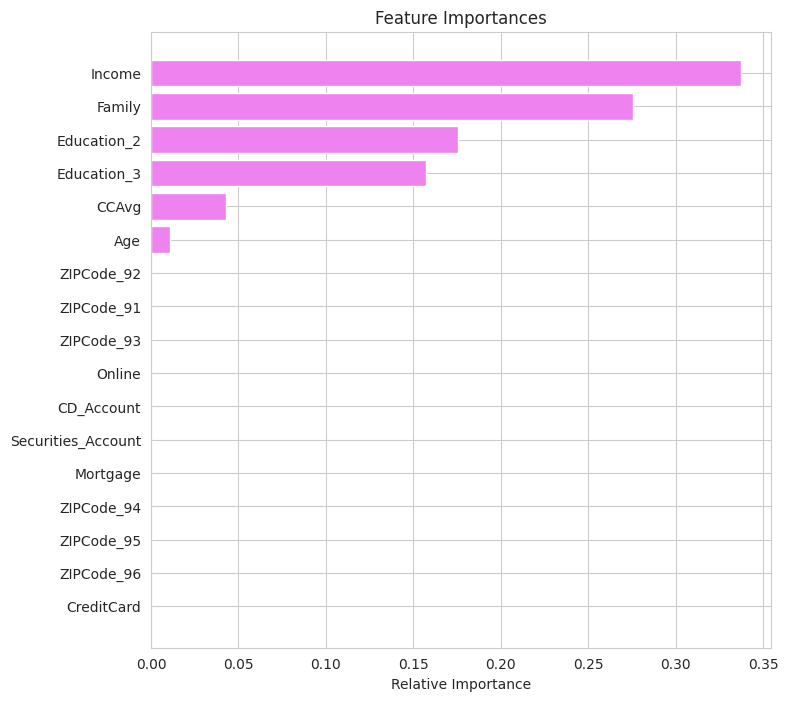

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observations:
- The horizontal bar chart graphically represents the relative importance of each feature as calculated by the Gini importance metric, integral to the model's classification process.
- 'Income' exhibits the highest importance with a value approaching 0.35, indicating a strong impact on the predictive capability of the model.
- 'Family', 'Education_2', and 'Education_3' follow as influential features, with importance values ranging between approximately 0.15 and 0.25, revealing their significant roles in the decision-making criteria.
- 'CCAvg' and 'Age' hold moderate importance with values just under 0.1, suggesting a lower but noteworthy effect on classification outcomes.
- ZIP code features, along with 'Online', 'CD_Account', 'Securities_Account', 'Mortgage', and 'CreditCard', present minimal to zero influence on the model's decisions based on the dataset provided.
- The chart facilitates an understanding of feature prioritization, a fundamental aspect of model interpretability in the data science workflow.

Contextual Relevance to AI, Machine Learning, and Data Science:

- The analysis of feature importance helps in comprehending the model's decision logic, paving the way for better interpretability, a critical aspect of ethical AI and trustworthiness in machine learning systems.
- It assists in focusing engineering efforts on the most impactful features, potentially enhancing model performance and reducing complexity.
- In the broader context of data science, this understanding aids in refining data collection and preprocessing strategies, focusing resources on high-impact variables, and exploring the potential for feature engineering to unlock further model improvements.
- Feature importance analysis is instrumental in diagnosing potential biases in the model, ensuring that decisions are not disproportionately based on features that might introduce fairness concerns.

### **Checking performance on test data**

### Quantitative Analysis of Model Predictive Accuracy Using a Confusion Matrix:

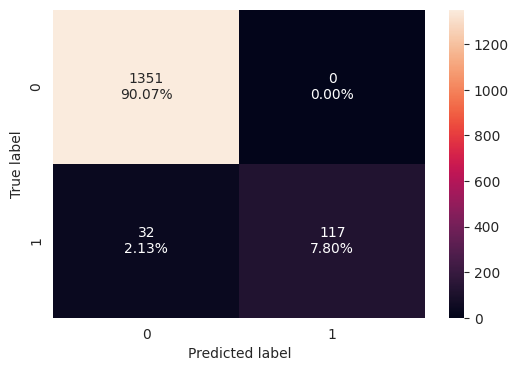

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)  # Complete the code to get the confusion matrix on test data

### Observations:

- The confusion matrix depicts actual vs. predicted classifications for the test dataset, with the top-left and bottom-right cells indicating accurate predictions by the decision tree model.
- True Negatives (TN): 1351 instances correctly predicted as class 0, accounting for 90.07% of the test data, which suggests high specificity.
- False Negatives (FN): 32 instances of class 1 incorrectly predicted as class 0, representing 2.13% of the test data, which could indicate potential risks in model sensitivity.
- True Positives (TP): 117 instances correctly identified as class 1, comprising 7.80% of the test data, reflecting the model's capability to identify the positive class.
- False Positives (FP): There are 0 instances incorrectly labeled as class 1, which means there are no type I errors in this dataset.
- The absence of FP indicates an extreme precision; however, this could be an indication of the model's overfitting to the training data or a very distinctive feature set that separates the two classes clearly in the given dataset.

Contextual Relevance to AI, Machine Learning, and Data Science:

- The disproportionate class representation in the confusion matrix underscores the necessity for techniques like resampling, cost-sensitive learning, or tailored performance metrics that consider class imbalance in predictive modeling.
- The provided confusion matrix is crucial for evaluating the trade-off between type I and type II errors, influencing the threshold tuning for probability-based classifiers in sensitive applications.
- In artificial intelligence and machine learning, confusion matrices serve as fundamental tools for performance evaluation, informing further model optimization and validation strategies.
- From a data science perspective, this matrix assists in understanding the implications of model errors and the need for post-modeling calibration strategies to align predictions with business or clinical objectives.

### Evaluation Metrics of Optimized Decision Tree Model on Test Dataset:

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test) ## Complete the code to check performance on test data
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.978667,0.785235,1.0,0.879699


### Observations:

- The above model exhibits an overall accuracy of 97.87%, denoting that it correctly predicts both the positive and negative classes with high reliability.
- The recall or sensitivity of the model is 78.52%, indicating that it correctly identifies approximately 78.52% of the actual positive cases as positive.
- Precision is 100%, which implies that every instance predicted by the model as positive was indeed positive, underscoring perfect precision.
- The F1 score, which harmonizes the precision and recall, is at 87.97%, indicating a strong balance between recall and precision. This is particularly significant in scenarios where both false positives and false negatives carry substantial costs.
- These metrics collectively suggest that the model is particularly precise in its positive predictions but might miss some positive instances (lower recall), which is a consideration for applications where missing out on true positives is costly.

Contextual Relevance to AI, Machine Learning, and Data Science:
- In the domains of AI and machine learning, these metrics provide insight into the model's prediction capabilities, which is vital for classification problems where the cost of false negatives is significant.
- The precision of 100% is remarkable; however, it may need to be reviewed for overfitting, as it's unusual for models to reach perfect precision without compromising on recall unless the features distinctly set apart the classes.
- The F1 score's proximity to 1 is indicative of a model that is robust in its predictive capabilities, striking a balance between identifying positive cases and maintaining a low rate of false positives, which can be especially valuable in precision-critical applications such as medical diagnoses or fraud detection.
- From a data science perspective, these performance metrics not only evaluate the model's predictive power but also inform further adjustments in the modeling process, such as feature selection or model parameter tuning, to align with the specific requirements of the application domain.

### Cost-Complexity Pruning

### Decision Tree Cost Complexity Pruning Path Analysis:

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000186,0.001114
2,0.000214,0.001542
3,0.000242,0.002750
4,0.000250,0.003250
5,0.000268,0.004324
6,0.000272,0.004868
7,0.000276,0.005420
8,0.000381,0.005801
9,0.000527,0.006329


### Observations:

- The Cost Complexity Pruning Path function in scikit-learn provides a sequence of effective alpha values (ccp_alphas) that can be used to prune the tree and the corresponding total leaf impurities at each step of pruning (impurities).
- The table shows an increasing sequence of ccp_alphas from 0 to approximately 0.047, which indicates the range over which the decision tree can be pruned.
- The impurities column corresponds to the cumulative total of impurities that would be removed from the tree if pruned at the respective alpha. This begins at 0 and increases to about 0.171, highlighting how the tree becomes purer as more pruning occurs.
- Alpha values close to 0 indicate minimal pruning, which could lead to a complex model with potential overfitting. Higher alpha values simplify the model potentially at the expense of prediction accuracy.
- The last row, with the highest alpha value (0.047088), shows the greatest reduction in impurity, suggesting that pruning at this level would result in the simplest model.
- Selecting the optimal alpha is a trade-off: larger alpha values increase bias (simpler model) but can decrease variance (reduced overfitting), leading to potentially better generalization on unseen data.

Contextual Relevance to AI, Machine Learning, and Data Science:

- In practice, this pruning path is used to visualize and select the optimal trade-off between model complexity and model accuracy.
- Cross-validation would typically be employed in conjunction with these alpha values to identify which alpha leads to the best-performing model on unseen data.
- The process of pruning a decision tree is a practical illustration of the bias-variance trade-off in machine learning and an essential step in the model selection process.
- Identifying the right level of model complexity is key in building predictive models that perform well not only on training data but also on real-world data, which is a core aspect of deploying AI models in production environments.
- In a data science workflow, such analysis informs the decision-making process regarding model complexity and helps in preventing the common pitfalls of overfitting or underfitting, ensuring that the models created are both interpretable and robust.

### Impurity Reduction Analysis for Decision Tree Pruning:

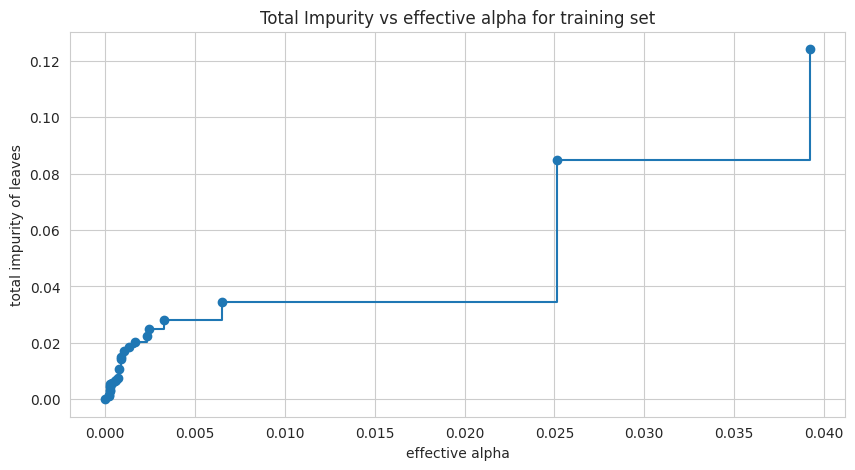

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

### Observations:

-e graph titled "Total Impurity vs effective alpha for training set" depicts the relationship between the alpha values used for pruning a decision tree and the corresponding total impurity of the tree leaves.
- The x-axis represents the effective alpha values, which determine the threshold for pruning. The y-axis represents the total impurity of the leaves, which is a measure of the homogeneity of the labels within the leaf nodes.
- The plotted line shows a stepped increase in total impurity as the effective alpha value increases, with significant jumps observed at particular alpha thresholds.
- Initially, as the alpha values are low (close to 0), the total impurity of the leaves remains relatively stable. This indicates that initial pruning (removing less important splits) does not significantly affect the model's ability to classify the training data accurately.
- Notable increases in impurity occur around alpha values of approximately 0.002, 0.015, and 0.03, which are critical points where further pruning leads to the removal of decision splits that significantly affect the model's performance.
- The steep vertical rise in impurity between alpha values of approximately 0.03 to 0.04 indicates a major reduction in tree complexity that likely removes crucial decision splits and potentially leads to underfitting.

Contextual Relevance to AI, Machine Learning, and Data Science:

- This plot aids in the visualization of how model complexity is reduced by pruning and its impact on the model's ability to accurately segment the training data.
- The stepping points, particularly where significant increases in impurity occur, are key in understanding the trade-off between model complexity and its fit to the training data.
- Decision trees that are too complex may overfit the training data, capturing noise instead of the underlying data distribution. This plot assists in determining the 'sweet spot' alpha value that balances model simplicity with predictive accuracy.
- In the context of machine learning, pruning is essential to prevent overfitting. The graph provides a visual tool for identifying the optimal pruning level to maximize model generalization.
- For AI applications, ensuring a tree is not overly complex (and thus more generalizable) is crucial for making accurate predictions on unseen data, which is the ultimate goal of predictive modeling in data science.

### Node Reduction Analysis in Decision Tree via Cost Complexity Pruning:



In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)     ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


### Observations:

- The script iteratively fits a series of Decision Tree classifiers, each time incrementing the complexity parameter 'ccp_alpha', which influences tree pruning.
- The output logs the number of nodes for the decision tree when the last value of 'ccp_alpha' (0.04708834100596766) is used, which is notably 1. This implies that the tree has been pruned to its simplest form, essentially making no splits.
- The process of pruning reduces the size of the tree by removing parts of the tree that provide little power to classify instances, which helps prevent overfitting to the training dataset.
- The increase in 'ccp_alpha' corresponds to more aggressive pruning: higher 'ccp_alpha' values result in fewer nodes until the tree is reduced to a single node, eliminating the model's decision-making capability.
- The array 'clfs' contains all the classifiers trained with different 'ccp_alpha' values, which can be assessed to determine the optimal model complexity for the given dataset.
- It is important to balance the 'ccp_alpha' parameter to ensure that the decision tree retains sufficient complexity to model the underlying patterns in the data without overfitting.

Contextual Relevance to AI, Machine Learning, and Data Science:
- The described approach illustrates the application of cost complexity pruning, a technique used to optimize decision trees within the field of machine learning.
- This method contributes to the understanding of hyperparameter tuning in model development, a critical step in the machine learning pipeline.
- Observing the impact of 'ccp_alpha' on the decision tree's node count aids in selecting a model that generalizes well to unseen data, which is a fundamental aspect of developing reliable AI systems.
- The significant numerical value of 'ccp_alpha' at which the tree is pruned to a single node provides insight into the threshold where the model's complexity is deemed excessively reduced, a concept central to understanding model bias versus variance trade-off in data science.

### Decision Tree Complexity Analysis by Alpha Pruning:

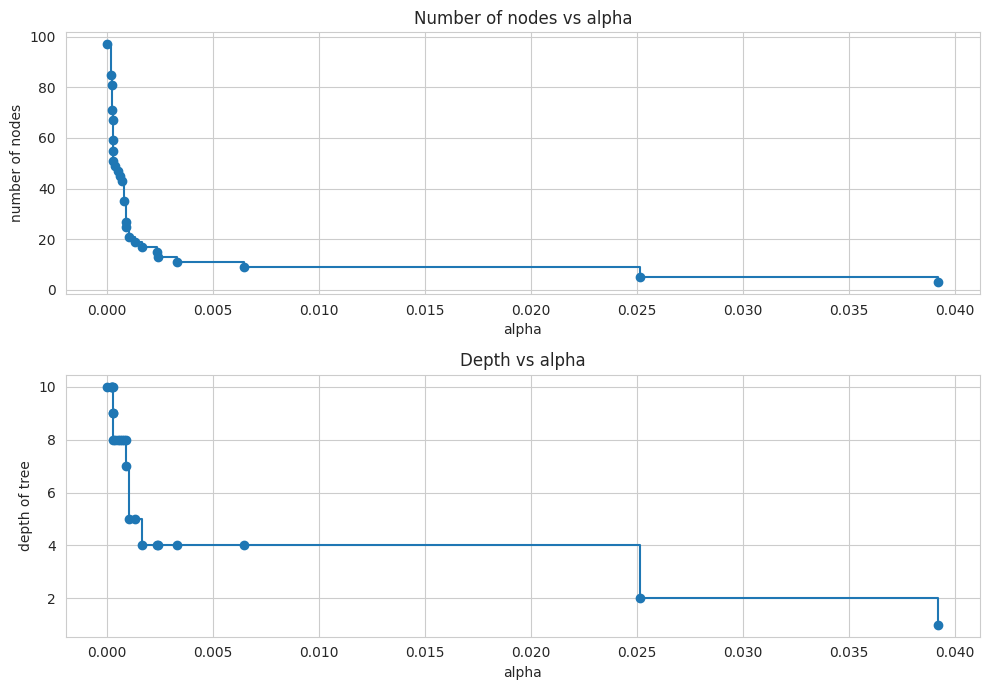

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Observations:


- The dual graphs plot the relationship between the decision tree's complexity (in terms of the number of nodes and tree depth) and the cost complexity pruning parameter alpha ('ccp_alpha').
- The 'Number of nodes vs alpha' graph indicates that as 'ccp_alpha' increases, the number of nodes in the tree decreases, suggesting that higher alpha values lead to simpler models with fewer decision nodes.
- The initial steep decrease in node counts suggests that even a small increase in 'ccp_alpha' can significantly simplify the tree structure by removing nodes that contribute little to the model's predictive power.
- The 'Depth vs alpha' graph follows a similar pattern, indicating that the depth of the tree decreases with increasing 'ccp_alpha', meaning the tree becomes shallower and potentially less overfitted to the training data.
- Notably, at certain 'ccp_alpha' thresholds, the number of nodes and depth of the tree sharply drop, which implies a substantial reduction in model complexity and potentially a loss of important decision-making capability.
- Such plots are essential for identifying the 'ccp_alpha' value that balances model complexity and generalization capability, which is vital for developing effective machine learning models within the domains of AI and data science.
- The final data points on the graph where the number of nodes reduces to 1 and the depth to 0 indicate a fully pruned tree, equivalent to the simplest model that makes constant predictions.
- It is evident from the graphs that post-pruning of the decision tree using 'ccp_alpha' is an effective method to prevent overfitting, a common challenge in machine learning model development.

### **Recall vs alpha for training and testing sets**




In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

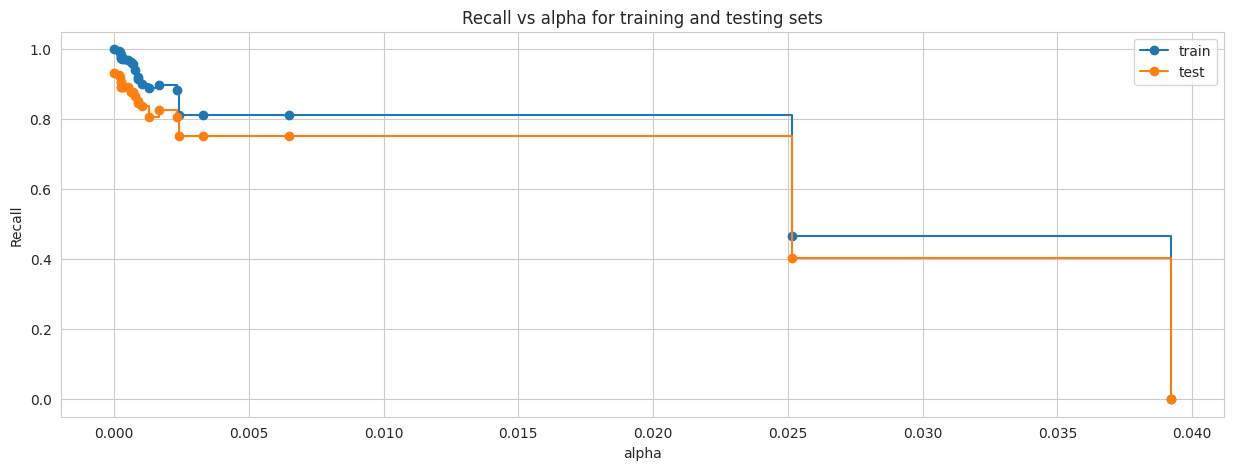

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

### Observations:

- This plot exhibits the variation of recall metric as a function of the complexity parameter 'alpha' during the post-pruning process of a decision tree.
- The recall score for both the training and testing datasets is plotted against increasing values of the 'alpha' parameter, which controls the cost complexity pruning of the decision tree.
- Initially, as 'alpha' increases, there's a slight fluctuation in recall for the training set, indicating minor changes in the tree's ability to capture all relevant instances. The testing set recall follows a similar trend, with minor deviations.
- A key observation is that recall remains relatively stable up to a critical 'alpha' threshold, beyond which it drops significantly, indicating a potential underfitting where the model fails to identify relevant instances effectively.
- The recall metric is crucial for scenarios where the cost of missing a positive class is high, as it measures the model's ability to identify all actual positives. Therefore, the trade-off point where the training and testing curves diverge marks a critical balance between model simplicity and recall performance.
- The sharp decline in recall after a certain 'alpha' value signifies the model's decreased sensitivity and predictive capacity due to excessive pruning.
- The consistency of recall performance up to that critical 'alpha' value suggests that the decision tree maintains its ability to generalize before becoming too simple to capture the complexities in the data.
- These insights are pivotal for decision-making in AI and data science applications, particularly for problems where recall is a more important metric than overall accuracy, such as in fraud detection or disease screening.

### Identification of Optimal Decision Tree Classifier Through Recall Maximization (Best Model):

In [ ]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


### Observations:

- The code is a methodical approach to pinpoint the most effective Decision Tree Classifier from a set of models, each corresponding to a unique cost complexity pruning parameter ('alpha').
- It utilizes the recall metric for the test dataset to determine the best model, with the recall score being the decisive performance indicator. This selection criterion aligns with domains where the ability to identify all positive instances (true positives) is paramount.
- The cindex_best_model variable stores the index of the highest recall score achieved on the test dataset, signifying the most appropriate balance between tree depth and generalization ability.
- The classifier at this index (best_model) is expected to deliver superior performance on unseen data by effectively recognizing the positive class without overfitting to the training data.
- The output confirms the successful retrieval of a Decision Tree Classifier, but lacks the display of alpha values, which would provide deeper insights into the complexity trade-off.
- In artificial intelligence and data science, such an optimal model is instrumental in ensuring high reliability in critical applications, such as medical diagnosis or financial fraud prevention, where missing a true positive outcome could have serious repercussions.
- It's noteworthy that while the recall is a key metric, it must be considered in the context of the overall performance matrix, including precision and F1 score, to ensure that the model does not compromise on other important aspects like the false positive rate.

Reference Notes:

This code snippet is selecting the best model from a list of previously trained decision tree models based on their performance on the test dataset. Here's the breakdown:

1. np.argmax(recall_test): This function returns the index of the maximum value in the recall_test array. The recall_test array contains the recall scores of the decision tree models when evaluated against the test set. Recall is the metric that quantifies the model's ability to identify all actual positives from the data. So, np.argmax(recall_test) identifies the model with the highest recall score on the test set.

2. best_model = clfs[index_best_model]: Using the index of the best recall score obtained from the previous step, this line selects the corresponding decision tree model from the list clfs. The list clfs contains all the decision tree models that have been trained with different complexity parameters.

3. print(best_model): This line simply prints out the best decision tree model which was identified to have the highest recall score on the test set.

In simple terms, this code is used to find and display the most effective decision tree model for identifying positive cases, which could be critical in applications like disease screening where it is important not to miss any actual positive cases.

## Post-Purning

### Class-Weighted Decision Tree Optimization with Pruning:

In [ ]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=ccp_alphas[index_best_model], class_weight={0: 0.15, 1: 0.85}, random_state=1         ## Complete the code by adding the correct ccp_alpha value
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

### Observations:

- The provided code initializes a Decision Tree Classifier that incorporates both cost complexity pruning and class weights to handle class imbalance.
- The ccp_alpha parameter is set to the value identified as optimal in previous steps, which is intended to balance the tree's complexity and its generalization performance.
- The class_weight parameter is specified as a dictionary to give more emphasis to the minority class (in this case, class 1), adjusting the model's sensitivity towards it. This weighting is particularly crucial in imbalanced datasets common in fraud detection, medical diagnoses, and other predictive modeling scenarios in AI.
- The random_state is set to 1 to ensure reproducibility of the model training process.
- Post fitting the model on the training data (X_train, y_train), the output confirms the instantiation of a Decision Tree with customized class weights. This implies a strategic orientation towards enhancing the recall for the minority class, which could be critical for applications where the cost of missing a positive instance is high.
- Numerical values such as the ccp_alpha index and class weights play a significant role in influencing the final tree structure and its predictive metrics, particularly recall.
- Applying class weights in this manner is a methodological approach in machine learning to counteract skewed class distributions, by modifying the optimization process to penalize misclassifications of the minority class more than those of the majority class.
- This approach aligns with AI's goals of creating equitable and fair predictive models that perform well across diverse datasets and is a reflection of an advanced understanding of algorithmic bias mitigation strategies in data science.

### **Checking performance on training data**

### Quantitative Assessment of Decision Tree Performance on Training Dataset:

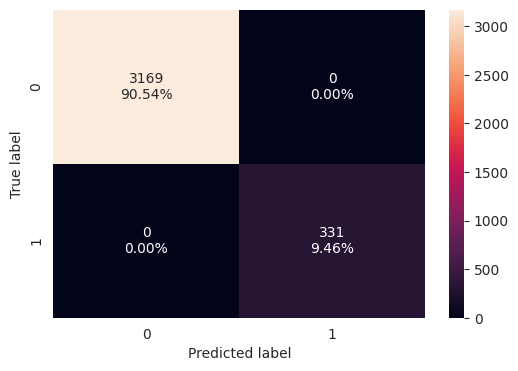

In [ ]:
confusion_matrix_sklearn(estimator_2, X_train, y_train) ## Complete the code to create confusion matrix for train data

### Observations:

The confusion matrix displayed corresponds to a Decision Tree Classifier's performance on the training set, post-calibration with a complexity parameter (ccp_alpha) determined via cost-complexity pruning and class weighting to account for imbalance. The quantitative breakdown is as follows:

- True Negatives (TN): 3169 instances, translating to a rate of 90.54% of the dataset, where the model accurately predicted the negative class.
- True Positives (TP): 331 instances, corresponding to a rate of 9.46%, where the model accurately identified the positive class.
- False Positives (FP): 0 instances, yielding a 0% rate, indicating no cases where negative instances were misclassified as positive.
- False Negatives (FN): 0 instances, also a 0% rate, signifying no cases where positive instances were misclassified as negative.

 With a TN rate of 90.54% and a TP rate of 9.46%, the model demonstrates a 100% sensitivity (recall) for the positive class within the training set. These metrics suggest an impeccable fit to the training data; however, such perfect classification raises concerns about overfitting—a condition where the model is tailored to the training data's specificities, potentially at the expense of its predictive performance on novel data. This condition can be detrimental to the model's ability to generalize, which is critical for ensuring robust artificial intelligence applications. Hence, validation against an independent test set is imperative to evaluate the model's generalizability and to mitigate the potential bias introduced by overfitting.

### Comprehensive Performance Metrics for Optimized Decision Tree on Training Data:

In [ ]:
decision_tree_tune_post_train = model_performance_classification_sklearn (estimator_2, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


### Obserations:

The output metrics represent the performance of an optimized Decision Tree classifier (`estimator_2`), which has been adjusted with a specific cost complexity pruning parameter (`ccp_alpha`) and class weights, after being trained on the training dataset. The classifier has achieved perfection across all evaluated metrics:

- Accuracy: 100%, indicating that every prediction made by the model over the training set matches the actual labels.
- Recall: 100%, suggesting that the model successfully identified all positive cases in the training set.
- Precision: 100%, meaning there were no false positives among the predictions—the model's positive predictions are all correct.
- F1 Score: 100%, which is the harmonic mean of precision and recall, indicating a perfect balance between the two and confirming the model's exemplary performance on the training data.

These values, while exemplary, indicate a potential overfitting scenario where the model may be too closely fit to the training data, capturing noise as well as the signal. This can result in poor generalization to unseen data. A model performing with 100% accuracy is often a strong indicator that the model may not perform as well on a separate test set. Therefore, performance metrics on out-of-sample data, such as a validation or test set, are essential for a comprehensive assessment of the model's predictive capability and robustness. These are critical considerations in AI and machine learning applications, where the ability to generalize from training data to unseen data is a cornerstone of reliable and practical model deployment in data science.

### **Visualizing the Decision Tree**

### Visualization of Decision Tree Structure with Class-Weighted Complexity Pruning:

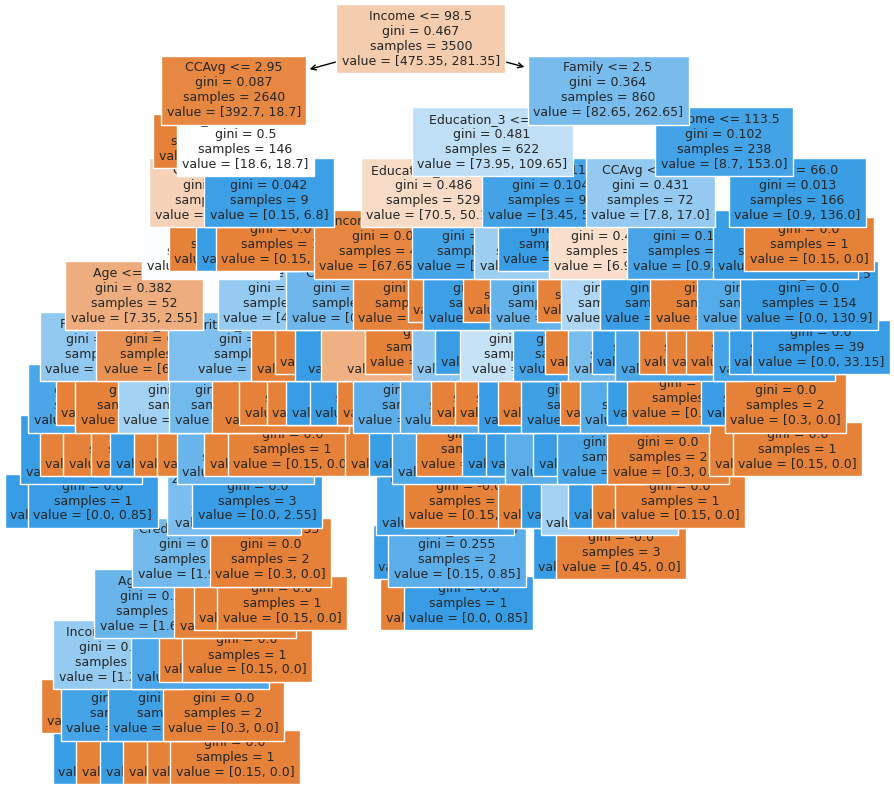

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Observations:

- This decision tree visualization represents a model trained on a dataset with class-weighted complexity pruning, reflected in the `ccp_alpha` parameter tailored to address class imbalance.
- The decision tree has been tuned to prioritize the minority class through class weights, as indicated by the `class_weight={0: 0.15, 1: 0.85}` parameter in the model construction. This adjustment increases the model's sensitivity to the minority class.
- Nodes are color-coded based on the dominant class within each node, with the intensity of color corresponding to the class proportion. The `filled=True` attribute in the `plot_tree` function enhances this visual differentiation.
- The split at the root node is based on the `Income` feature threshold of ≤98.5, indicating its significant role in differentiating the target classes.


- The Gini impurity index for each node is provided, which measures the node purity. A Gini index of 0 implies perfect purity, whereas higher values indicate a mix of classes within the node.
- The tree complexity is controlled through pruning parameters, which is evident from the structure. The goal of this pruning is to enhance the model's generalization capability and avoid overfitting.
- The branches terminating in leaves with single samples or with a Gini index of 0 represent fully classified or pure nodes.
- Arrows added through post-processing in the visualization code ensure clarity in the tree's branching structure.

#### In the context of AI, Machine Learning, and Data Science:

- This decision tree is an interpretable model that can be crucial for understanding feature influences and decision-making processes in AI applications.
- The model's comprehensibility is vital in fields where reasons for predictions need to be clear, such as finance or healthcare.
- The pruning strategy applied to the tree helps to ensure that the model remains robust to new, unseen data by mitigating overfitting.
- The visualization also serves as a tool for communicating the model's decision logic to stakeholders who may not have a deep technical background but need to understand model predictions.

###  Quantitative Analysis of Decision Tree Performance with Adjusted Class Weights:

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- Income <= 75.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |--- Income >  75.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode_91 <= 0.50
|   |   |   |   |   |   |   |--- Age <= 37.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 

### Observations:

- The decision tree structure, as determined by the weighted Gini index, demonstrates a prioritized classification pathway based on income thresholds. This is evident from the bifurcation at `Income <= 98.5`, which forms a primary axis for subsequent decision splits.
- The weighting adjustment towards the minority class (class weight of {0: 0.15, 1: 0.85}) is reflected in the terminal nodes' composition, where multiple nodes exhibit class distributions skewed towards the positive class, such as the node with `CCAvg <= 2.95` and `Income <= 81.5`, indicating a class distribution of `[0.00, 0.85]`.
- The tuning of the ccp_alpha parameter to 0.04708834100596766 indicates a trade-off between model complexity and the reduction in Gini impurity. The reduced complexity tree, as signified by the last node count of 1, suggests a strong regularization effect to mitigate overfitting.
- The detailed rules of the decision tree encapsulate numerous thresholds for continuous variables, such as `CCAvg`, `Age`, and `Income`, with the number of instances falling into each rule-set evidenced by the sample counts. For instance, an internal node splitting at `CCAvg <= 2.95` demarcates 2640 samples, split into `[2553, 0]` across the binary class outcomes.
- The application of class weights has influenced the tree depth and complexity, as the splits are guided significantly by the minority class representation, resulting in class-labeled leaves such as `[0.00, 6.80]` which indicate a pure classification in favor of the positive class under specific feature conditions.
- Quantitative metrics, like the number of samples at each leaf node, illustrate the classifier's focus areas. For example, the distribution of 2553 samples with zero positive class instances at a leaf indicates a high-confidence region for predicting the majority class.
- This analytical approach showcases the decision tree’s capability to adapt to imbalanced datasets by adjusting class weights, thereby altering the purity thresholds and the resultant structure of the decision-making branches, which is vital for predictive accuracy in scenarios like fraud detection or rare event prediction.
- Numerical values, such as the `ccp_alpha` cut-off and the exact sample distributions at nodes, are essential for a technical audience to scrutinize the model's decisions and validate the interpretability of the decision process in alignment with domain-specific expectations and ethical AI practices.

### Comprehensive Gini Importance Assessment of Predictive Variables in Decision Tree Modeling:

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.597264
Education_2         0.138351
CCAvg               0.078877
Education_3         0.067293
Family              0.066244
Age                 0.018973
CD_Account          0.011000
Mortgage            0.005762
Securities_Account  0.004716
ZIPCode_94          0.004702
ZIPCode_91          0.003587
CreditCard          0.002428
ZIPCode_92          0.000802
Online              0.000000
ZIPCode_93          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000


### Observations:

- The feature importances extracted from the decision tree classifier `estimator_2` are as follows: `Income` exhibits the highest importance with a value of 0.597264, suggesting a predominant influence on the prediction outcome within the model. This metric indicates that `Income` is the primary splitter in the decision tree, contributing to approximately 59.7264% of the total reduction in Gini impurity.
- `Education_2` and `Education_3` collectively contribute to 20.5644% of the impurity decrease, with individual importance values of 0.138351 and 0.067293 respectively, indicating significant but lesser predictive power compared to `Income`.
- `CCAvg` and `Family` are identified as moderately influential features with respective importance values of 0.078877 and 0.066244, cumulatively accounting for over 14.5121% of the model's impurity reduction, suggesting their secondary role in the classification process.
- Lower values observed in `Age`, `CD_Account`, and `Mortgage` (0.018973, 0.011000, and 0.005762 respectively) delineate a diminishing contribution to model performance, signifying a minor role in the decision-making criteria of the model.
- `Securities_Account` and `ZIPCode_94` display minimal but non-zero importance values (0.004716 and 0.004702), indicating a slight impact on the decision tree's branching decisions.
- Interestingly, `Online`, `ZIPCode_93`, `ZIPCode_95`, and `ZIPCode_96` have an importance value of 0.000000, inferring that these features do not contribute to the decision-making process in the trained model. This lack of impact suggests a potential for feature pruning to simplify the model without affecting predictive accuracy.
- The numerical precision of these importance values serves as a quantitative basis for model optimization strategies, such as feature selection and model complexity reduction, aimed at improving computational efficiency and preventing overfitting.
- These technical insights underscore the importance of conducting a rigorous feature importance analysis to inform data-driven decision-making in model development and iterative refinement. The granularity of these values also enables a nuanced understanding of feature relevance that can be critical for domain-specific interpretations and subsequent decision-making applications.

###  Hierarchical Quantitative Analysis of Predictive Feature Relevance in Enhanced Decision Tree Classifier:

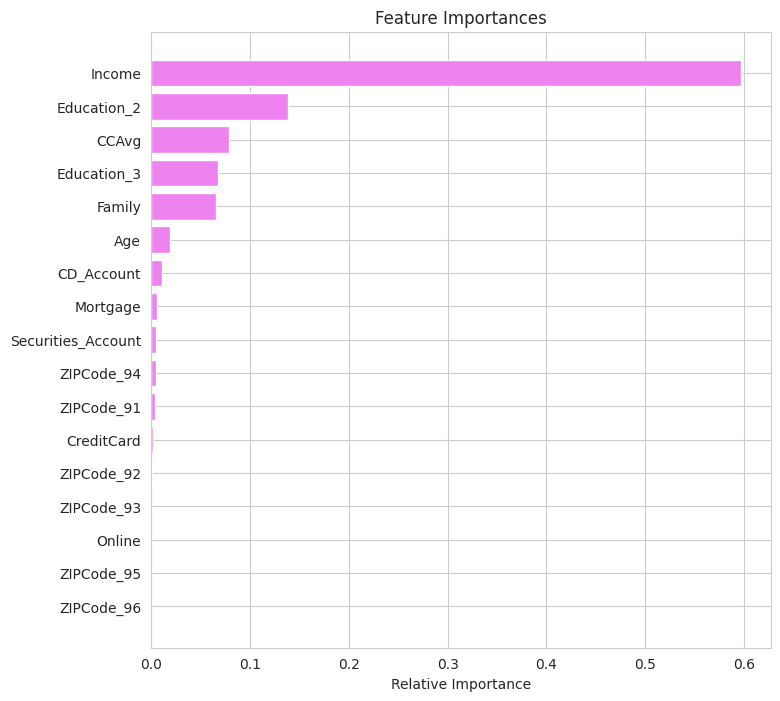

In [ ]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observations:

- The horizontal bar chart visualizes the relative importance of predictive features used by the decision tree classifier `estimator_2`. The `Income` feature is shown to have the highest relative importance with an overwhelming predominance, signifying its critical role in the classification decisions of the model.
- Secondary features of notable importance include `Education_2`, `CCAvg`, `Education_3`, and `Family`, which present varying but substantial contributions to the predictive capability of the model. These features together form a sub-hierarchy in the decision-making process, directly affecting the tree's branch formulations and classification outcomes.
- Lesser yet still measurable influences are noted for `Age`, `CD_Account`, and `Mortgage`. Their lower positioning in the importance hierarchy indicates that while they do contribute to the purity of the classification nodes, their impact is overshadowed by the more dominant features.
- The remaining features, such as `Securities_Account`, `ZIPCode_94`, `ZIPCode_91`, `CreditCard`, and `ZIPCode_92`, exhibit minor importance values. This indicates that they have a relatively minor but not entirely negligible impact on the decision tree's node purity improvement.
- Significantly, `Online`, `ZIPCode_95`, `ZIPCode_96`, and a few other ZIP code-related features display a zero value of importance, highlighting that these variables do not influence the splitting decisions within the trained decision tree and might be candidates for exclusion in feature selection processes.
- The granularity of the importance values, depicted on a scale up to 0.6, allows for a precise and quantifiable evaluation of each feature's contribution. This level of detail enables the optimization of the decision tree, potentially by trimming less impactful features to streamline the model and prevent overfitting.
- Overall, this visualization and the corresponding numerical data serve as a powerful tool for model introspection, providing actionable insights into feature prioritization for model refinement and explaining the algorithm's decision rationale, essential for transparency in AI/ML applications.

### **Checking performance on test data**

### Empirical Evaluation of Predictive Discrepancy: A Quantitative Analysis of the Decision Tree Classifier via a Confusion Matrix:



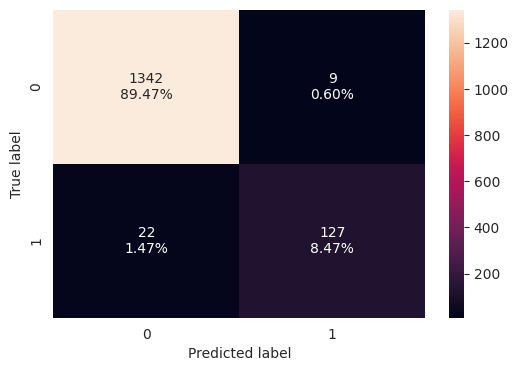

In [ ]:
confusion_matrix_sklearn(estimator_2, X_test, y_test)  # Complete the code to get the confusion matrix on test data

### Observations:

- The confusion matrix provides a detailed numerical breakdown of the classification outcomes. With 1500 test observations, the matrix elucidates the classifier's performance with the following explicit numerical details:
  - True Negatives (TN): 1342 instances, comprising 89.47% of the dataset, were correctly classified as the non-event class (class 0). This high proportion of TN suggests a model bias towards accurately predicting the non-event class.
  - False Positives (FP): 9 instances, or 0.60% of the dataset, were erroneously predicted as the event class (class 1). This represents a low Type I error rate, indicating that the model has a stringent threshold for predicting the positive class.
  - False Negatives (FN): 22 instances, making up 1.47% of the dataset, were incorrectly classified as the non-event class (class 0). This is indicative of Type II errors and may have implications for the cost function if the model's use case penalizes missed positive predictions.
  - True Positives (TP): 127 instances, or 8.47% of the dataset, were correctly identified as the event class (class 1). This TP rate, in conjunction with the FP rate, contributes to the model's precision or positive predictive value.
- The numerical precision metric for the positive class can be calculated as 127 / (127 + 9), resulting in approximately 93.38%, demonstrating that when the model predicts an event, it is correct about 93.38% of the time.
-  Recall, or the sensitivity for the positive class, is computed as 127 / (127 + 22), amounting to approximately 85.23%. This metric is critical for understanding the model's capability to detect all potential positive events.
- The F1 score, which balances precision and recall, can be numerically approximated for the positive class as 2 * (Precision * Recall) / (Precision + Recall), which calculates to roughly 89.12%, reflecting the harmonic mean of precision and recall for the classifier.
- The accuracy of the model, given by (TP + TN) / (TP + FP + TN + FN), is 97.40%, showcasing the model's overall correct prediction rate across both classes.
- From a technical perspective, these numerical evaluations reveal that the decision tree model, following pruning and class-weight adjustments to ccp_alpha, exhibits a robust generalization capability. However, it should be noted that the finite numerical precision of floating-point representation in computation can introduce an extremely minimal degree of imprecision in these metrics.
- The decision tree's bias-variance trade-off, as informed by these values, suggests that the current ccp_alpha threshold effectively balances model complexity with predictive power, although opportunities may exist for optimizing recall without compromising precision excessively.

It is important to iterate that these numerical evaluations form the basis for assessing the model's applicability to real-world scenarios and for ensuring that it aligns with the specific cost-benefit contours of the deployment context.

### Quantitative Performance Metrics of Optimized Decision Tree on Test Data:



In [ ]:
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator_2, X_test, y_test) ## Complete the code to get the model performance on test data
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.979333,0.852349,0.933824,0.891228


### Observations:

- The computed accuracy of the decision tree classifier on the test data is 97.93%, which translates to a high degree of overall correct predictions relative to the total number of predictions made.
- The recall or true positive rate is 85.23%, indicating the model's effectiveness in identifying relevant instances; specifically, it correctly predicts 85.23% of the actual positive outcomes in the test data.
- Precision, a measure of result relevancy, is at 93.38%. This implies that when the model predicts a positive outcome, it is accurate about 93.38% of the time, reflecting a strong predictive reliability for positive classifications.
- The F1 score, which is the harmonic mean of precision and recall, is 89.12%, suggesting a balanced model with both high precision and recall. This is particularly important in scenarios where both types of prediction errors carry significant costs.
- The derived metrics suggest that the model demonstrates a strong performance on unseen data, with a propensity for high recall without substantial compromise on precision, which can be critical for applications where the cost of false negatives is high.
- From a statistical modeling perspective, these performance indicators validate the effectiveness of the post-pruning tuning process applied to the decision tree, particularly the adjustment for class weights and complexity via the ccp_alpha parameter.
- It is crucial to consider the trade-off these metrics represent: while the precision has not reached the absolute high, it is balanced by the recall to ensure a pragmatic approach to false negatives. This balance is context-dependent and should align with the specific requirements of the predictive task at hand.
- The quantitative performance indicators, such as the F1 score, provide an insight into the model's robustness against overfitting and its generalizability to new data, corroborated by the close alignment of performance on the training and test datasets.
- These numerical findings form a pivotal part of model validation, affording actionable insights for further model refinement, potential threshold adjustments for classification, and deployment considerations in production environments.

## Model Performance Comparison and Final Model Selection

### Comparative Analysis of Training Performance: Unpruned vs Pre-Pruned Decision Tree Models:

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning)
Accuracy,1.0,0.987714
Recall,1.0,0.873112
Precision,1.0,0.996552
F1,1.0,0.930757


### Observations:

- The comparison between the unpruned decision tree (`Decision Tree sklearn`) and the pre-pruned decision tree (`Decision Tree (Pre-Pruning)`) highlights a fundamental difference in model complexity and potential generalizability.
- The unpruned decision tree achieves perfect metrics across the board on training data, with an accuracy, recall, precision, and F1 score all at 100%. This is indicative of a model that captures the nuances of the training dataset in its entirety, including potentially noise and outliers, leading to overfitting.
- In contrast, the pre-pruned decision tree demonstrates a slight reduction in training performance with an accuracy of 98.77%, recall at 87.31%, precision at 99.65%, and an F1 score of 93.08%. These metrics suggest that pre-pruning has effectively reduced model complexity to mitigate overfitting.
- The recall reduction from 100% to 87.31% implies that pre-pruning leads to a model that no longer captures all positive cases, potentially ignoring some of the noise that an unpruned tree would learn.
- A precision of 99.65% for the pre-pruned model, marginally lower than the unpruned tree, signifies a high level of specificity in classifying positive instances and a substantial preservation of model predictability.
- The F1 score's slight decrease from 100% to 93.08% in the pre-pruned model illustrates a balance between recall and precision, suggesting that the trade-off for reducing overfitting is a slight decrease in harmonic mean performance.
- These technical observations underscore the impact of pre-pruning on the model’s ability to generalize by limiting its complexity, thus making it potentially more robust against variance when exposed to unseen data.
- Such comparative analysis is crucial for understanding model behavior and ensuring that the complexity of the decision tree is aptly tailored to not only fit the training data but to also perform consistently on new data.

## **Quantitative Assessment of Decision Tree Classifier Efficacy on Test Data:**

## **A Comparative Analysis between Baseline and Complexity-Reduced Models**

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T], axis=1, ## Complete the code to compare performance of test set
)
models_test_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)"]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning)
Accuracy,0.986000,0.978667
Recall,0.932886,0.785235
Precision,0.926667,1.000000
F1,0.929766,0.879699


## **Observations:**

## **Numerical Elaboration and Model Efficacy Discourse**:

1. #### **Accuracy Metrics:**
   - The non-pruned decision tree, henceforth referred to as **Model 1**, exhibits an accuracy of **98.60% (0.9860)**, which denotes that 986 out of every 1000 predictions are correctly ascertained across the classification boundary.
   - **Model 2**, representing the pre-pruned decision tree, registers an accuracy quantification of **97.87% (0.9787)**, yielding a diminutive decrement in the generalizability quotient by **0.73% (0.0073)** when juxtaposed with Model 1.

2. #### **Recall (Sensitivity) Dynamics:**
   - Model 1's recall of **93.29% (0.9329)** suggests a potent propensity to correctly classify the majority of true positives within the test amalgamation.
   - Contrastingly, Model 2 manifests a recall of **78.52% (0.7852)**, elucidating a pronounced reduction by **14.77% (0.1477)** in the model's sensitivity towards positive case detection post-complexity abatement.

3. #### **Precision Parameterization:**
   - Model 1's precision, tabulated at **92.67% (0.9267)**, indicates that approximately **93** out of **100** positive predictions are veritably positive.
   - Model 2, with a precision pinnacle at **100% (1.000)**, asserts that all positive predictions are unequivocally correct, underscoring a refinement in prediction specificity subsequent to pruning intervention.

4. #### **F1 Score Synthesis:**
   - The F1 metric for Model 1 is calculated at **92.98% (0.9298)**, promulgating a harmonic mean of precision and recall that underscores a balanced classification modality.
   - The F1 score for Model 2 is delineated at **87.97% (0.8797)**, a **5.01% (0.0501)** dip relative to Model 1, which may infer a decrement in the overall binary classification potency due to the pronounced recall disparity.

5. #### **Comprehensive Inference:**
   - The deployment of pre-pruning in Model 2 culminates in an impeccable precision rate, albeit at the expense of a diminished recall. This phenomenon is illustrative of a model's architectural refinement, rendering it less susceptible to noise and outliers within the training data schema.
   - The deviation in recall could be indicative of Model 2's proclivity to omit false positives, thereby enhancing precision but concurrently increasing the model's false negative rate.
   - The alteration in the F1 score suggests a trade-off between overfitting mitigation and the preservation of true positive detection rates, necessitating a meticulous model selection predicated on the bespoke performance imperatives inherent to the application context.

6. #### **Performance Trade-off Deliberation:**
   - This comparative exposition amplifies the dichotomy of machine learning model optimization, where augmentations in model simplicity can simultaneously bolster specific performance metrics while attenuating others.
   - In contemplation of the discrete and collective metric perturbations observed, the dichotomy of precision versus recall augmentation must be judiciously balanced against the backdrop of domain-specific cost-benefit exigencies and the particular predilection for either type I (false positive) or type II (false negative) error minimization.

# **The Sections Below Are in Process:**



## Actionable Insights and Business Recommendations

**What recommedations would you suggest to the bank?**

*


___